# **_Nasa Project_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

# _Understanding the dataset_

In [2]:

data=pd.read_csv('./nearest-earth-objects(1910-2024).csv')
data.head()

neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         False  
3         False  
4         False

In [3]:
data.tail()

neo_id        name  absolute_magnitude  estimated_diameter_min  \
338194  54403809  (2023 VS4)              28.580                0.005112   
338195  54415298  (2023 XW5)              28.690                0.004859   
338196  54454871  (2024 KJ7)              21.919                0.109839   
338197  54456245   (2024 NE)              23.887                0.044377   
338198  54460573  (2024 NH3)              22.951                0.068290   

        estimated_diameter_max orbiting_body  relative_velocity  \
338194                0.011430         Earth       56646.985988   
338195                0.010865         Earth       21130.768947   
338196                0.245607         Earth       11832.041031   
338197                0.099229         Earth       56198.382733   
338198                0.152700         Earth       42060.357830   

        miss_distance  is_hazardous  
338194   6.406548e+07         False  
338195   2.948883e+07         False  
338196   5.346078e+07         False  
338197   5.184742e+06         False  
338198   7.126682e+06         False

In [4]:
data.shape

(338199, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [6]:
data.describe()

neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.352878       51060.662908   4.153535e+07  
std                  0.701869       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  
50%                  0.163697       47560.465474   4.332674e+07  
75%                  0.422708       66673.820614   5.933961e+07  
max                 83.953727      291781.106613   7.479865e+07

In [7]:
col=data.columns
col

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [8]:
data.nunique()

neo_id                     33514
name                       33514
absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
orbiting_body                  1
relative_velocity         338189
miss_distance             337826
is_hazardous                   2
dtype: int64

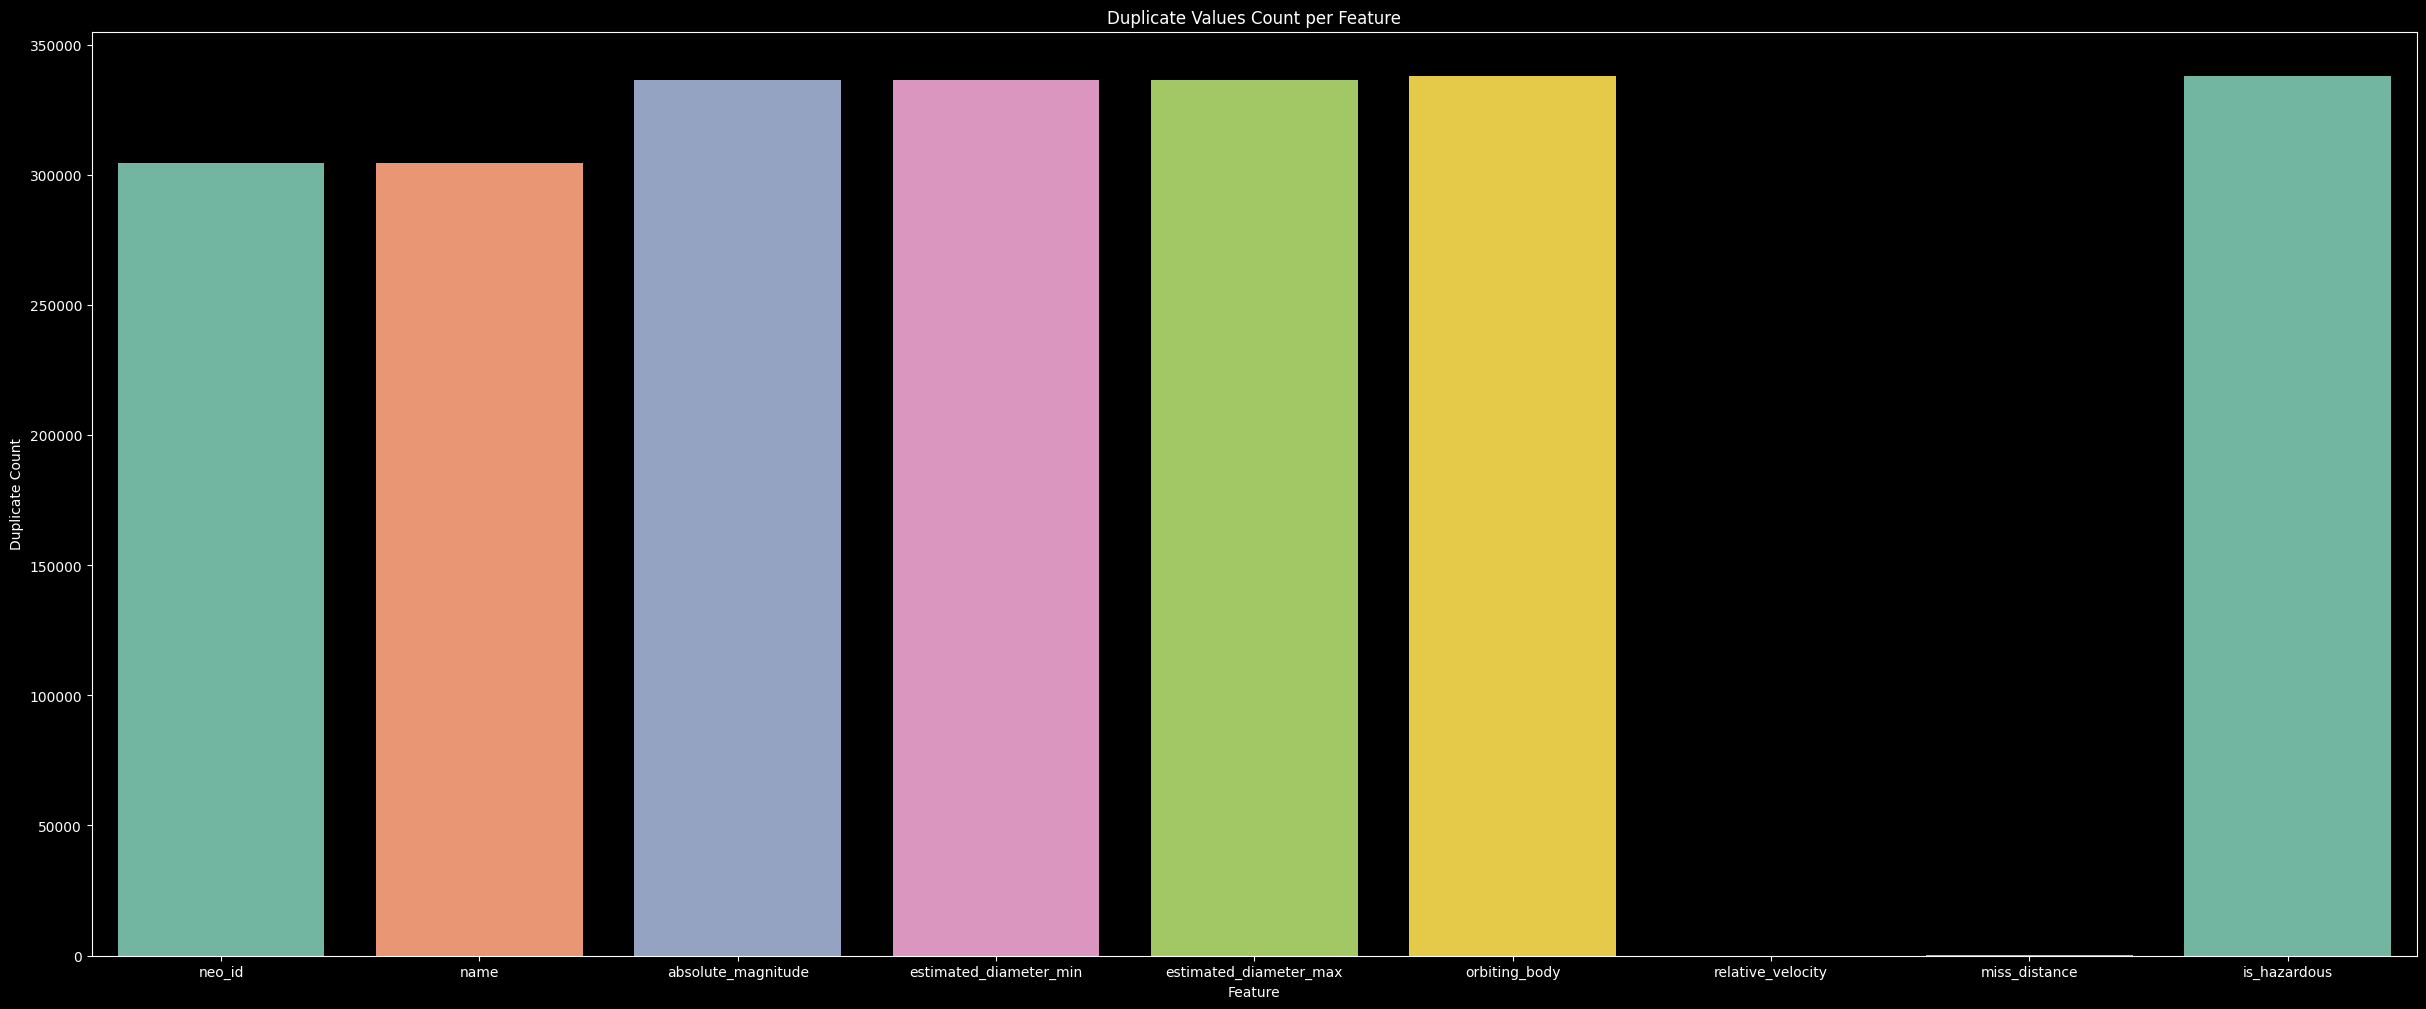

In [9]:
def count_duplicates(df):
    duplicate_counts = {}
    for column in df.columns:
        
        count = df[column].duplicated().sum()
        duplicate_counts[column] = count
    return duplicate_counts

duplicates = count_duplicates(data)
duplicates_df = pd.DataFrame(list(duplicates.items()), columns=['Feature', 'Duplicate Count'])
plt.figure(figsize=(30, 12))
sns.barplot(x='Feature', y='Duplicate Count', data=duplicates_df, palette='Set2')
plt.title('Duplicate Values Count per Feature')
plt.xlabel('Feature')
plt.ylabel('Duplicate Count')
plt.show()

In [10]:
data.duplicated().sum()

0

Note:The dataset doesn't conatin duplicates rows.

In [11]:
data.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

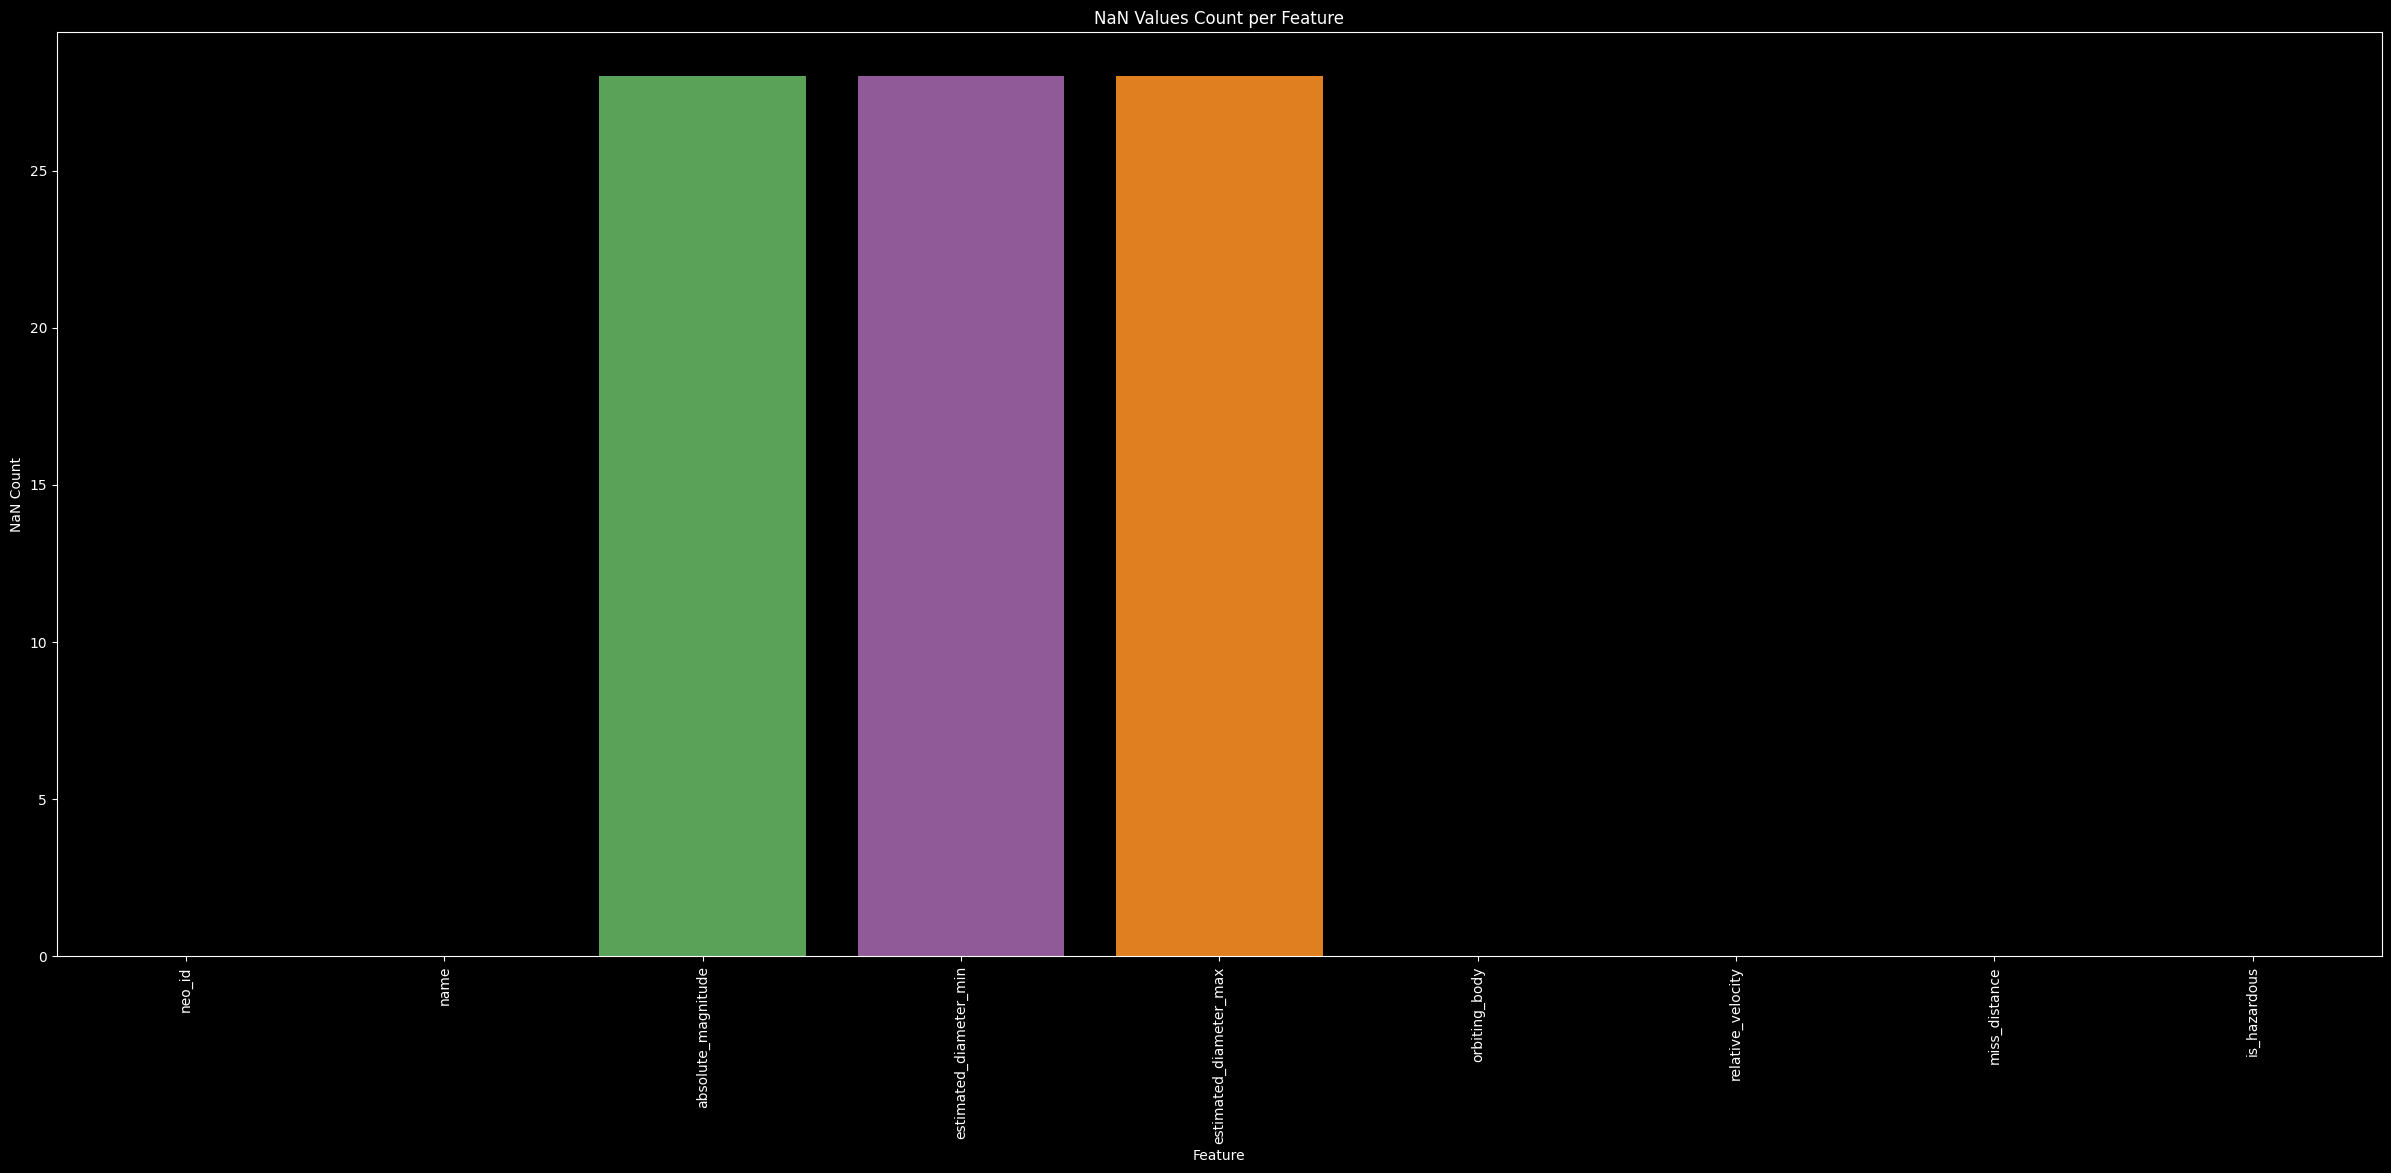

In [12]:
def count_nans(df):
    nan_counts = {}
    for column in df.columns:       
        count = df[column].isna().sum()
        nan_counts[column] = count
    return nan_counts

nans = count_nans(data)
nans_df = pd.DataFrame(list(nans.items()), columns=['Feature', 'NaN Count'])
plt.figure(figsize=(30, 12))
sns.barplot(x='Feature', y='NaN Count', data=nans_df, palette='Set1')
plt.title('NaN Values Count per Feature')
plt.xlabel('Feature')
plt.ylabel('NaN Count')
plt.xticks(rotation=90) 
plt.show()

Note: The nan rows are to smalll so removing them will be not a big problem 

In [13]:
data_cleaned = data.dropna()

In [14]:
data_cleaned.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

Now our data doesn't contain nan

In [15]:
def Invetsagte_Unique(col):
  for c in col:
    print(c)
    print(data[c].unique())
    print('******************')
col=data_cleaned.columns
Invetsagte_Unique(col)    

neo_id
[ 2162117  2349507  2455415 ... 54460107 54459238 54456245]
******************
name
['162117 (1998 SD15)' '349507 (2008 QY)' '455415 (2003 GA)' ...
 '(2024 ND3)' '(2024 NQ2)' '(2024 NE)']
******************
absolute_magnitude
[19.14  18.5   21.45  ... 23.781 23.218 23.887]
******************
estimated_diameter_min
[0.39496169 0.53034072 0.13631856 ... 0.04659668 0.0603886  0.0443767 ]
******************
estimated_diameter_max
[0.8831612  1.18587791 0.30481756 ... 0.10419334 0.13503302 0.09922931]
******************
orbiting_body
['Earth']
******************
relative_velocity
[ 71745.40104768 109949.75714849  24865.50679812 ...  11832.04103088
  56198.38273287  42060.35782998]
******************
miss_distance
[58143623.31916973 55801047.81819944 67206887.72254463 ...
 53460784.4719883   5184742.39379309  7126682.4570791 ]
******************
is_hazardous
[False  True]
******************


Note: Regarding object columns like orbiting_body is one class and it is easier for us  to remove it as long  as all rows conatin it 

_Outliers Part_

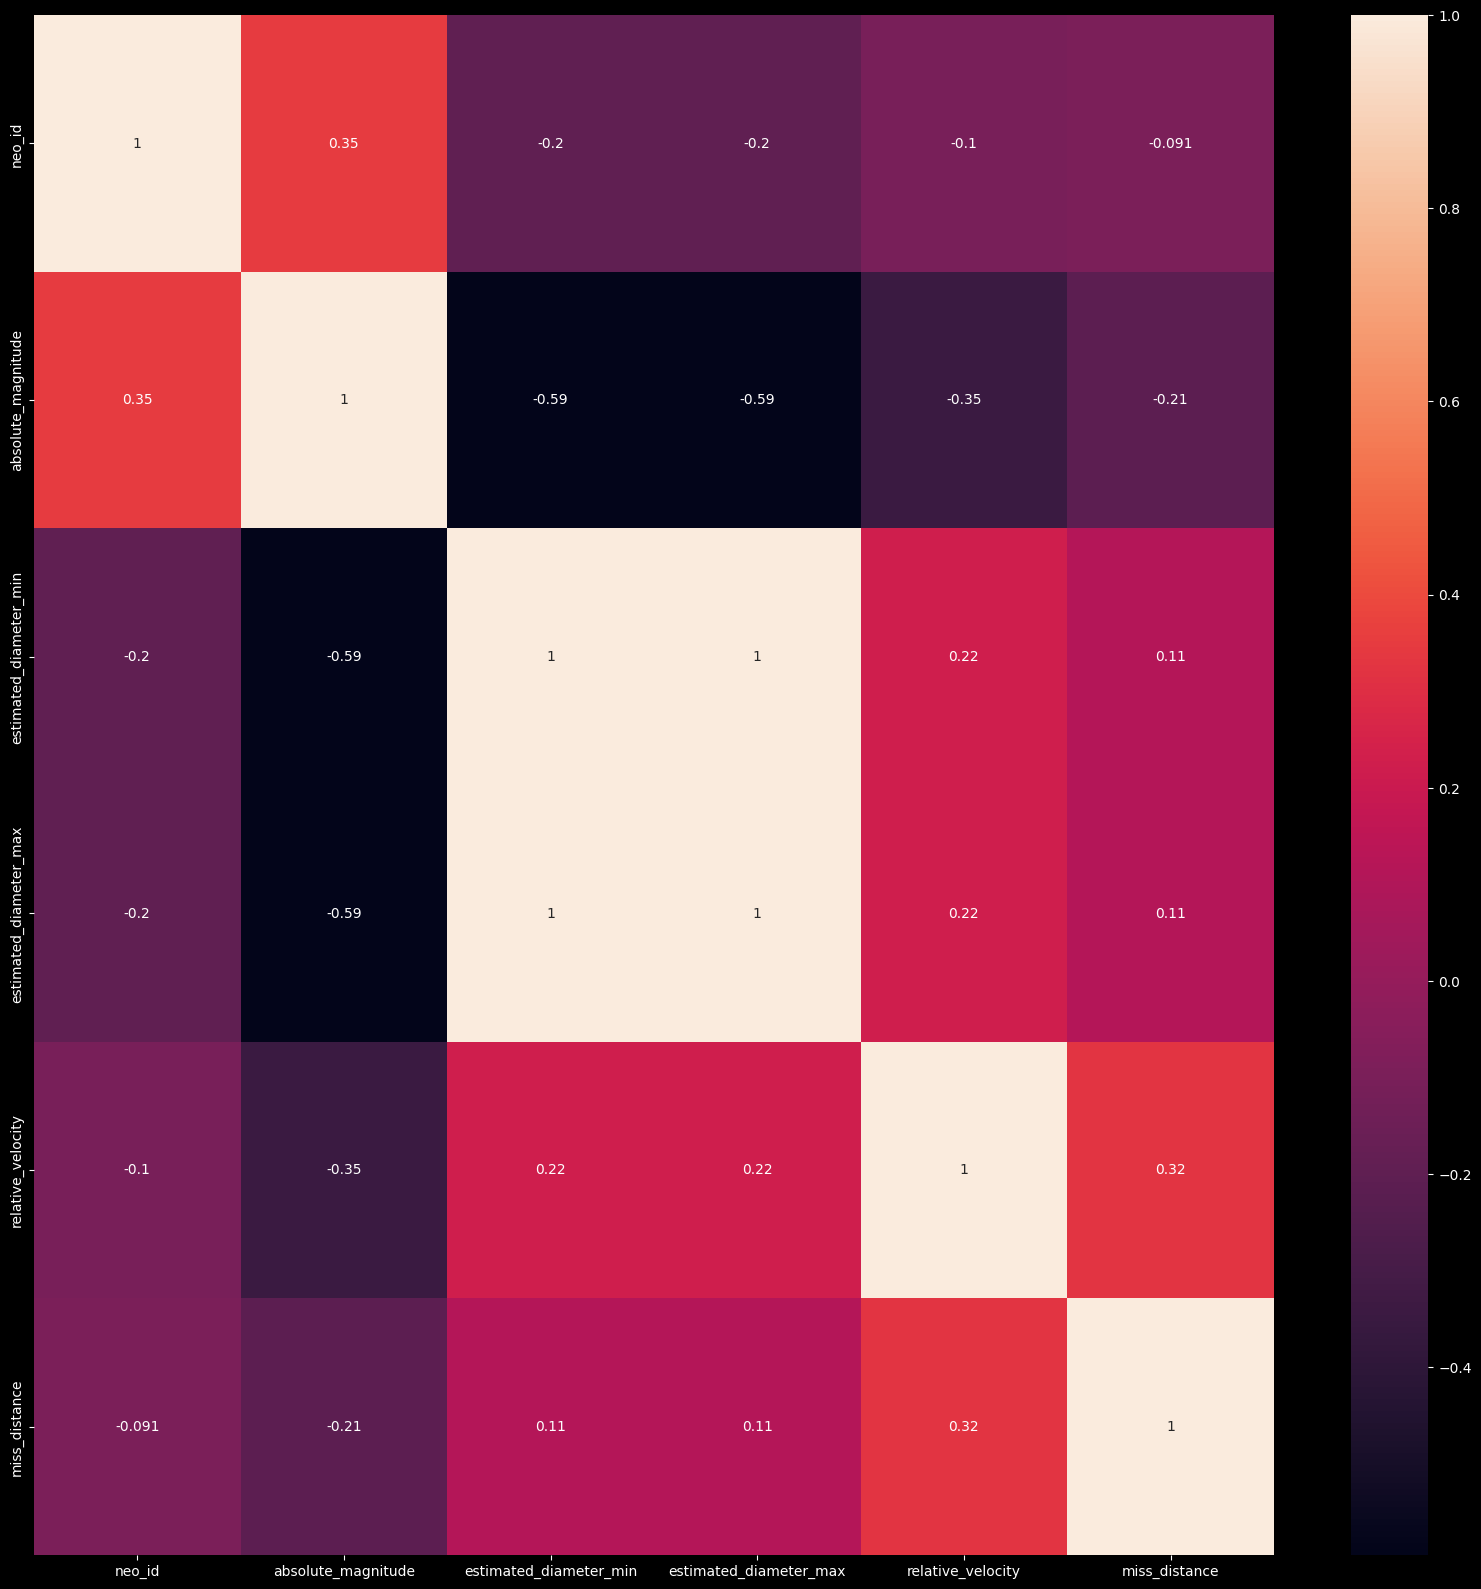

In [16]:
plt.figure(figsize=(20, 20))
cor = data_cleaned.select_dtypes(include=[np.number]).corr()
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns,annot=True )
plt.show()


In [17]:
data_cleaned.columns

Index(['neo_id', 'name', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'orbiting_body', 'relative_velocity',
       'miss_distance', 'is_hazardous'],
      dtype='object')

In [18]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [19]:
def find_outliers(df):
    outliers = []
    out_columns = ['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
                   'estimated_diameter_max', 'relative_velocity', 'miss_distance']
    
    for column in out_columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_count = len(column_outliers)
            total_count = len(df[column])
            outlier_percentage = (outlier_count / total_count) * 100
            
            outliers.append({
                'Feature': column,
                'Outlier Count': outlier_count,
                'Outlier Percentage': outlier_percentage
            })
            
    # Convert the list of dictionaries into a DataFrame
    outliers_df = pd.DataFrame(outliers)
    return outliers_df



def remove_outliers(df):
    out_columns = ['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
                   'estimated_diameter_max', 'relative_velocity', 'miss_distance']
    for column in out_columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def plot_outliers(outliers_df):
    plt.figure(figsize=(14, 8))
    bar_plot = sns.barplot(x='Feature', y='Outlier Count', data=outliers_df, palette='Set2')
    for index, row in outliers_df.iterrows():
        bar_plot.text(index, row['Outlier Count'] + 0.1, 
                      f"{row['Outlier Percentage']:.2f}%", 
                      color='white', 
                      ha='center')
    

    plt.title('Number of Outliers per Feature')
    plt.xlabel('Feature')
    plt.ylabel('Number of Outliers')
    plt.xticks(rotation=45, ha='right') 
   
    plt.tight_layout()
    plt.show()

def plot_box_plots(df):
    numeric_columns = ['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
                       'estimated_diameter_max', 'relative_velocity', 'miss_distance']
    
    #
    colors = ['#6495ed', '#9932cc', '#00ced1', '#adff2f', '#4b0082', '#ffd700']
    
    
    num_features = len(numeric_columns)
    num_rows = (num_features + 2) // 3  
    
    plt.figure(figsize=(16, num_rows * 4))
    
    for i, column in enumerate(numeric_columns):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=df[column], color=colors[i])
        plt.title(f'Box Plot of {column}')
        plt.xlabel('')  
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()




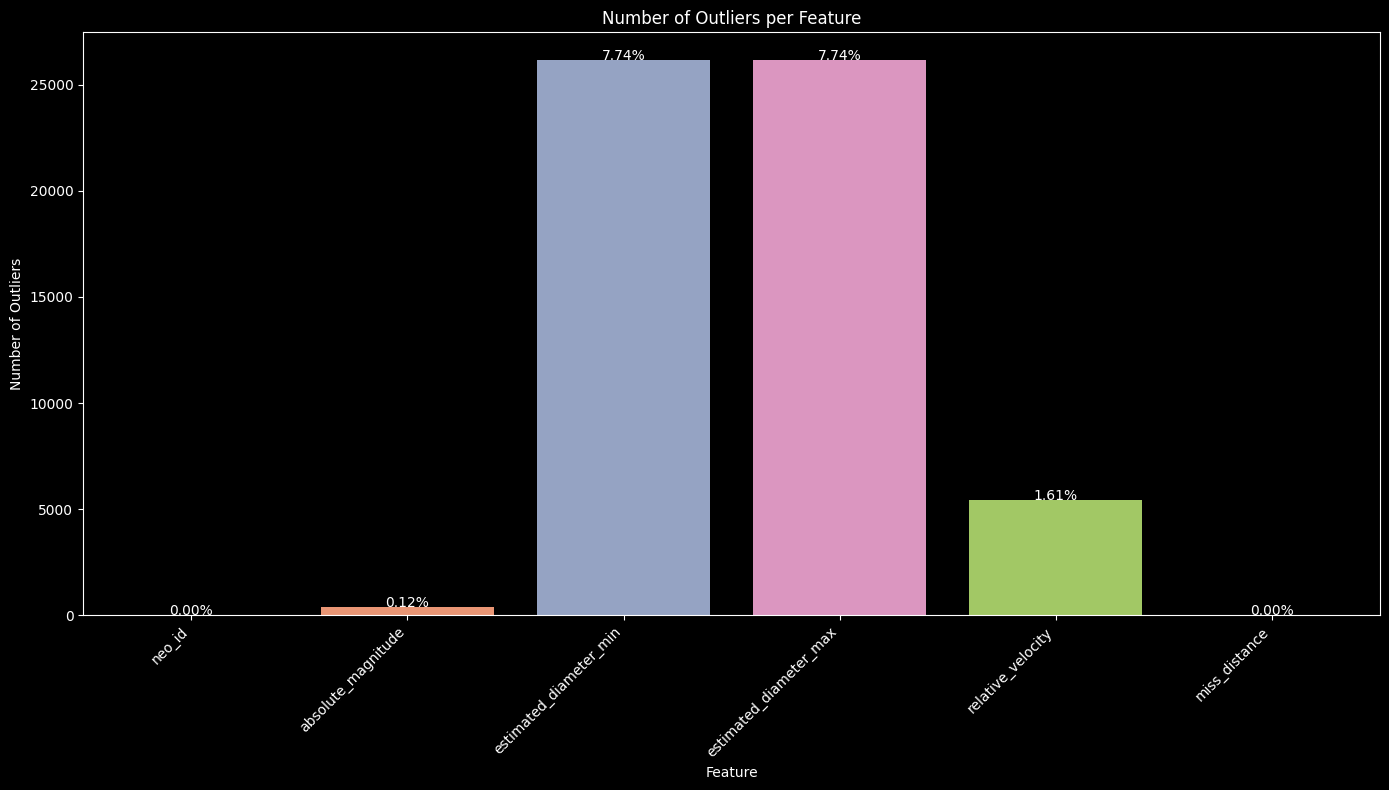

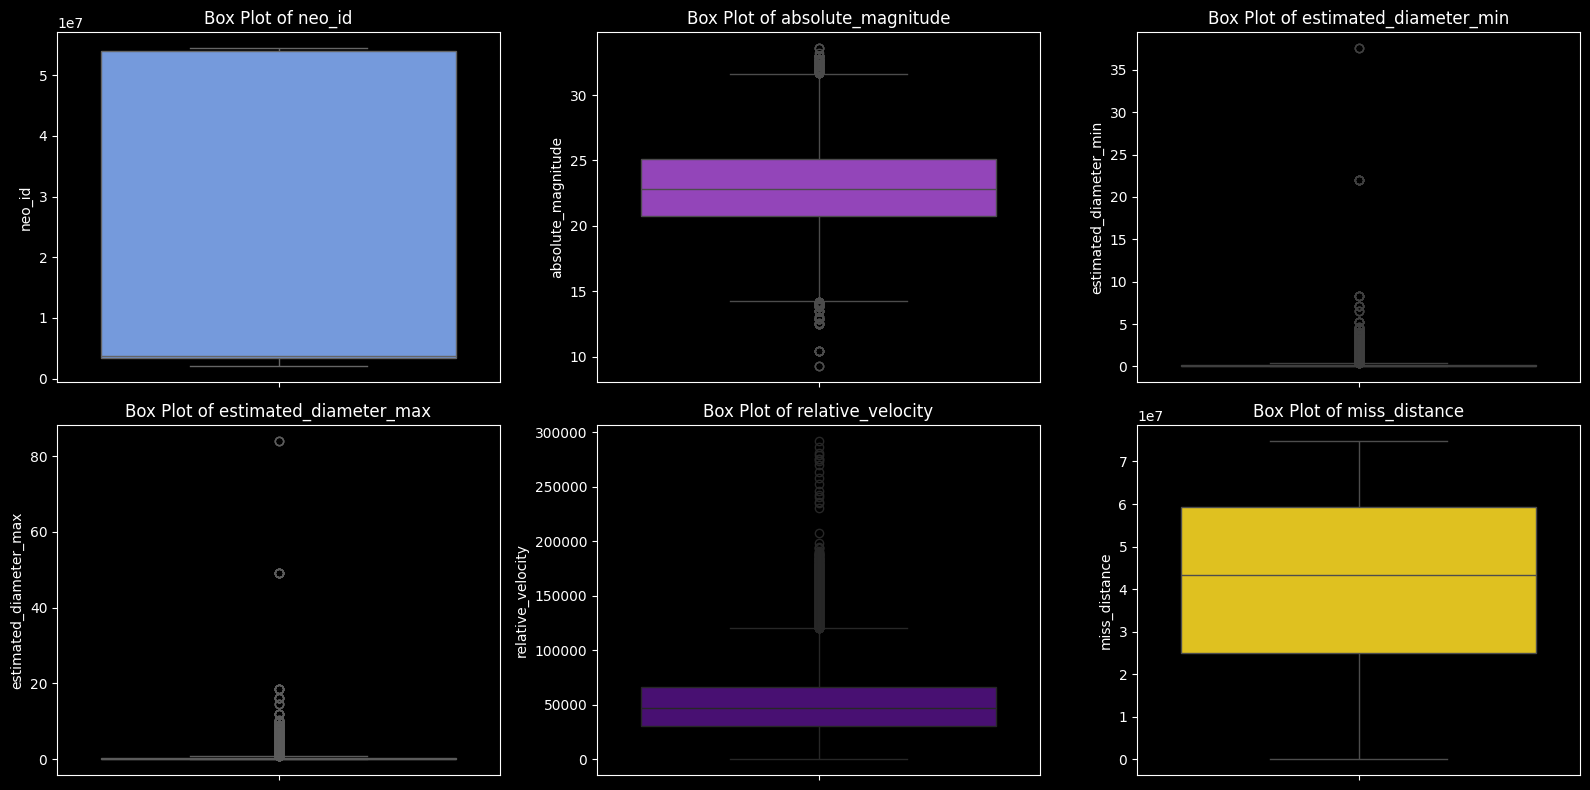

In [20]:
outliers = find_outliers(data_cleaned)
plot_outliers(outliers)
plot_box_plots(data_cleaned)


Note: we will find out that outliers percentage is not big as much so removing it will not harm  our accuarcy alot 

In [21]:
data_cleaned_outliers_removed=data_cleaned.copy()
data_cleaned_outliers_removed=remove_outliers(data_cleaned_outliers_removed)

-->Check Removal

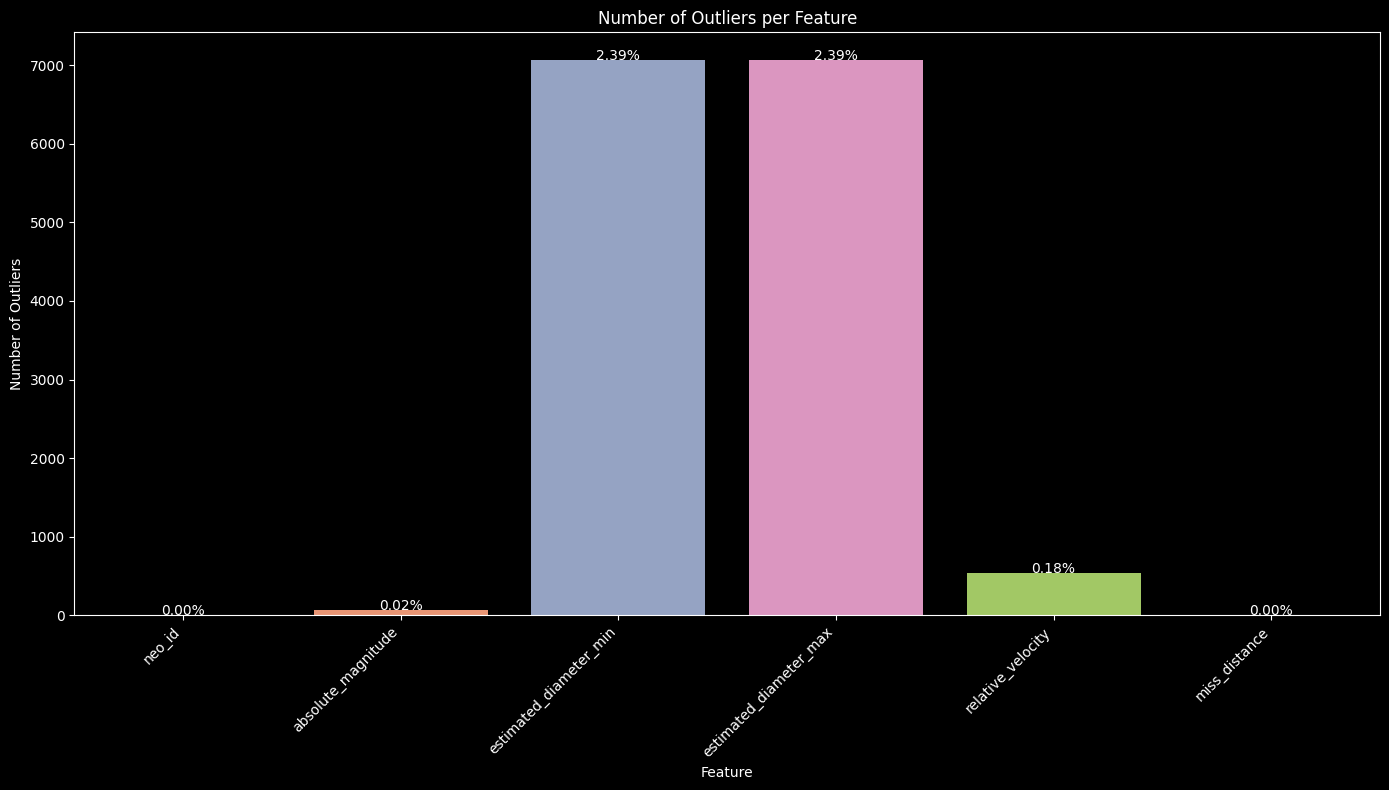

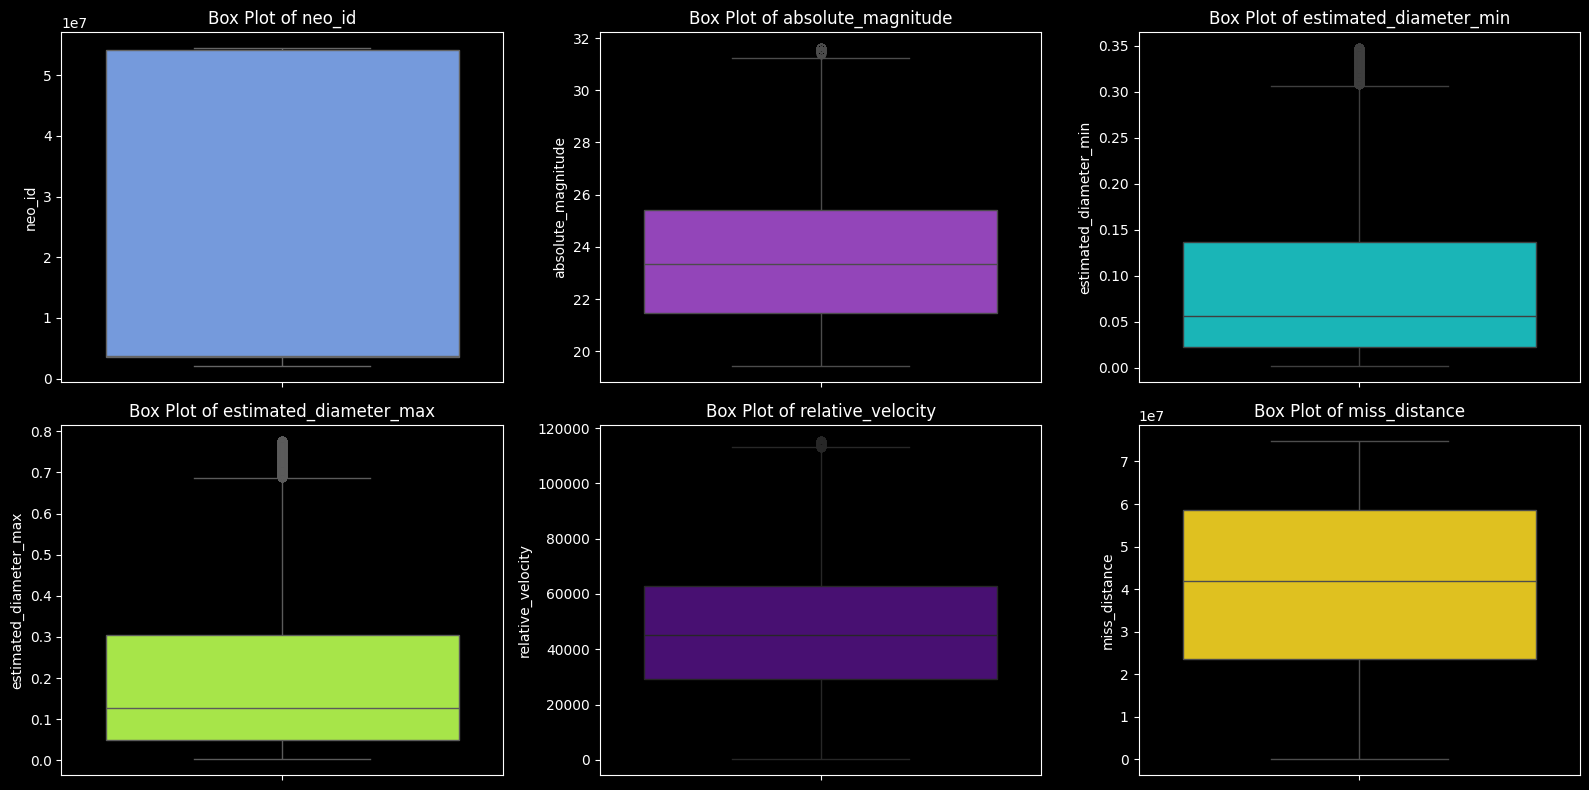

In [22]:
outliers = find_outliers(data_cleaned_outliers_removed)
plot_outliers(outliers)
plot_box_plots(data_cleaned_outliers_removed)


In [23]:
data_cleaned_outliers_removed.shape

(295768, 9)

In [24]:
data_cleaned_outliers_removed.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# _EDA_Part_

A)Pie and Donuts

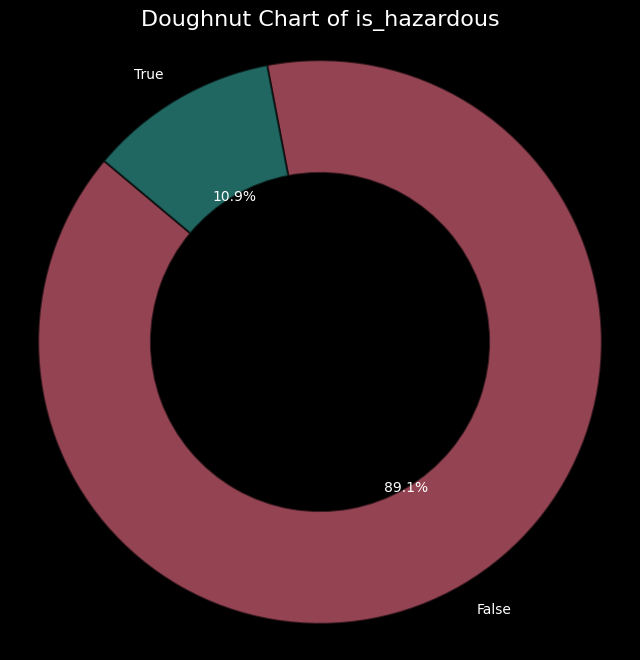

In [25]:
def Draw_Donut_Is_Hazardous(feature_name):
    global data_cleaned_outliers_removed
    count_0_1 = data_cleaned_outliers_removed[feature_name].value_counts()
    num_unique_values = len(count_0_1)
    colors = sns.color_palette("husl", num_unique_values)  
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        count_0_1,
        labels=count_0_1.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.6)
    )
    plt.title(f'Doughnut Chart of {feature_name}', fontsize=16)
    plt.axis('equal')
    plt.show()

Draw_Donut_Is_Hazardous('is_hazardous')    

**_Name Feature EDA_**

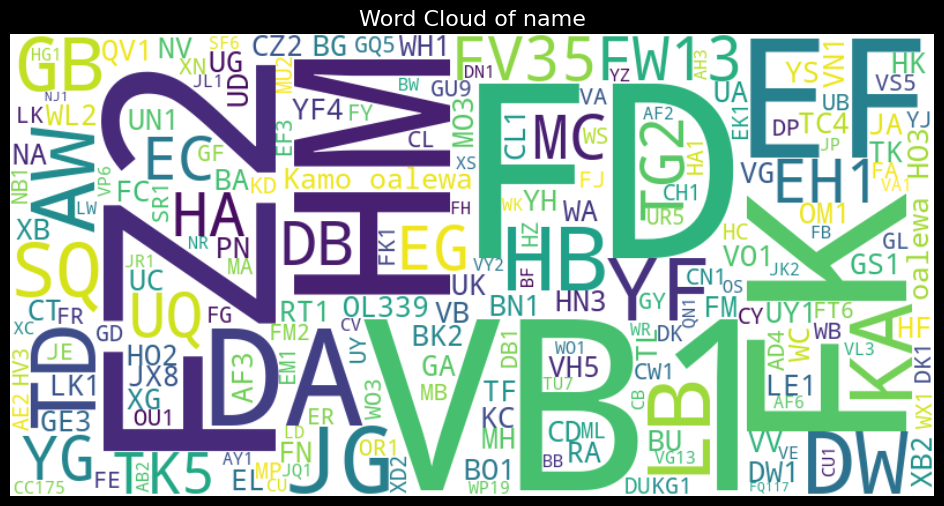

In [26]:
from wordcloud import WordCloud

def plot_word_cloud(df, feature_name):

    text = ' '.join(df[feature_name].astype(str))

    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        colormap='viridis', 
        contour_color='black', 
        contour_width=1
    ).generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {feature_name}', fontsize=16)
    plt.show()

plot_word_cloud(data_cleaned_outliers_removed, 'name')    


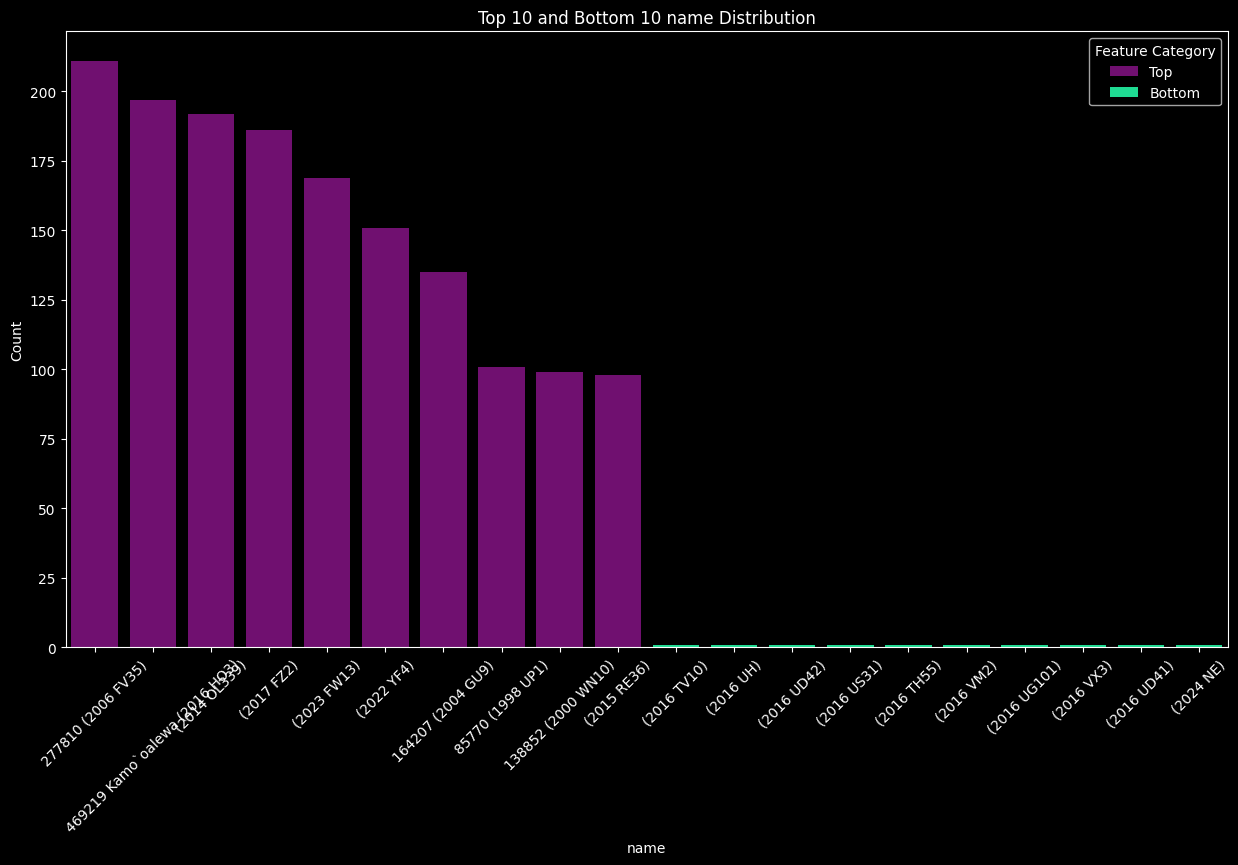

The most frequent name is '277810 (2006 FV35)' with 211 occurrences.
The least frequent name is '(2021 TR10)' with 1 occurrences.


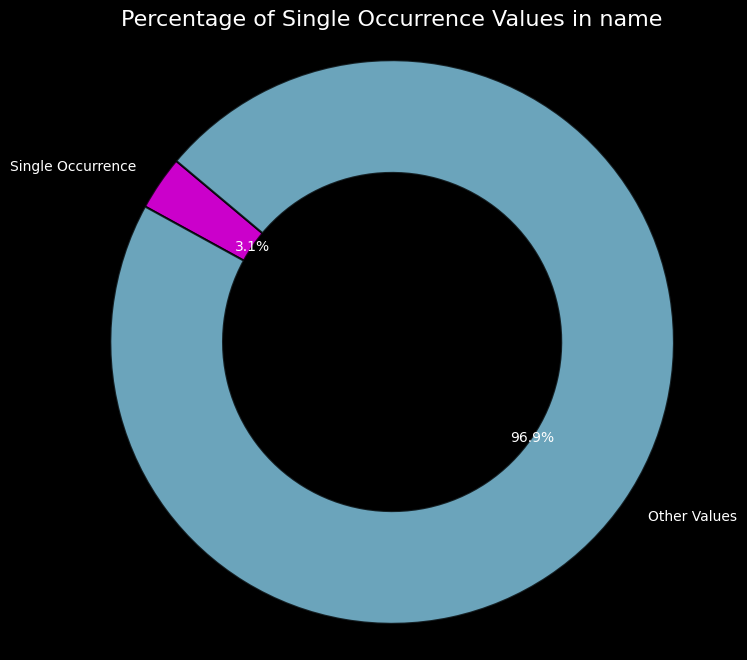

Number of values with a single occurrence: 9252
Percentage of values with a single occurrence: 3.13%


In [27]:
def plot_top_bottom_feature_distribution(df, feature_name):
    value_counts = df[feature_name].value_counts()
    most_frequent_value = value_counts.idxmax()
    most_frequent_count = value_counts.max()
    least_frequent_value = value_counts.idxmin()
    least_frequent_count = value_counts.min()

    top_10_values = value_counts.head(10)
    bottom_10_values = value_counts.tail(10)

    combined_values = pd.concat([top_10_values, bottom_10_values])
    
    value_labels = ['Top'] * len(top_10_values) + ['Bottom'] * len(bottom_10_values)
    
    df_plot = pd.DataFrame({
        feature_name: combined_values.index,
        'Count': combined_values.values,
        'Label': value_labels
    })

 
    plt.figure(figsize=(15, 8))
    
    sns.barplot(
        data=df_plot,
        x=feature_name,
        y='Count',
        hue='Label',
        dodge=False,
        palette={'Top': '#800080', 'Bottom': '#00fa9a'}
    )
    
    plt.title(f'Top 10 and Bottom 10 {feature_name} Distribution')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.legend(title='Feature Category')
    plt.show()

    print(f"The most frequent {feature_name} is '{most_frequent_value}' with {most_frequent_count} occurrences.")
    print(f"The least frequent {feature_name} is '{least_frequent_value}' with {least_frequent_count} occurrences.")


    total_values = len(df[feature_name])
    single_occurrence_values = value_counts[value_counts == 1]
    num_single_occurrence = len(single_occurrence_values)
    percentage_single_occurrence = (num_single_occurrence / total_values) * 100

 
    donut_data = pd.Series([num_single_occurrence, total_values - num_single_occurrence],
                           index=['Single Occurrence', 'Other Values'])
   
    plt.figure(figsize=(8, 8))
    plt.pie(
        donut_data,
        labels=donut_data.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#ff00ff','#87ceeb'],
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5, alpha=0.8)
    )
    plt.title(f'Percentage of Single Occurrence Values in {feature_name}', fontsize=16)
    plt.axis('equal')
    plt.show()


    print(f'Number of values with a single occurrence: {num_single_occurrence}')
    print(f'Percentage of values with a single occurrence: {percentage_single_occurrence:.2f}%')

plot_top_bottom_feature_distribution(data_cleaned_outliers_removed, 'name')  

**_Absolute_Magnitude EDA_**

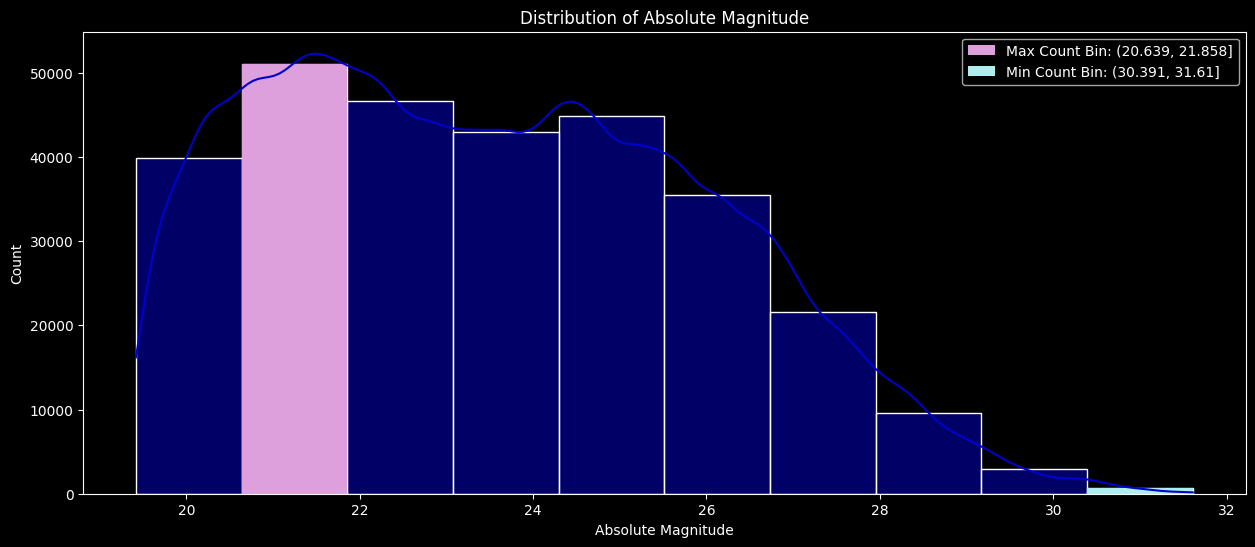

Counts for each bin:
(19.408, 20.639]: 39835
(20.639, 21.858]: 51104
(21.858, 23.077]: 46602
(23.077, 24.296]: 42922
(24.296, 25.515]: 44890
(25.515, 26.734]: 35494
(26.734, 27.953]: 21607
(27.953, 29.172]: 9634
(29.172, 30.391]: 2975
(30.391, 31.61]: 705


In [28]:
def plot_absolute_magnitude_distribution(df):

    bins = pd.cut(df['absolute_magnitude'], bins=10)  
    bin_counts = bins.value_counts().sort_index()
    max_bin = bin_counts.idxmax()
    max_count = bin_counts.max()
    min_bin = bin_counts.idxmin()
    min_count = bin_counts.min()
  
    plt.figure(figsize=(15, 6))
    sns.histplot(df['absolute_magnitude'], bins=10, kde=True, color='#0000cd', stat='count')
    

    plt.bar(max_bin.mid, max_count, width=max_bin.right - max_bin.left, color='#dda0dd', label=f'Max Count Bin: {max_bin}')
    plt.bar(min_bin.mid, min_count, width=min_bin.right - min_bin.left, color='#afeeee', label=f'Min Count Bin: {min_bin}')
    
    plt.xlabel('Absolute Magnitude')
    plt.ylabel('Count')
    plt.title('Distribution of Absolute Magnitude')
    plt.legend()
    
  
    plt.show()
    
   
    print("Counts for each bin:")
    for bin_range, count in bin_counts.items():
        print(f"{bin_range}: {count}")

plot_absolute_magnitude_distribution(data_cleaned_outliers_removed) 


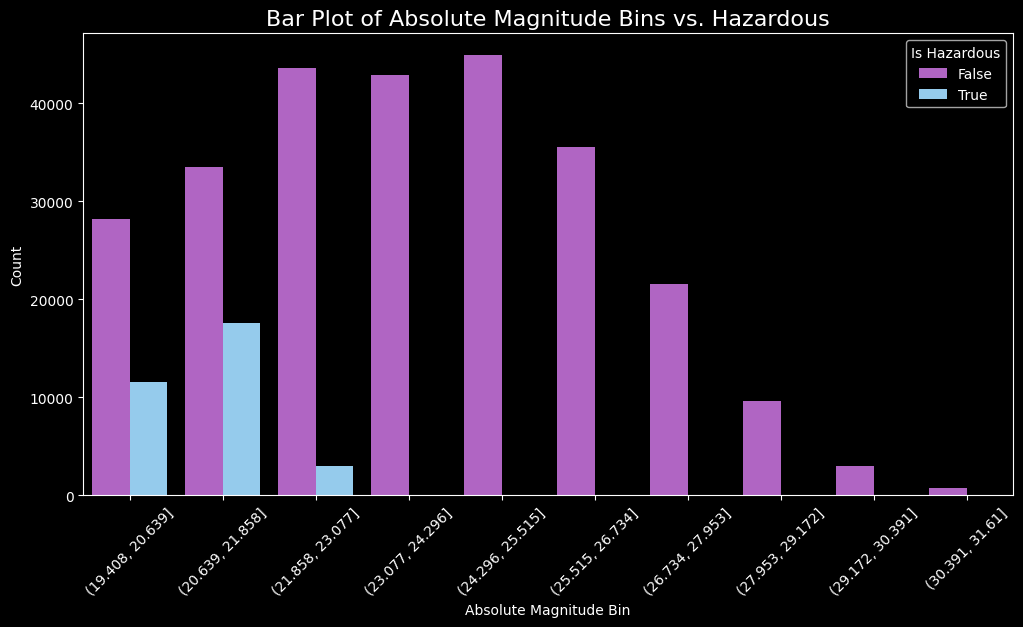

In [29]:
def plot_absolute_magnitude_vs_hazardous_bar(df, hue_colors):
  
    bins = pd.cut(df['absolute_magnitude'], bins=10)  # Adjust number of bins as needed
    df['magnitude_bin'] = bins
    
  
    aggregated_data = df.groupby(['magnitude_bin', 'is_hazardous']).size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        x='magnitude_bin',
        y='Count',
        hue='is_hazardous',
        data=aggregated_data,
        palette=hue_colors
    )
    
    plt.title('Bar Plot of Absolute Magnitude Bins vs. Hazardous', fontsize=16)
    plt.xlabel('Absolute Magnitude Bin')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.legend(title='Is Hazardous')
    
    plt.show()


hue_colors = {
    True: '#87cefa',
    False: '#ba55d3'  
}


plot_absolute_magnitude_vs_hazardous_bar(data_cleaned_outliers_removed, hue_colors)


**_Estimated_Diameter_Min Feature_**

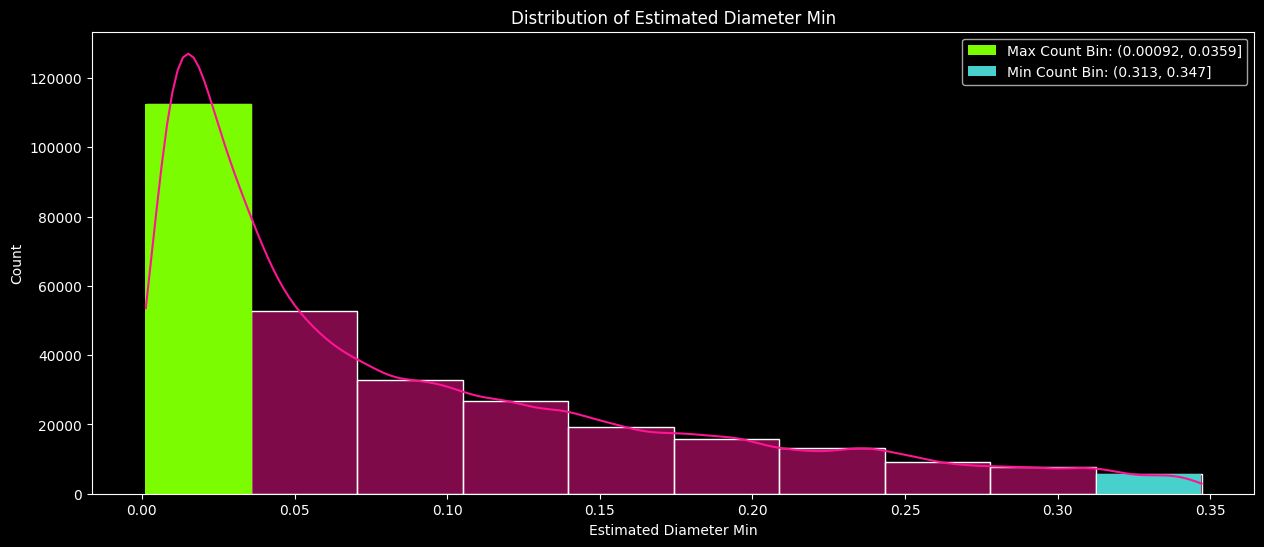

Counts for each bin:
(0.00092, 0.0359]: 112448
(0.0359, 0.0704]: 52790
(0.0704, 0.105]: 32758
(0.105, 0.14]: 26804
(0.14, 0.174]: 19270
(0.174, 0.209]: 15815
(0.209, 0.243]: 13148
(0.243, 0.278]: 9089
(0.278, 0.313]: 7831
(0.313, 0.347]: 5815


In [30]:
def plot_estimated_diameter_min_distribution(df):

    bins = pd.cut(df['estimated_diameter_min'], bins=10)  
    bin_counts = bins.value_counts().sort_index()
    max_bin = bin_counts.idxmax()
    max_count = bin_counts.max()
    min_bin = bin_counts.idxmin()
    min_count = bin_counts.min()
  
    plt.figure(figsize=(15, 6))
    sns.histplot(df['estimated_diameter_min'], bins=10, kde=True, color='#ff1493', stat='count')
    
    plt.bar(max_bin.mid, max_count, width=max_bin.right - max_bin.left, color='#7cfc00', label=f'Max Count Bin: {max_bin}')
    plt.bar(min_bin.mid, min_count, width=min_bin.right - min_bin.left, color='#48d1cc', label=f'Min Count Bin: {min_bin}')
    
    plt.xlabel('Estimated Diameter Min')
    plt.ylabel('Count')
    plt.title('Distribution of Estimated Diameter Min')
    plt.legend()
  
    plt.show()
    
    print("Counts for each bin:")
    for bin_range, count in bin_counts.items():
        print(f"{bin_range}: {count}")

plot_estimated_diameter_min_distribution(data_cleaned_outliers_removed)


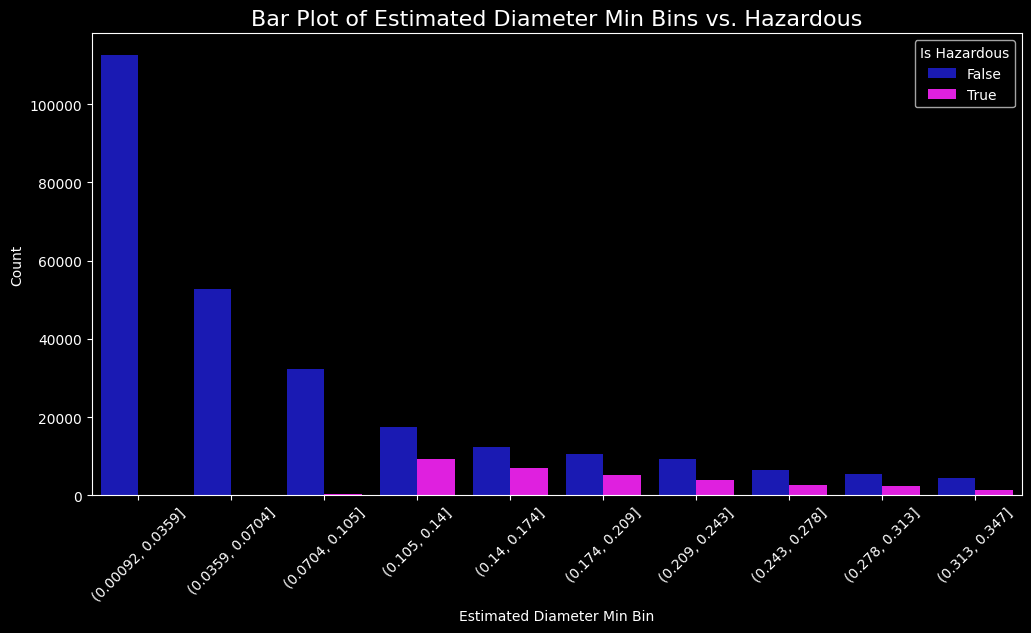

In [31]:
def plot_estimated_diameter_min_vs_hazardous_bar(df, hue_colors):
  
    bins = pd.cut(df['estimated_diameter_min'], bins=10)  # Adjust number of bins as needed
    df['diameter_bin'] = bins
    
    aggregated_data = df.groupby(['diameter_bin', 'is_hazardous']).size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        x='diameter_bin',
        y='Count',
        hue='is_hazardous',
        data=aggregated_data,
        palette=hue_colors
    )
    
    plt.title('Bar Plot of Estimated Diameter Min Bins vs. Hazardous', fontsize=16)
    plt.xlabel('Estimated Diameter Min Bin')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.legend(title='Is Hazardous')
    
    plt.show()


hue_colors = {
    True: '#ff00ff',
    False: '#0000cd'  
}


plot_estimated_diameter_min_vs_hazardous_bar(data_cleaned_outliers_removed, hue_colors)

**_Estimated_Diameter_Max Feature_**

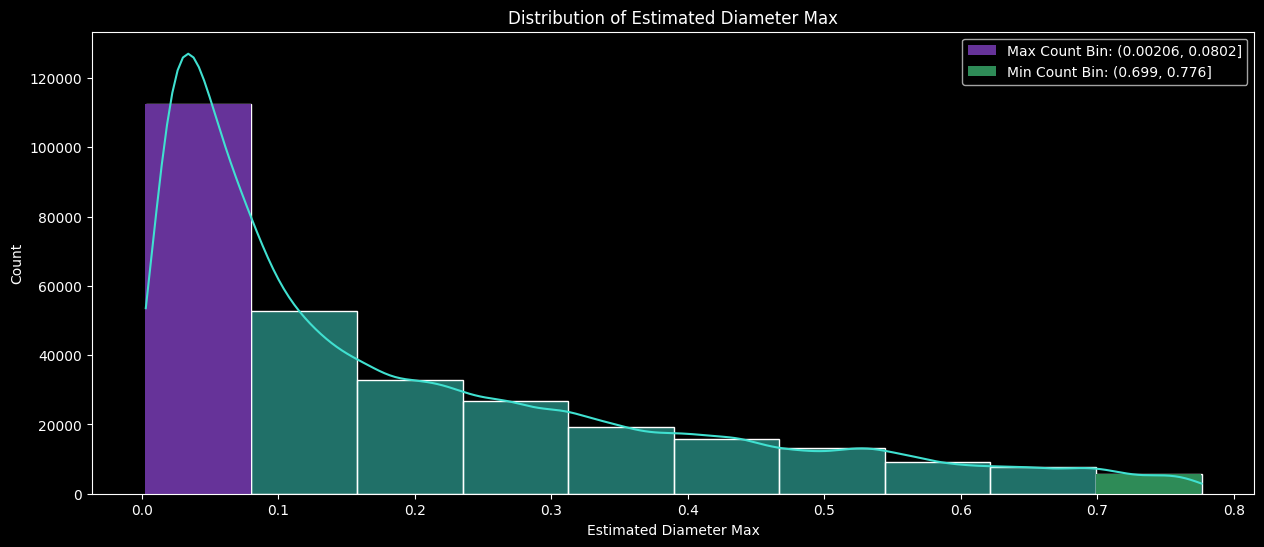

Counts for each bin:
(0.00206, 0.0802]: 112448
(0.0802, 0.158]: 52790
(0.158, 0.235]: 32758
(0.235, 0.312]: 26804
(0.312, 0.39]: 19270
(0.39, 0.467]: 15815
(0.467, 0.544]: 13148
(0.544, 0.622]: 9089
(0.622, 0.699]: 7831
(0.699, 0.776]: 5815


In [32]:
def plot_estimated_diameter_max_distribution(df):

    bins = pd.cut(df['estimated_diameter_max'], bins=10)  
    bin_counts = bins.value_counts().sort_index()
    max_bin = bin_counts.idxmax()
    max_count = bin_counts.max()
    min_bin = bin_counts.idxmin()
    min_count = bin_counts.min()
  
    plt.figure(figsize=(15, 6))
    sns.histplot(df['estimated_diameter_max'], bins=10, kde=True, color='#40e0d0', stat='count')
    
    plt.bar(max_bin.mid, max_count, width=max_bin.right - max_bin.left, color='#663399', label=f'Max Count Bin: {max_bin}')
    plt.bar(min_bin.mid, min_count, width=min_bin.right - min_bin.left, color='#2e8b57', label=f'Min Count Bin: {min_bin}')
    
    plt.xlabel('Estimated Diameter Max')
    plt.ylabel('Count')
    plt.title('Distribution of Estimated Diameter Max')
    plt.legend()
  
    plt.show()
    
    print("Counts for each bin:")
    for bin_range, count in bin_counts.items():
        print(f"{bin_range}: {count}")

plot_estimated_diameter_max_distribution(data_cleaned_outliers_removed)

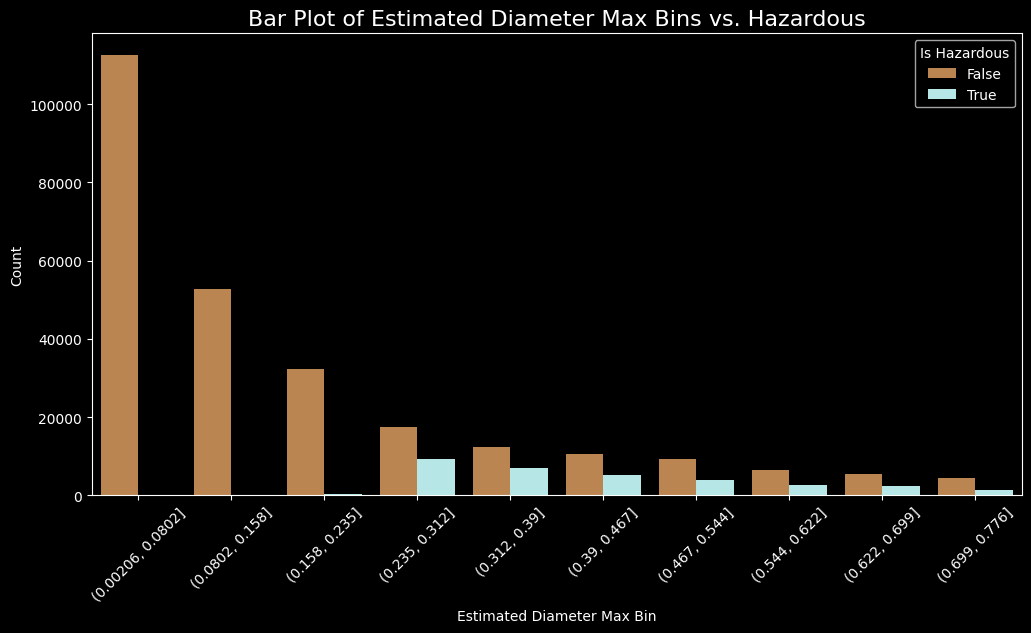

In [33]:
def plot_estimated_diameter_max_vs_hazardous_bar(df, hue_colors):
  
    bins = pd.cut(df['estimated_diameter_max'], bins=10) 
    df['diameter_max_bin'] = bins
    
    aggregated_data = df.groupby(['diameter_max_bin', 'is_hazardous']).size().reset_index(name='Count')

    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        x='diameter_max_bin',
        y='Count',
        hue='is_hazardous',
        data=aggregated_data,
        palette=hue_colors
    )
    
    plt.title('Bar Plot of Estimated Diameter Max Bins vs. Hazardous', fontsize=16)
    plt.xlabel('Estimated Diameter Max Bin')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.legend(title='Is Hazardous')
    
    plt.show()

hue_colors = {
    True: '#afeeee',
    False: '#cd853f'  
}

plot_estimated_diameter_max_vs_hazardous_bar(data_cleaned_outliers_removed, hue_colors)


**_Relative_Velocity Feature_**

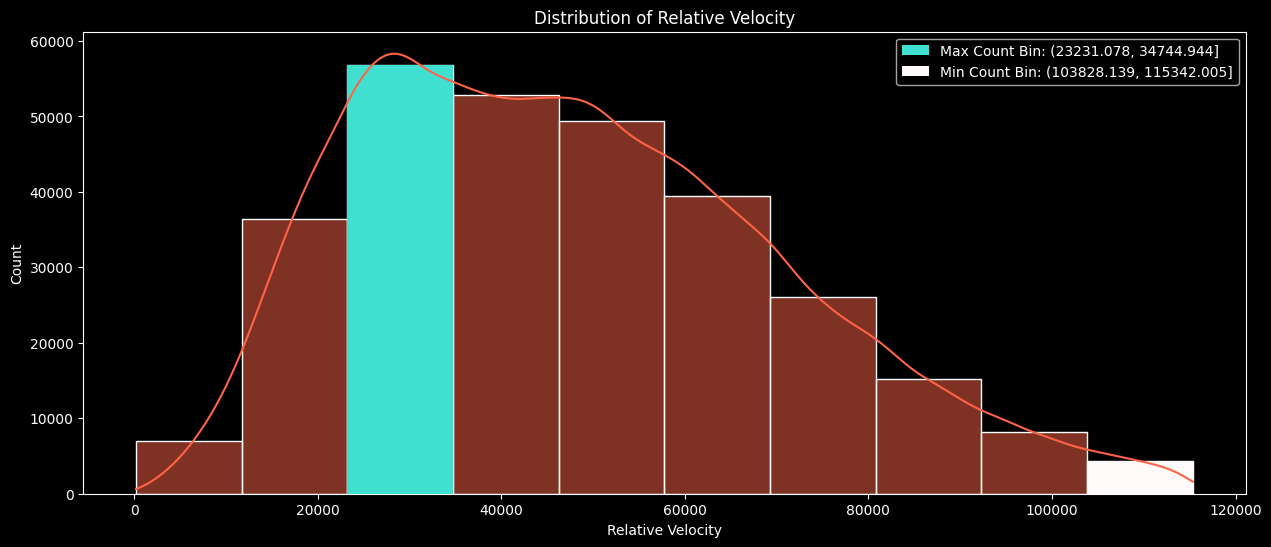

Counts for each bin:
(88.208, 11717.212]: 7038
(11717.212, 23231.078]: 36441
(23231.078, 34744.944]: 56824
(34744.944, 46258.81]: 52821
(46258.81, 57772.676]: 49375
(57772.676, 69286.542]: 39492
(69286.542, 80800.407]: 26015
(80800.407, 92314.273]: 15268
(92314.273, 103828.139]: 8181
(103828.139, 115342.005]: 4313


In [34]:
def plot_relative_velocity_distribution(df):
    bins = pd.cut(df['relative_velocity'], bins=10)
    bin_counts = bins.value_counts().sort_index()
    max_bin = bin_counts.idxmax()
    max_count = bin_counts.max()
    min_bin = bin_counts.idxmin()
    min_count = bin_counts.min()
  
    plt.figure(figsize=(15, 6))
    sns.histplot(df['relative_velocity'], bins=10, kde=True, color='#ff6347', stat='count')
    
    plt.bar(max_bin.mid, max_count, width=max_bin.right - max_bin.left, color='#40e0d0', label=f'Max Count Bin: {max_bin}')
    plt.bar(min_bin.mid, min_count, width=min_bin.right - min_bin.left, color='#fffafa', label=f'Min Count Bin: {min_bin}')
    
    plt.xlabel('Relative Velocity')
    plt.ylabel('Count')
    plt.title('Distribution of Relative Velocity')
    plt.legend()
  
    plt.show()
    
    print("Counts for each bin:")
    for bin_range, count in bin_counts.items():
        print(f"{bin_range}: {count}")

plot_relative_velocity_distribution(data_cleaned_outliers_removed)

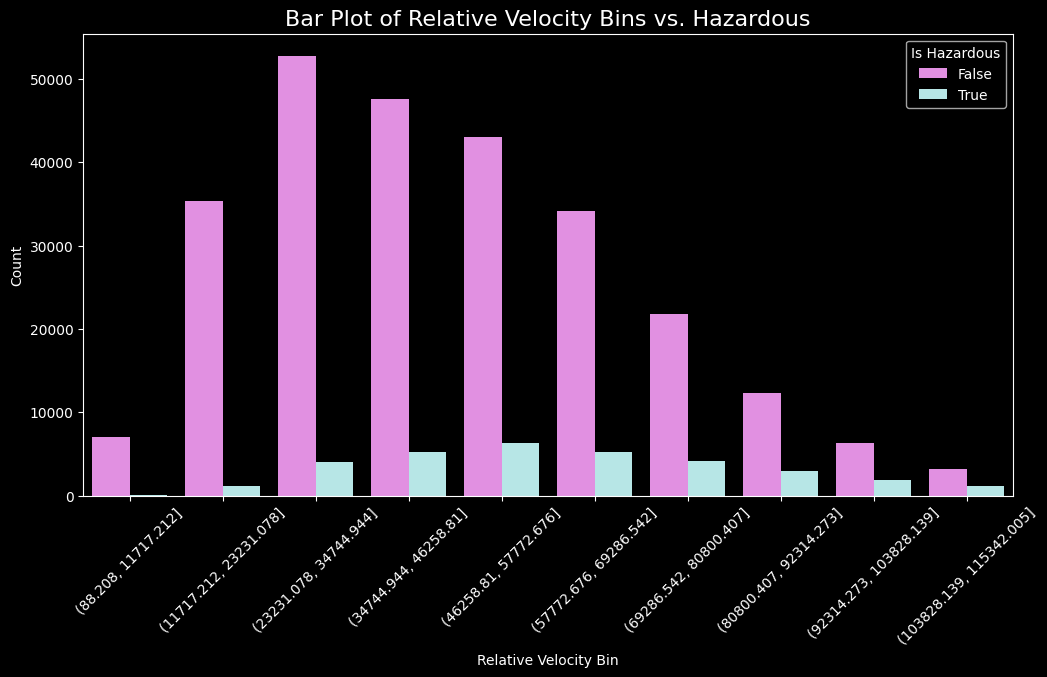

In [35]:
def plot_relative_velocity_vs_hazardous_bar(df, hue_colors):

    bins = pd.cut(df['relative_velocity'], bins=10)
    df['velocity_bin'] = bins

    aggregated_data = df.groupby(['velocity_bin', 'is_hazardous']).size().reset_index(name='Count')
    
    plt.figure(figsize=(12, 6))
    
    sns.barplot(
        x='velocity_bin',
        y='Count',
        hue='is_hazardous',
        data=aggregated_data,
        palette=hue_colors
    )
    
    plt.title('Bar Plot of Relative Velocity Bins vs. Hazardous', fontsize=16)
    plt.xlabel('Relative Velocity Bin')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Hazardous')
    
    plt.show()


hue_colors = {
    True: '#afeeee',  # Light blue
    False: '#ee82ee'  # Peruvian brown
}


plot_relative_velocity_vs_hazardous_bar(data_cleaned_outliers_removed, hue_colors)


**_Miss_Distance Feature_**

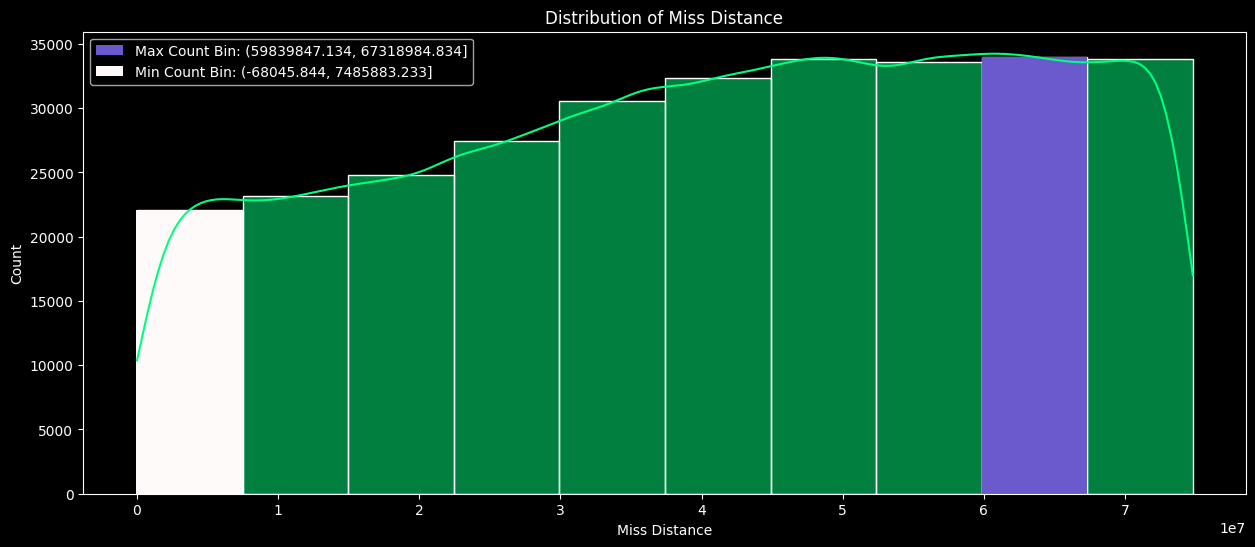

Counts for each bin:
(-68045.844, 7485883.233]: 22117
(7485883.233, 14965020.933]: 23205
(14965020.933, 22444158.633]: 24802
(22444158.633, 29923296.333]: 27431
(29923296.333, 37402434.033]: 30584
(37402434.033, 44881571.733]: 32339
(44881571.733, 52360709.434]: 33815
(52360709.434, 59839847.134]: 33630
(59839847.134, 67318984.834]: 34000
(67318984.834, 74798122.534]: 33845


In [36]:
def plot_miss_distance_distribution(df):
    bins = pd.cut(df['miss_distance'], bins=10)
    bin_counts = bins.value_counts().sort_index()
    max_bin = bin_counts.idxmax()
    max_count = bin_counts.max()
    min_bin = bin_counts.idxmin()
    min_count = bin_counts.min()
  
    plt.figure(figsize=(15, 6))
    sns.histplot(df['miss_distance'], bins=10, kde=True, color='#00ff7f', stat='count')
    
    plt.bar(max_bin.mid, max_count, width=max_bin.right - max_bin.left, color='#6a5acd', label=f'Max Count Bin: {max_bin}')
    plt.bar(min_bin.mid, min_count, width=min_bin.right - min_bin.left, color='#fffafa', label=f'Min Count Bin: {min_bin}')
    
    plt.xlabel('Miss Distance')
    plt.ylabel('Count')
    plt.title('Distribution of Miss Distance')
    plt.legend()
  
    plt.show()
    
    print("Counts for each bin:")
    for bin_range, count in bin_counts.items():
        print(f"{bin_range}: {count}")

plot_miss_distance_distribution(data_cleaned_outliers_removed)


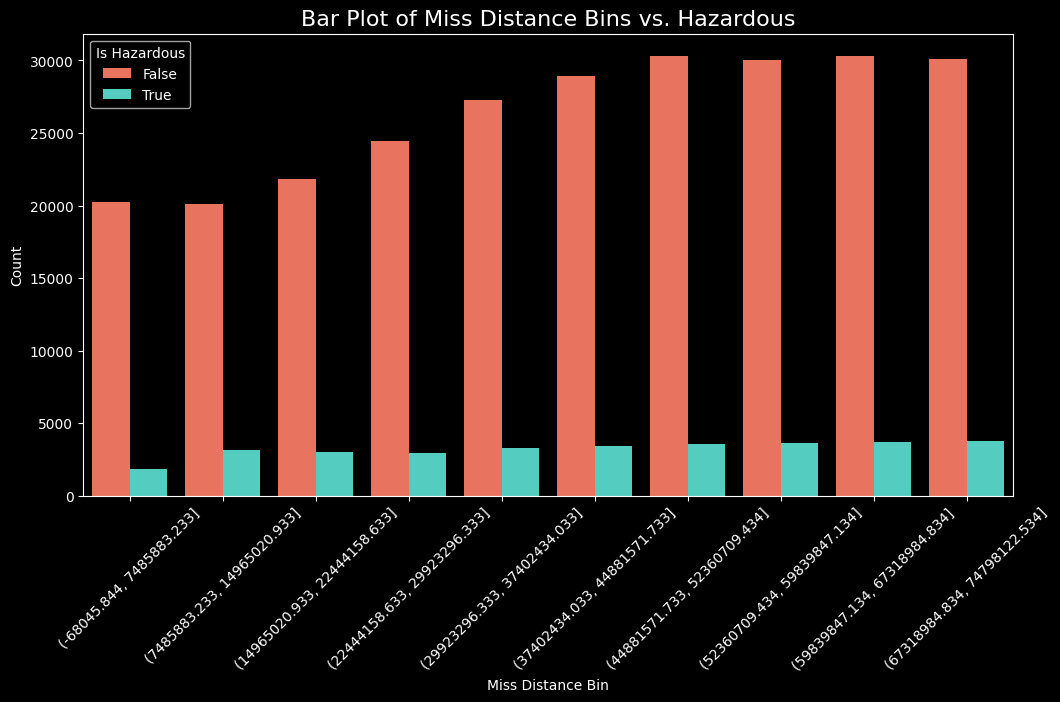

In [37]:
def plot_miss_distance_vs_hazardous_bar(df, hue_colors):
 
    bins = pd.cut(df['miss_distance'], bins=10)
    df['distance_bin'] = bins
    

    aggregated_data = df.groupby(['distance_bin', 'is_hazardous']).size().reset_index(name='Count')
    
    plt.figure(figsize=(12, 6))
    

    sns.barplot(
        x='distance_bin',
        y='Count',
        hue='is_hazardous',
        data=aggregated_data,
        palette=hue_colors
    )
    
    plt.title('Bar Plot of Miss Distance Bins vs. Hazardous', fontsize=16)
    plt.xlabel('Miss Distance Bin')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Is Hazardous')
    
    plt.show()

hue_colors = {
    True: '#40e0d0',  
    False: '#ff6347'  
}

plot_miss_distance_vs_hazardous_bar(data_cleaned_outliers_removed, hue_colors)


In [38]:
eda_features = [
    'magnitude_bin',
    'diameter_max_bin',
    'velocity_bin',
    'distance_bin',
    'diameter_bin'
]

# Drop EDA features
data_cleaned_outliers_removed = data_cleaned_outliers_removed.drop(columns=eda_features)

# **_Preparing for Modeling_** 

In [39]:
data_Prepared=data_cleaned_outliers_removed.copy()


In [40]:
data_Prepared.shape

(295768, 9)

In [41]:
data_Prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295768 entries, 2 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  295768 non-null  int64  
 1   name                    295768 non-null  object 
 2   absolute_magnitude      295768 non-null  float64
 3   estimated_diameter_min  295768 non-null  float64
 4   estimated_diameter_max  295768 non-null  float64
 5   orbiting_body           295768 non-null  object 
 6   relative_velocity       295768 non-null  float64
 7   miss_distance           295768 non-null  float64
 8   is_hazardous            295768 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 20.6+ MB


* orbiting_body : is same for all rows so it will not affect our modeling if we removed it.
* name: is an useful object feature and conatin many unique values that has no relaations with our model
* neo_id: same as name it is for indexing only 

**_A) Removing unrelated Features_**

In [42]:
data_Prepared = data_Prepared.drop(['neo_id', 'name', 'orbiting_body'], axis=1)

In [43]:
data_Prepared.shape

(295768, 6)

**_B) Label Encoding our target_** 

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_Prepared['is_hazardous'] = label_encoder.fit_transform(data_Prepared['is_hazardous'])

mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping:")
for label, encoded in mapping.items():
    print(f"{label}: {encoded}")


Label Mapping:
False: 0
True: 1


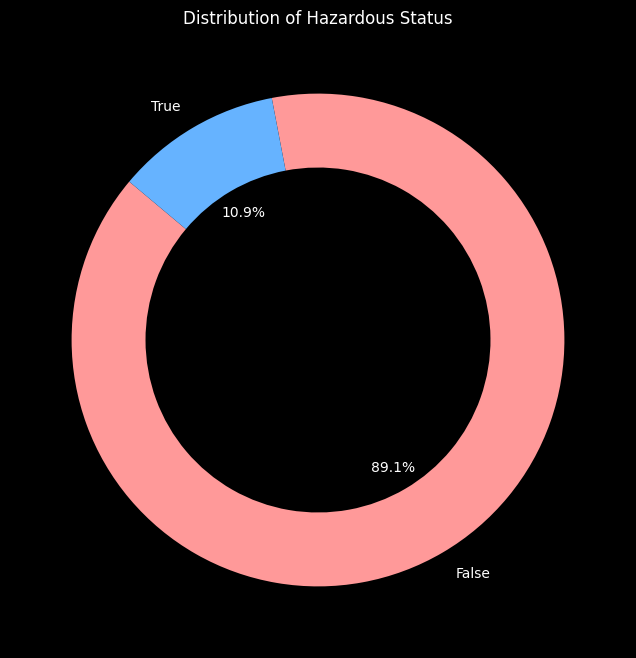

In [45]:
value_counts = data_Prepared['is_hazardous'].value_counts()
labels = label_encoder.classes_
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(
    value_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3)  )

plt.title('Distribution of Hazardous Status')
plt.show()

In [46]:
data_Prepared.head()

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
2               21.45                0.136319                0.304818   
3               20.63                0.198863                0.444672   
4               22.70                0.076658                0.171412   
5               25.00                0.026580                0.059435   
6               21.50                0.133216                0.297879   

   relative_velocity  miss_distance  is_hazardous  
2       24865.506798   6.720689e+07             0  
3       78890.076805   3.039644e+07             0  
4       56036.519484   6.311863e+07             0  
5       47477.649832   4.290521e+07             0  
6       57853.295346   2.727908e+07             1

In [47]:
data_Prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295768 entries, 2 to 338198
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      295768 non-null  float64
 1   estimated_diameter_min  295768 non-null  float64
 2   estimated_diameter_max  295768 non-null  float64
 3   relative_velocity       295768 non-null  float64
 4   miss_distance           295768 non-null  float64
 5   is_hazardous            295768 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 15.8 MB


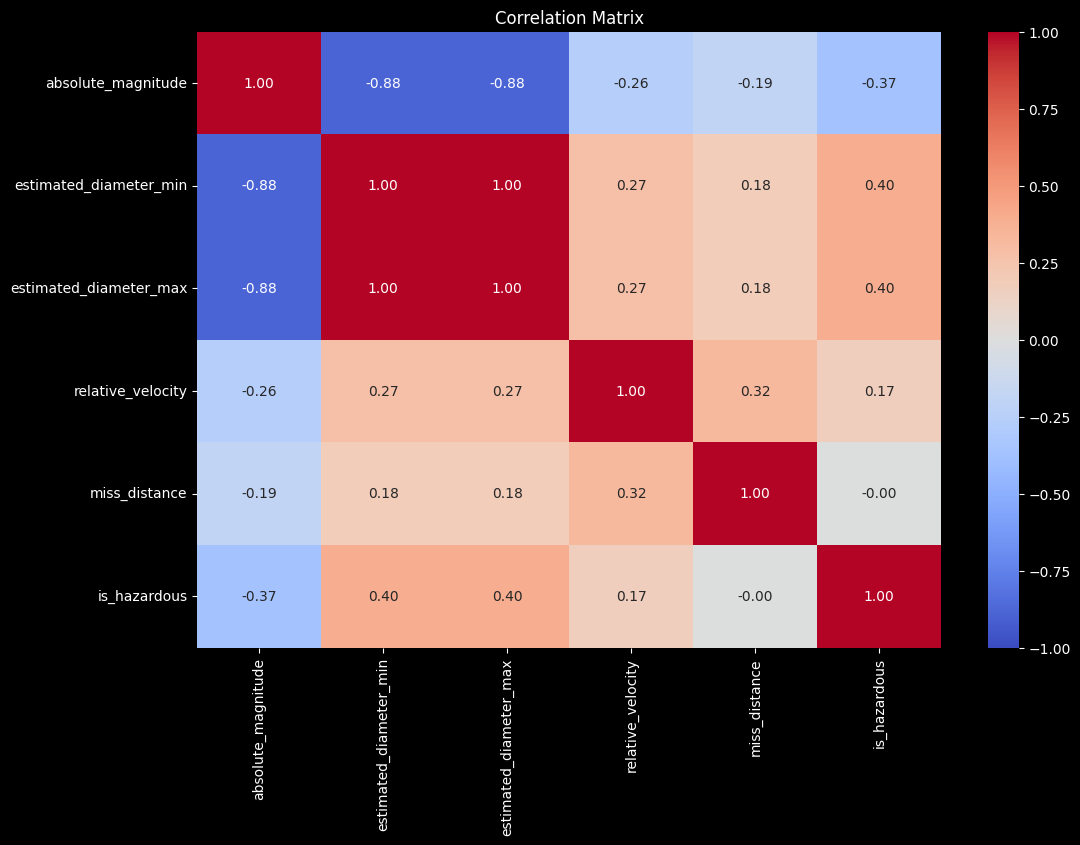

In [48]:
correlation_matrix = data_Prepared.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    fmt='.2f'
)
plt.title('Correlation Matrix')
plt.show()

**_C) Handling Unbalanced data_**

In [49]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

X = data_Prepared.drop(columns=['is_hazardous'])
y = data_Prepared['is_hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_original = X_train.copy()
y_train_original = y_train.copy()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_original)

X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_original.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Original Training Data Scaled:")
X_train_scaled_df.head()


Original Training Data Scaled:


absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0           -1.404848                2.019051                2.019051   
1            0.664301               -0.768786               -0.768786   
2           -0.510622                0.046263                0.046263   
3            1.466297               -0.940628               -0.940628   
4            0.624201               -0.755330               -0.755330   

   relative_velocity  miss_distance  
0           0.081612       0.788793  
1          -0.796649      -0.412629  
2           0.165589       1.280108  
3           0.625870       0.572617  
4           2.796750       1.320861

In [50]:
X_train_scaled_df.shape

(207037, 5)

In [51]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Apply the combination of oversampling and undersampling
X_train_resampled_smote_tomek, y_train_resampled_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

# Copy the resampled data
X_train_resampled_smote_tomek_copy = X_train_resampled_smote_tomek.copy()
y_train_resampled_smote_tomek_copy = y_train_resampled_smote_tomek.copy()

# Scale the resampled training data
scaler = StandardScaler()
X_train_resampled_smote_tomek_scaled = scaler.fit_transform(X_train_resampled_smote_tomek_copy)

# Convert to DataFrame
X_train_resampled_smote_tomek_scaled_df = pd.DataFrame(X_train_resampled_smote_tomek_scaled, columns=X_train_resampled_smote_tomek_copy.columns)

print("SMOTE-Tomek Training Data Scaled:")
X_train_resampled_smote_tomek_scaled_df.head()

SMOTE-Tomek Training Data Scaled:


absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0           -1.012471                1.490223                1.490223   
1           -0.053445               -0.437268               -0.437268   
2            2.066735               -1.401499               -1.401499   
3            1.163616               -1.220456               -1.220456   
4           -0.720033                0.682895                0.682895   

   relative_velocity  miss_distance  
0          -0.117114       0.802092  
1          -0.033315       1.294715  
2           0.425992       0.585340  
3           2.592278       1.335576  
4           1.034743       0.851073

In [52]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_train_resampled_rus, y_train_resampled_rus = rus.fit_resample(X_train, y_train)

X_train_resampled_rus_copy = X_train_resampled_rus.copy()
y_train_resampled_rus_copy = y_train_resampled_rus.copy()

scaler = StandardScaler()
X_train_resampled_rus_scaled = scaler.fit_transform(X_train_resampled_rus_copy)


X_train_resampled_rus_scaled_df = pd.DataFrame(X_train_resampled_rus_scaled, columns=X_train_resampled_rus_copy.columns)

print("Random Undersampling Training Data Scaled:")
X_train_resampled_rus_scaled_df.head()

Random Undersampling Training Data Scaled:


absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0            0.530229               -0.908312               -0.908312   
1            2.083554               -1.363195               -1.363195   
2            2.070681               -1.361722               -1.361722   
3            0.440119               -0.851373               -0.851373   
4            2.800143               -1.420000               -1.420000   

   relative_velocity  miss_distance  
0          -0.967629       1.611786  
1          -1.070524      -1.255322  
2          -1.239272      -1.663586  
3           0.774420      -0.786242  
4          -0.287657      -1.929773

# **_Modelling Part_**

In [54]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:55
   ---------------------------------------- 0.2/124.9 MB 1.6 MB/s eta 0:01:19
   ---------------------------------------- 0.4/124.9 MB 1.8 MB/s eta 0:01:09
   ---------------------------------------- 0.5/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 0.6/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.7/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.9/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 1.0/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 1.1/124.9 MB 2.1 MB/s eta 0:00:5

In [55]:
from sklearn.model_selection import train_test_split,ParameterGrid, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [56]:
import warnings
warnings.filterwarnings('ignore')

# **_Descion Tree_**

Evaluating on Original Data
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Training score: 0.9320652830170453
Best Testing score: 0.8799179542662654
Best Parameters: {'random_state': 44, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'class_weight': 'balanced'}
Confusion matrix:
 [[70929  8285]
 [ 2370  7147]]


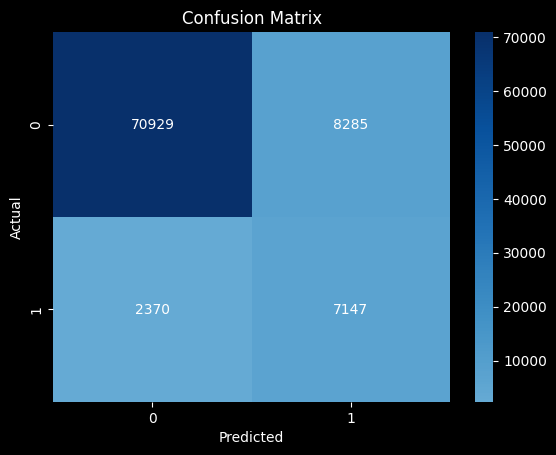

Evaluating on SMOTE-Tomek Resampled Data
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Training score: 0.9656679492556729
Best Testing score: 0.7128173918923488
Best Parameters: {'random_state': 44, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced'}
Confusion matrix:
 [[58443 20771]
 [ 4711  4806]]


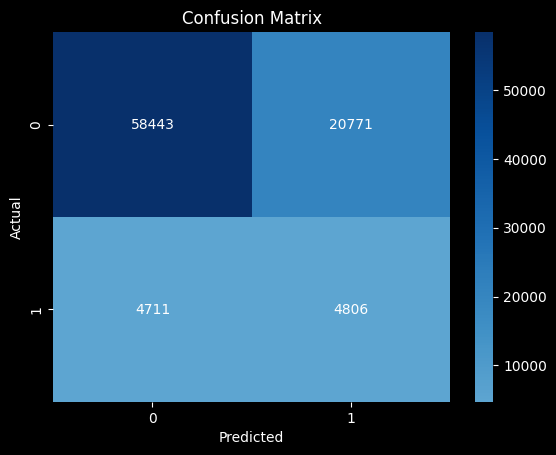

Evaluating on Random Oversampling Resampled Data
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Training score: 0.8737429428369795
Best Testing score: 0.6507759407647834
Best Parameters: {'random_state': 44, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced'}
Confusion matrix:
 [[48533 30681]
 [  306  9211]]


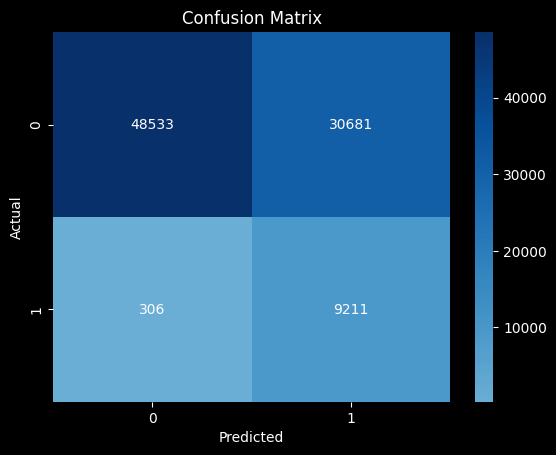

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     79214
           1       0.46      0.75      0.57      9517

    accuracy                           0.88     88731
   macro avg       0.72      0.82      0.75     88731
weighted avg       0.91      0.88      0.89     88731

Classification Report for SMOTE-Tomek Resampled Data:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     79214
           1       0.19      0.50      0.27      9517

    accuracy                           0.71     88731
   macro avg       0.56      0.62      0.55     88731
weighted avg       0.85      0.71      0.76     88731

Classification Report for Random Oversampling Resampled Data:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76     79214
           1       0.23      0.97      0.37      9517

    accuracy          

In [57]:
def DecisionTree_RandomSearch(X_train, y_train, X_test, y_test):
    
    param_dist = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 8, 10, 20],
        'min_samples_split': [15, 20, 30],
        'min_samples_leaf': [2, 4, 5],
        'random_state': [44],
        'class_weight':['balanced']
    }

    random_search = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(),
        param_distributions=param_dist,
        n_iter=50,  # Number of random configurations to try
        cv=3, 
        scoring='accuracy',
        n_jobs=-1, 
        verbose=3, 
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    test_score = best_model.score(X_test, y_test)

    print('Best Training score:', best_model.score(X_train, y_train))
    print('Best Testing score:', test_score)
    print('Best Parameters:', best_params)

    y_pred = best_model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)

    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred, y_test, best_score, best_params, best_model

print("Evaluating on Original Data")
y_pred_original, y_test_original, best_score_original, best_params_original, best_model_original = DecisionTree_RandomSearch(X_train_scaled_df, y_train_original, X_test_scaled_df, y_test)

# Evaluate on Resampled Data with SMOTE-Tomek
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek, y_test_smote_tomek, best_score_smote_tomek, best_params_smote_tomek, best_model_smote_tomek = DecisionTree_RandomSearch(X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test)

# Evaluate on Resampled Data with Random Oversampling
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling, y_test_random_oversampling, best_score_random_oversampling, best_params_random_oversampling, best_model_random_oversampling = DecisionTree_RandomSearch(X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test)

# Print classification reports
print('Classification Report for Original Data:\n', classification_report(y_test_original, y_pred_original))
print('Classification Report for SMOTE-Tomek Resampled Data:\n', classification_report(y_test_smote_tomek, y_pred_smote_tomek))
print('Classification Report for Random Oversampling Resampled Data:\n', classification_report(y_test_random_oversampling, y_pred_random_oversampling))

* **Learning Curves**

Learning Curve for Original Data


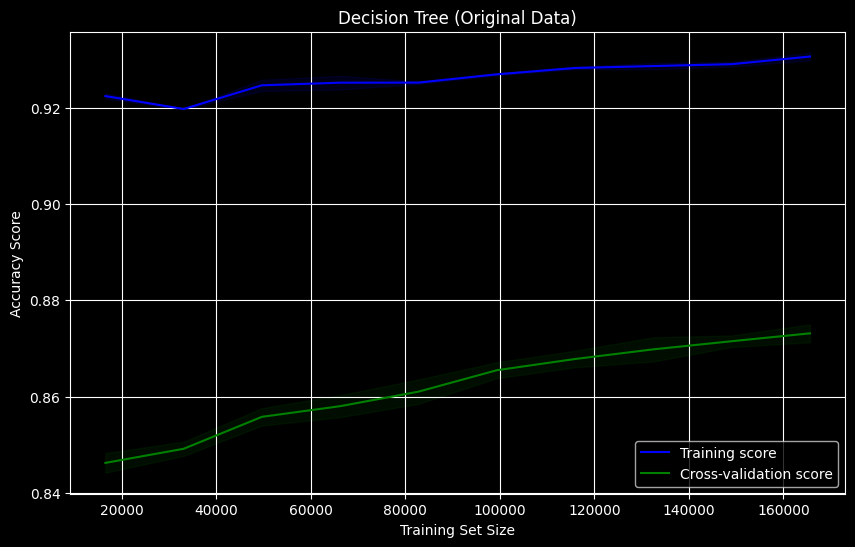

Learning Curve for SMOTE-Tomek Resampled Data


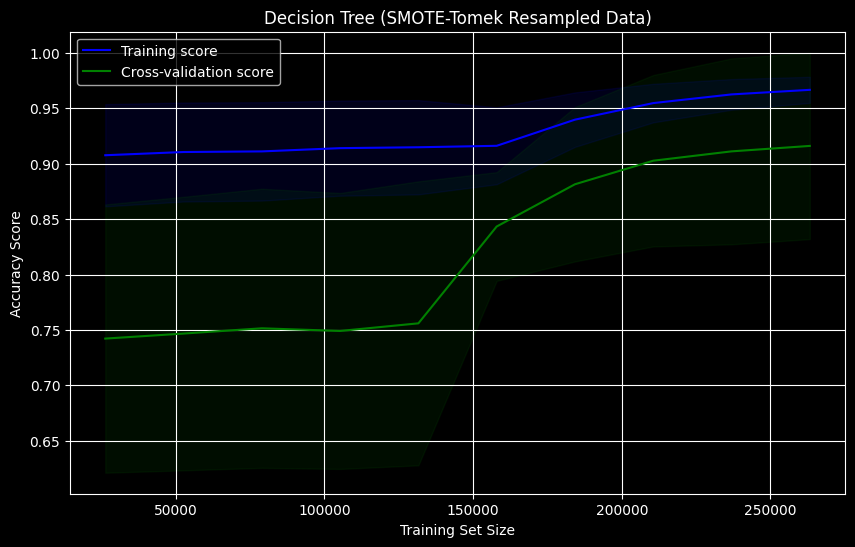

Learning Curve for Random Oversampling Resampled Data


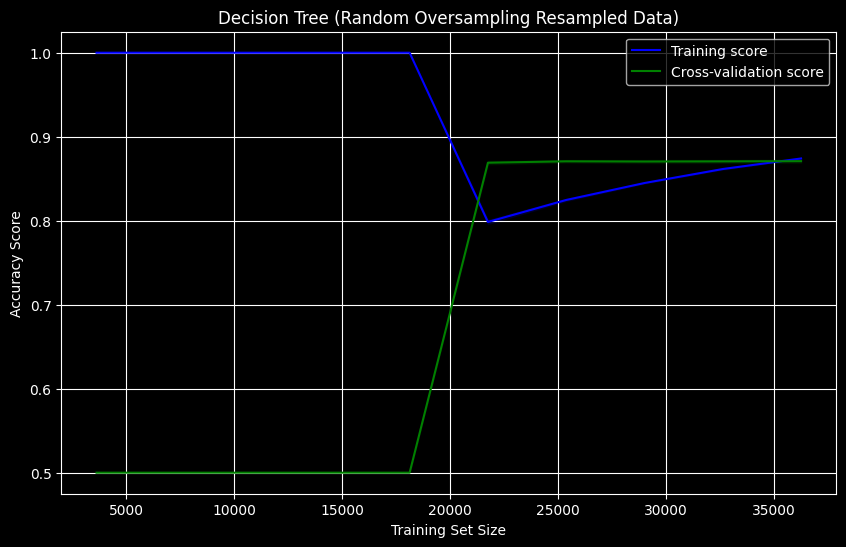

In [58]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X_train, y_train, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train, y_train, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score", color="blue")
    plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.1)

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

print("Learning Curve for Original Data")
plot_learning_curve(best_model_original, X_train_scaled_df, y_train_original, "Decision Tree (Original Data)")

# Plot learning curve for the resampled data with SMOTE-Tomek
print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(best_model_smote_tomek, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "Decision Tree (SMOTE-Tomek Resampled Data)")

# Plot learning curve for the resampled data with Random Oversampling
print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(best_model_random_oversampling, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "Decision Tree (Random Oversampling Resampled Data)")

* **Plotting Scores**

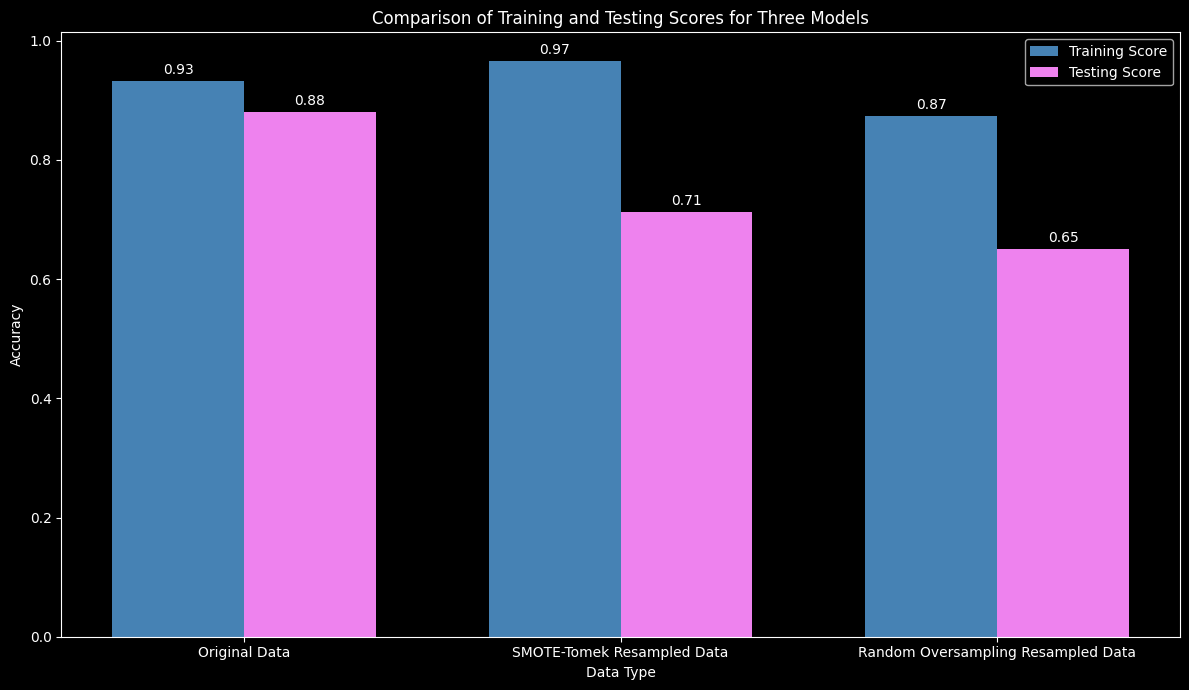

In [59]:
def plot_scores_comparison(best_model_original, best_model_smote_tomek, best_model_random_oversampling,
                           X_train_scaled, y_train_original, 
                           X_train_resampled_smote_tomek, y_train_resampled_smote_tomek, 
                           X_train_resampled_rus, y_train_resampled_rus,
                           X_test_scaled, y_test):
    
    # Compute training and testing scores for all three models
    train_score_original = best_model_original.score(X_train_scaled, y_train_original)
    test_score_original = best_model_original.score(X_test_scaled, y_test)
    
    train_score_smote_tomek = best_model_smote_tomek.score(X_train_resampled_smote_tomek, y_train_resampled_smote_tomek)
    test_score_smote_tomek = best_model_smote_tomek.score(X_test_scaled, y_test)
    
    train_score_random_oversampling = best_model_random_oversampling.score(X_train_resampled_rus, y_train_resampled_rus)
    test_score_random_oversampling = best_model_random_oversampling.score(X_test_scaled, y_test)
    
    # Labels and scores for plotting
    models = ['Original Data', 'SMOTE-Tomek Resampled Data', 'Random Oversampling Resampled Data']
    train_scores = [train_score_original, train_score_smote_tomek, train_score_random_oversampling]
    test_scores = [test_score_original, test_score_smote_tomek, test_score_random_oversampling]
    
    bar_width = 0.35
    index = np.arange(len(models))

    plt.figure(figsize=(12, 7))

    # Plotting bars for training and testing scores
    bars_train = plt.bar(index - bar_width / 2, train_scores, bar_width, label='Training Score', color='#4682b4')
    bars_test = plt.bar(index + bar_width / 2, test_scores, bar_width, label='Testing Score', color='#ee82ee')

    plt.xlabel('Data Type')
    plt.ylabel('Accuracy')
    plt.title('Comparison of Training and Testing Scores for Three Models')

    plt.xticks(index, models)
    plt.legend()

    # Annotating bars with their respective values
    for bar in bars_train:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points", ha='center', va='bottom')

    for bar in bars_test:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage with original, SMOTE-Tomek resampled, and random oversampling datasets
plot_scores_comparison(
    best_model_original, best_model_smote_tomek, best_model_random_oversampling,
    X_train_scaled_df, y_train_original,  # Original data
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC-AUC**

In [60]:
from sklearn.metrics import roc_auc_score


y_pred_prob_original = best_model_original.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = best_model_smote_tomek.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = best_model_random_oversampling.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.8435959945637901
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.6975325310484112
AUC-ROC Score for Random Oversampling Resampled Data: 0.8293889428540315


*****************************************************************************************************************************************************

# **_Logestic Regression_**

Evaluating on Original Data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Training score: 0.7779092625955747
Best Testing score: 0.7782961986228037
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 15000, 'class_weight': 'balanced', 'C': 2}
Confusion matrix:
 [[59971 19243]
 [  429  9088]]


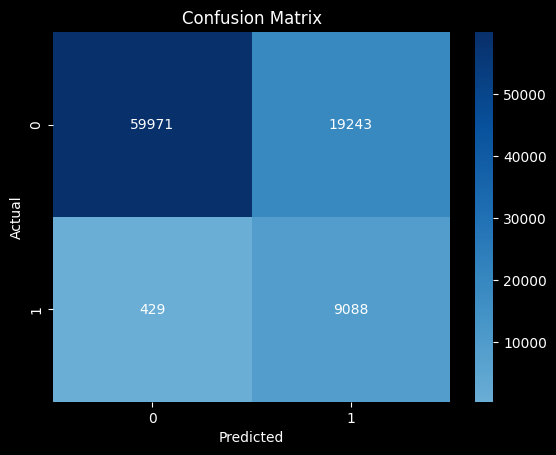

Evaluating on SMOTE-Tomek Resampled Data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Training score: 0.8662885764477756
Best Testing score: 0.6358995165162119
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 15000, 'class_weight': 'balanced', 'C': 2}
Confusion matrix:
 [[46907 32307]
 [    0  9517]]


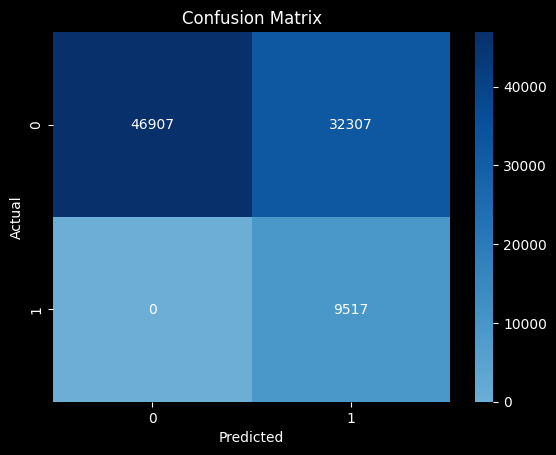

Evaluating on Random Oversampling Resampled Data
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Training score: 0.8537402964008468
Best Testing score: 0.6391114717516989
Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 15000, 'class_weight': 'balanced', 'C': 0.001}
Confusion matrix:
 [[47192 32022]
 [    0  9517]]


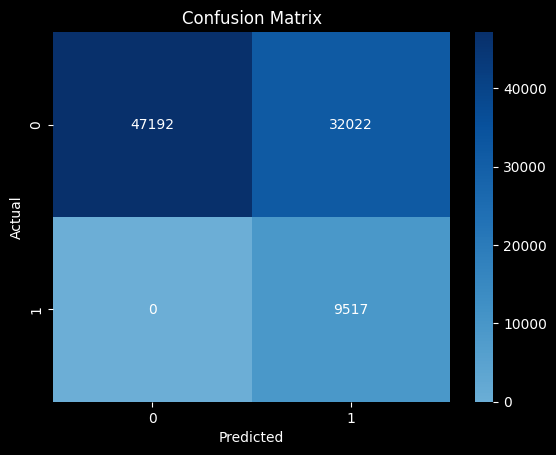

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     79214
           1       0.32      0.95      0.48      9517

    accuracy                           0.78     88731
   macro avg       0.66      0.86      0.67     88731
weighted avg       0.92      0.78      0.82     88731

Classification Report for SMOTE-Tomek Resampled Data:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74     79214
           1       0.23      1.00      0.37      9517

    accuracy                           0.64     88731
   macro avg       0.61      0.80      0.56     88731
weighted avg       0.92      0.64      0.70     88731

Classification Report for Random Oversampling Resampled Data:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75     79214
           1       0.23      1.00      0.37      9517

    accuracy          

In [61]:
def LogisticRegression_RandomSearch(X_train, y_train, X_test, y_test):
    
    param_dist = {
        'C': [0.001, 0.008, 1, 2, 3, 4],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [15000],
        'class_weight':['balanced']
    }

    random_search = RandomizedSearchCV(
        estimator=LogisticRegression(),
        param_distributions=param_dist,
        n_iter=50,  # Number of random combinations to try
        cv=5, 
        scoring='accuracy',
        n_jobs=-1, 
        verbose=3, 
        random_state=42
    )

    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    best_score = random_search.best_score_

    test_score = best_model.score(X_test, y_test)

    print('Best Training score:', best_model.score(X_train, y_train))
    print('Best Testing score:', test_score)
    print('Best Parameters:', best_params)

    y_pred = best_model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)

    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred, y_test, best_score, best_params, best_model

# Evaluate on Original Data
print("Evaluating on Original Data")
y_pred_original_LR, y_test_original_LR, best_score_original_LR, best_params_original_LR, best_model_original_LR = LogisticRegression_RandomSearch(X_train_scaled_df, y_train_original, X_test_scaled_df, y_test)

# Evaluate on Resampled Data with SMOTE-Tomek
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_LR, y_test_smote_tomek_LR, best_score_smote_tomek_LR, best_params_smote_tomek_LR, best_model_smote_tomek_LR = LogisticRegression_RandomSearch(X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test)

# Evaluate on Resampled Data with Random Oversampling
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_LR, y_test_random_oversampling_LR, best_score_random_oversampling_LR, best_params_random_oversampling_LR, best_model_random_oversampling_LR = LogisticRegression_RandomSearch(X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test)

# Print classification reports
print('Classification Report for Original Data:\n', classification_report(y_test_original_LR, y_pred_original_LR))
print('Classification Report for SMOTE-Tomek Resampled Data:\n', classification_report(y_test_smote_tomek_LR, y_pred_smote_tomek_LR))
print('Classification Report for Random Oversampling Resampled Data:\n', classification_report(y_test_random_oversampling_LR, y_pred_random_oversampling_LR))

* **Learning Curve**

Learning Curve for Original Data


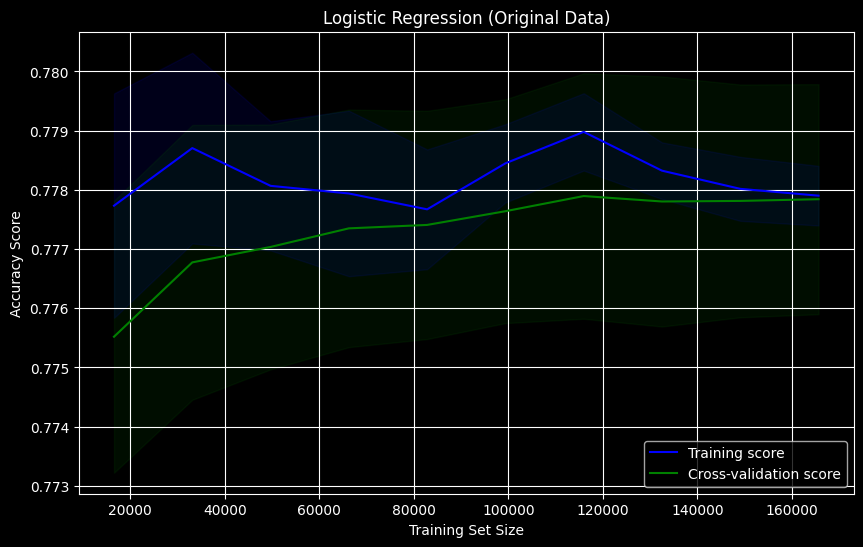

Learning Curve for SMOTE-Tomek Resampled Data


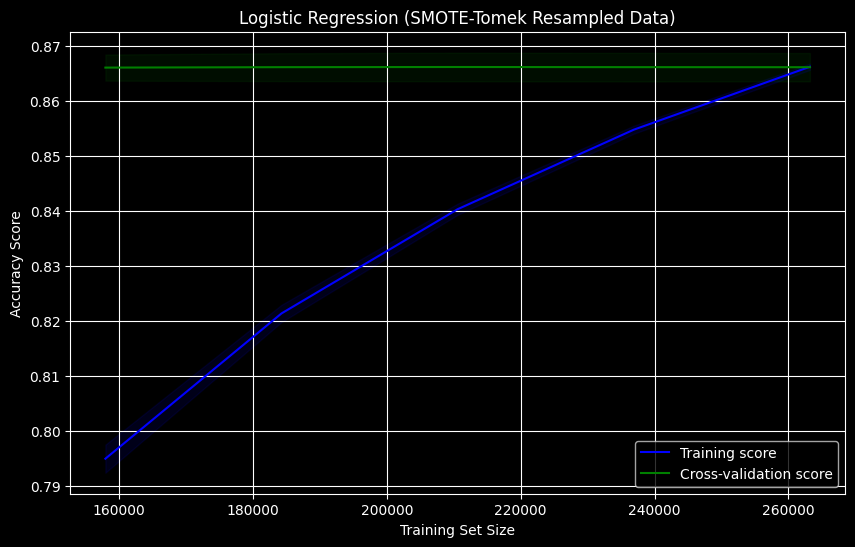

Learning Curve for Random Oversampling Resampled Data


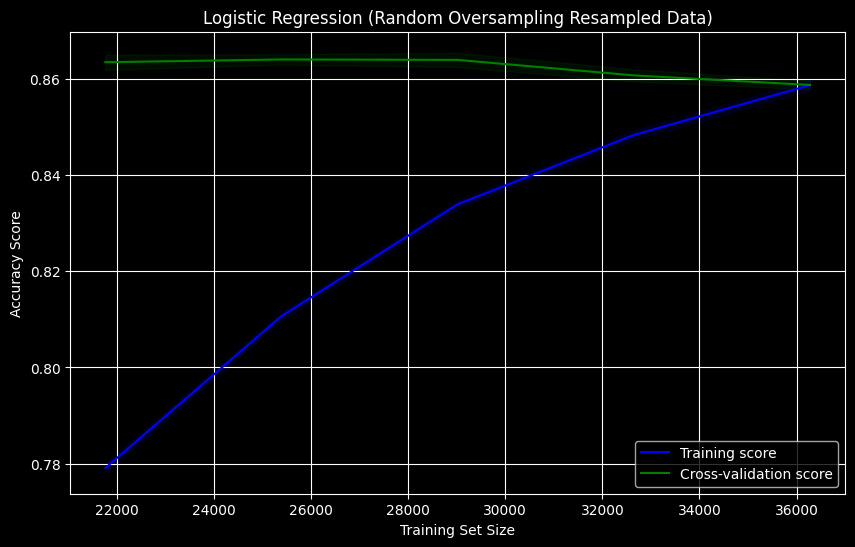

In [62]:
print("Learning Curve for Original Data")
plot_learning_curve(best_model_original_LR, X_train_scaled_df, y_train_original, "Logistic Regression (Original Data)")

print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(best_model_smote_tomek_LR, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "Logistic Regression (SMOTE-Tomek Resampled Data)")

print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(best_model_random_oversampling_LR, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "Logistic Regression (Random Oversampling Resampled Data)")

* **Plotting Scores**

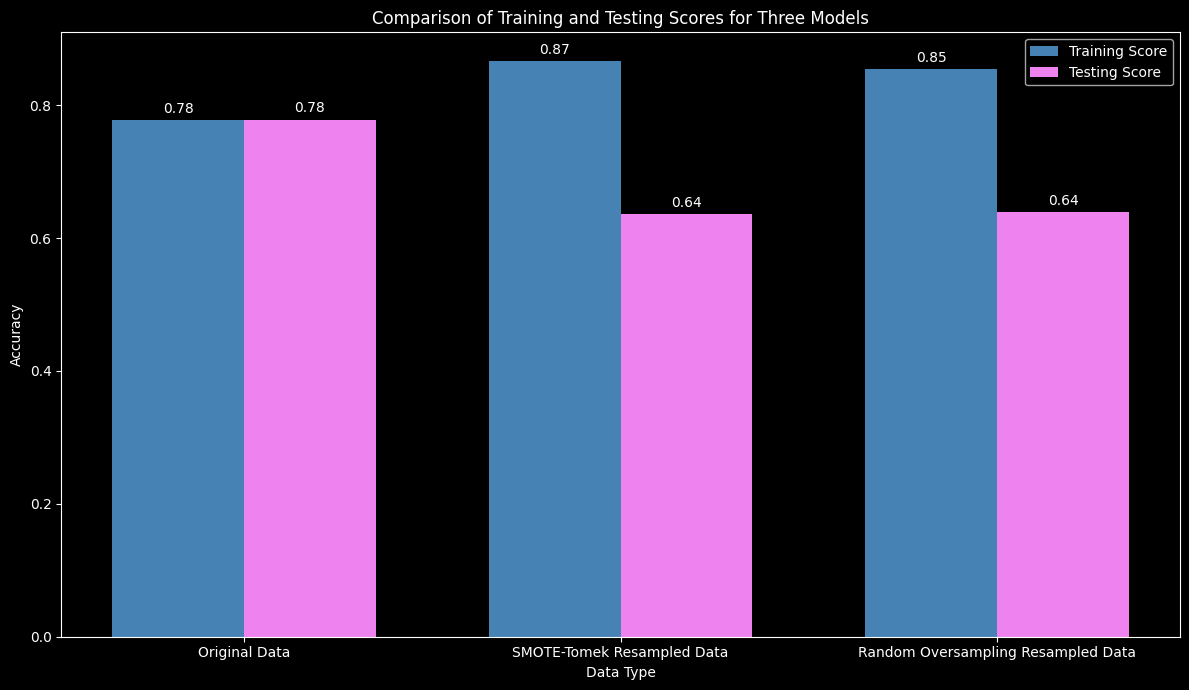

In [63]:
plot_scores_comparison(
    best_model_original_LR, best_model_smote_tomek_LR, best_model_random_oversampling_LR,
    X_train_scaled_df, y_train_original,  # Original data
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC SCORE**

In [64]:
y_pred_prob_original = best_model_original_LR.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = best_model_smote_tomek_LR.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = best_model_random_oversampling_LR.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.8910800347150375
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.8922266050114489
AUC-ROC Score for Random Oversampling Resampled Data: 0.8708512405796003


*****************************************************************************************************************************************************

In [65]:
!pip install optuna


In [66]:
import optuna

# **_XGBOOST_**

In [68]:
import optuna
from xgboost import XGBClassifier

Evaluating on Original Data
Training score: 0.8216840468128885
Testing score: 0.814923758325726
Confusion matrix:
 [[63103 16111]
 [  311  9206]]


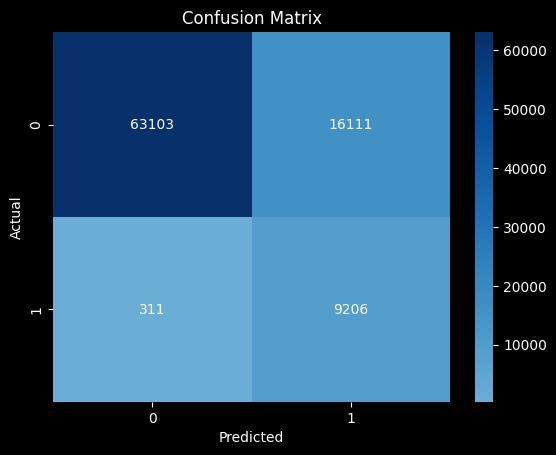

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.88     79214
           1       0.36      0.97      0.53      9517

    accuracy                           0.81     88731
   macro avg       0.68      0.88      0.71     88731
weighted avg       0.93      0.81      0.85     88731

Evaluating on SMOTE-Tomek Resampled Data
Training score: 0.8990401857626542
Testing score: 0.6893870237008486
Confusion matrix:
 [[54203 25011]
 [ 2550  6967]]


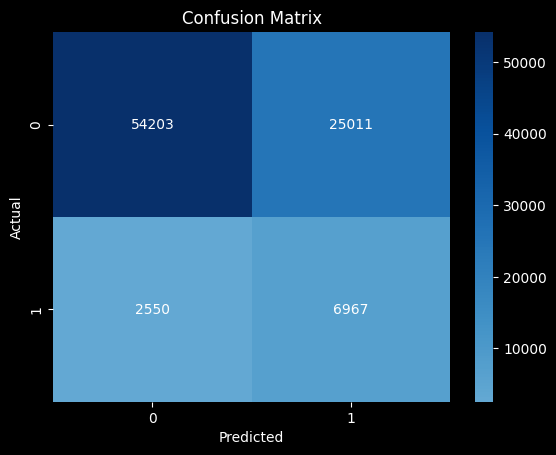

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     79214
           1       0.22      0.73      0.34      9517

    accuracy                           0.69     88731
   macro avg       0.59      0.71      0.57     88731
weighted avg       0.88      0.69      0.75     88731

Evaluating on Random Oversampling Resampled Data
Training score: 0.8979137261820748
Testing score: 0.7352785385040178
Confusion matrix:
 [[58275 20939]
 [ 2550  6967]]


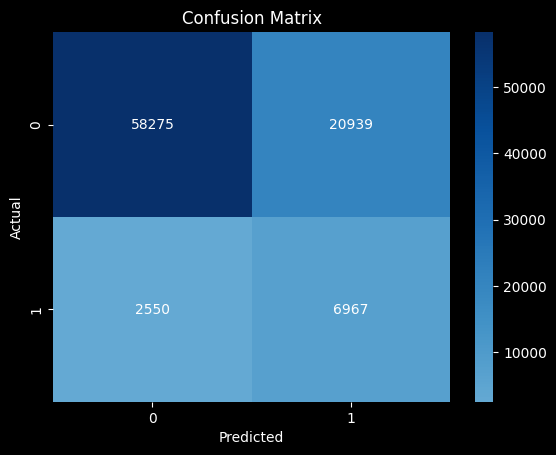

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83     79214
           1       0.25      0.73      0.37      9517

    accuracy                           0.74     88731
   macro avg       0.60      0.73      0.60     88731
weighted avg       0.88      0.74      0.78     88731



In [69]:
def XGBoost_Default(X_train, y_train, X_test, y_test):
    # Create and train the XGBoost model with default parameters
    ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    model = XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='mlogloss',random_state=42)
   
    model.fit(X_train, y_train)

    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training score:', train_score)
    print('Testing score:', test_score)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)
    
    # Visualize the confusion matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print('Classification Report:\n', classification_report(y_test, y_pred))

    return y_pred, y_test, model

# Evaluate on Original Data
print("Evaluating on Original Data")
y_pred_original_XGB, y_test_original_XGB, model_original_XGB = XGBoost_Default(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)

# Evaluate on SMOTE-Tomek Resampled Data
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_XGB, y_test_smote_tomek_XGB, model_smote_tomek_XGB = XGBoost_Default(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)

# Evaluate on Random Oversampling Resampled Data
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_XGB, y_test_random_oversampling_XGB, model_random_oversampling_XGB = XGBoost_Default(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)

* **Learning Curve**

Learning Curve for Original Data


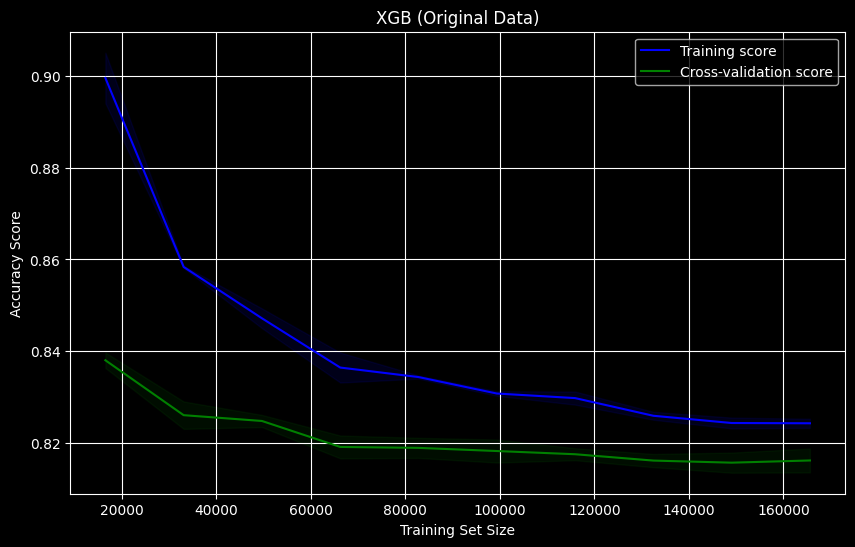

Learning Curve for SMOTE-Tomek Resampled Data


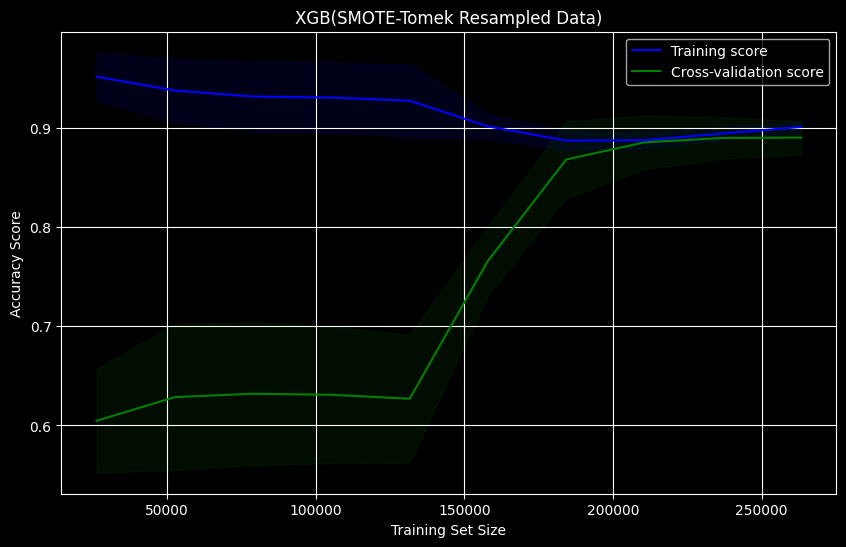

Learning Curve for Random Oversampling Resampled Data


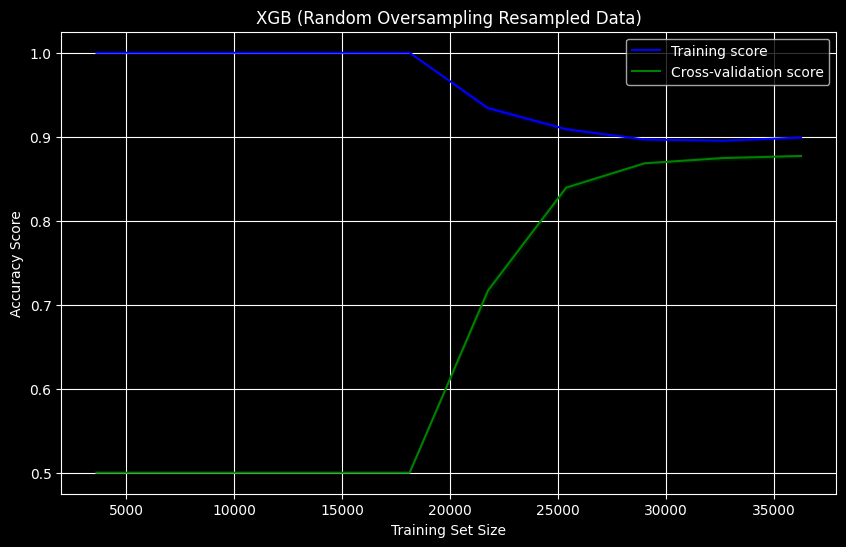

In [70]:

print("Learning Curve for Original Data")
plot_learning_curve(model_original_XGB, X_train_scaled_df, y_train_original, "XGB (Original Data)")


print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(model_smote_tomek_XGB , X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "XGB(SMOTE-Tomek Resampled Data)")
# 
print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(model_random_oversampling_XGB, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "XGB (Random Oversampling Resampled Data)")

* **Plotting Scores**

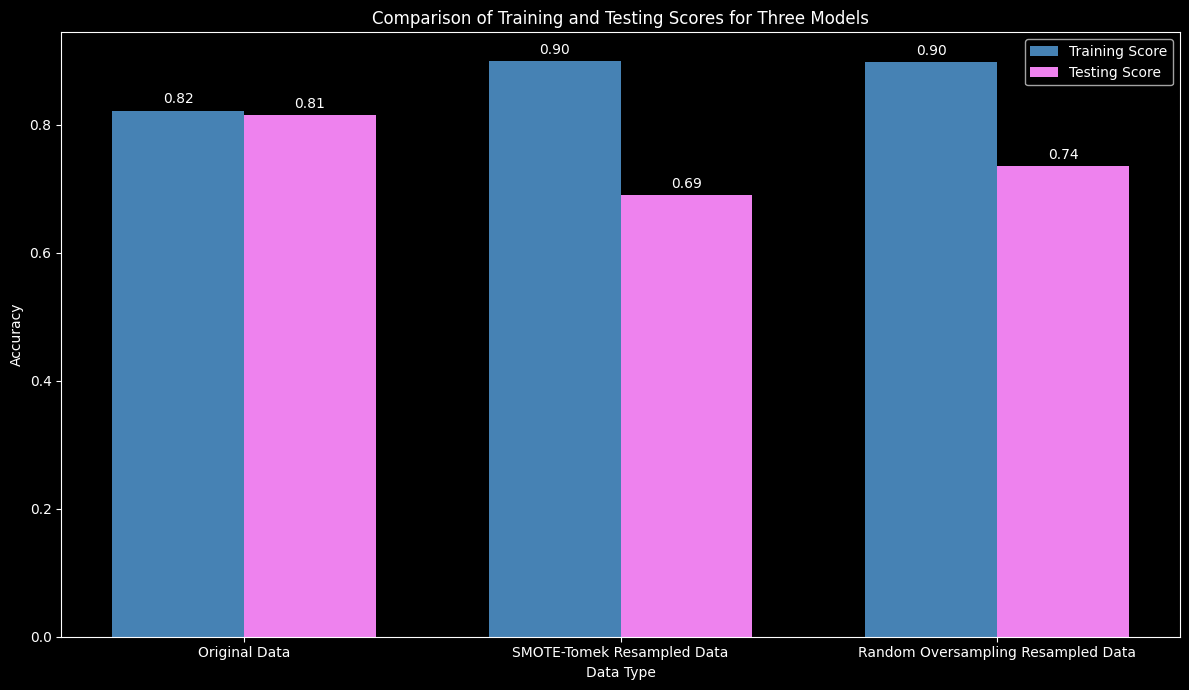

In [71]:
plot_scores_comparison(
    model_original_XGB, model_smote_tomek_XGB, model_random_oversampling_XGB,
    X_train_scaled_df, y_train_original,  # Original data
    
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC Score**

In [72]:
y_pred_prob_original = model_original_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = model_smote_tomek_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = model_random_oversampling_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.9345877889329596
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.7760163512998344
AUC-ROC Score for Random Oversampling Resampled Data: 0.8270301107403035


**_______________________________________________________________________________________________Take Braek_________________________________________________________________________________________________________________________________________________**

**_With hyperparameter_**

[I 2024-09-08 13:44:19,793] A new study created in memory with name: no-name-9b3bc88a-3650-445b-9425-057247a8297f


Evaluating on Original Data


[I 2024-09-08 13:44:22,825] Trial 0 finished with value: 0.8631256268947718 and parameters: {'booster': 'gbtree', 'learning_rate': 0.011182420376215314, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.7898525057704299, 'colsample_bytree': 0.9652389238798569, 'alpha': 0.049030044601494516, 'lambda': 0.32883641620159854, 'n_estimators': 443, 'scale_pos_weight': 2.3867426820989754}. Best is trial 0 with value: 0.8631256268947718.
[I 2024-09-08 13:44:24,187] Trial 1 finished with value: 0.8480801523706484 and parameters: {'booster': 'gblinear', 'learning_rate': 0.02797281428168167, 'max_depth': 7, 'min_child_weight': 10, 'subsample': 0.9849478178690516, 'colsample_bytree': 0.9035097779738746, 'alpha': 0.47657791997538046, 'lambda': 0.9251832543166069, 'n_estimators': 171, 'scale_pos_weight': 5.857376536934571}. Best is trial 0 with value: 0.8631256268947718.
[I 2024-09-08 13:44:26,326] Trial 2 finished with value: 0.8927432351714734 and parameters: {'booster': 'gblinear', 'learning_r

Best Parameters: {'booster': 'dart', 'learning_rate': 0.009456288294930096, 'max_depth': 9, 'min_child_weight': 10, 'subsample': 0.9949565864490544, 'colsample_bytree': 0.5938558820590365, 'alpha': 0.06797119567303367, 'lambda': 0.21801528299901496, 'n_estimators': 391, 'scale_pos_weight': 1.5758873262913906}
Best Training score: 0.9067992677637331
Best Testing score: 0.9040696036334539
Confusion matrix:
 [[77172  2042]
 [ 6470  3047]]


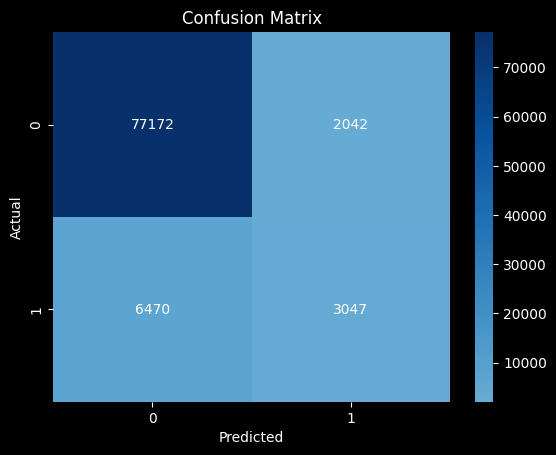

[I 2024-09-08 14:09:43,858] A new study created in memory with name: no-name-c4244cd8-1474-4180-ae4f-ad03e3ab50fd


Evaluating on SMOTE-Tomek Resampled Data


[I 2024-09-08 14:22:02,527] Trial 0 finished with value: 0.8927432351714734 and parameters: {'booster': 'dart', 'learning_rate': 0.001066513500825292, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.9547093270021133, 'colsample_bytree': 0.7340992903650951, 'alpha': 0.37061462614974405, 'lambda': 0.6431625559197492, 'n_estimators': 256, 'scale_pos_weight': 1.1414310244061268}. Best is trial 0 with value: 0.8927432351714734.
[I 2024-09-08 14:22:05,842] Trial 1 finished with value: 0.8391092177480249 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07837361511851154, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.9348343696316055, 'colsample_bytree': 0.6761341347005312, 'alpha': 0.00794211303012815, 'lambda': 0.30929725955614995, 'n_estimators': 425, 'scale_pos_weight': 6.587287333328263}. Best is trial 0 with value: 0.8927432351714734.
[I 2024-09-08 14:29:02,651] Trial 2 finished with value: 0.7975792000540961 and parameters: {'booster': 'dart', 'learning_rate': 0.0

Best Parameters: {'booster': 'dart', 'learning_rate': 0.001066513500825292, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.9547093270021133, 'colsample_bytree': 0.7340992903650951, 'alpha': 0.37061462614974405, 'lambda': 0.6431625559197492, 'n_estimators': 256, 'scale_pos_weight': 1.1414310244061268}
Best Training score: 0.882013968670788
Best Testing score: 0.6597919554608874
Confusion matrix:
 [[49503 29711]
 [  476  9041]]


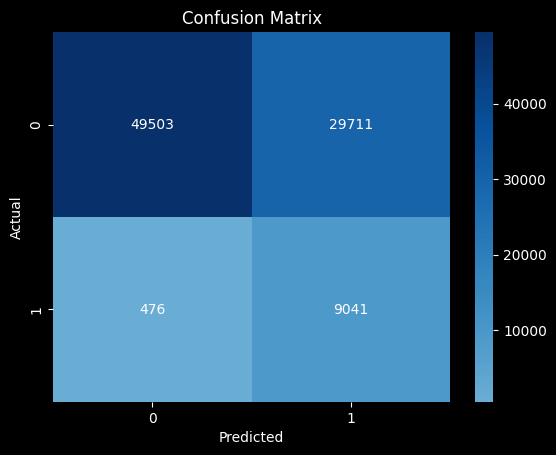

[I 2024-09-08 14:45:07,005] A new study created in memory with name: no-name-7533c0a5-9a91-40ba-9bc9-922ae8c72649


Evaluating on Random Oversampling Resampled Data


[I 2024-09-08 14:45:09,784] Trial 0 finished with value: 0.8999222368732461 and parameters: {'booster': 'gbtree', 'learning_rate': 0.9849898007956807, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.9854738427939511, 'colsample_bytree': 0.7367952637699873, 'alpha': 0.9167247209134572, 'lambda': 0.07200330116971965, 'n_estimators': 441, 'scale_pos_weight': 1.9903519887777077}. Best is trial 0 with value: 0.8999222368732461.
[I 2024-09-08 14:45:11,313] Trial 1 finished with value: 0.7985822316890376 and parameters: {'booster': 'gbtree', 'learning_rate': 0.008874888172439848, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.538708858778572, 'colsample_bytree': 0.8860187413577578, 'alpha': 0.7062082417187648, 'lambda': 0.16445887127107084, 'n_estimators': 148, 'scale_pos_weight': 5.261772372080538}. Best is trial 0 with value: 0.8999222368732461.
[I 2024-09-08 14:45:12,477] Trial 2 finished with value: 0.8927432351714734 and parameters: {'booster': 'gblinear', 'learning_rate': 0

Best Parameters: {'booster': 'dart', 'learning_rate': 0.5579129384245858, 'max_depth': 11, 'min_child_weight': 3, 'subsample': 0.7485319157866024, 'colsample_bytree': 0.8988445925630341, 'alpha': 0.8388637725305701, 'lambda': 0.31445275251689997, 'n_estimators': 81, 'scale_pos_weight': 1.8648577194932487}
Best Training score: 0.9470492237120678
Best Testing score: 0.7525667466837971
Confusion matrix:
 [[60688 18526]
 [ 3429  6088]]


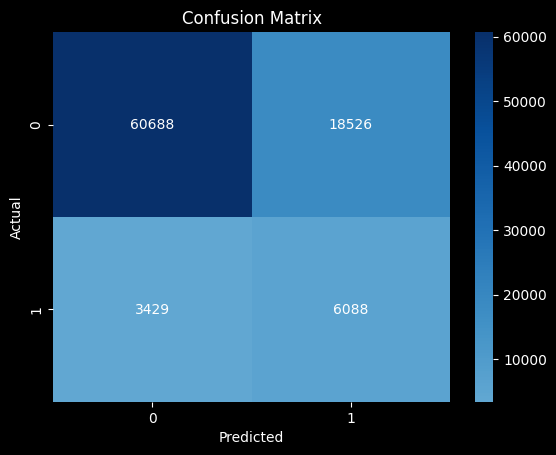

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     79214
           1       0.60      0.32      0.42      9517

    accuracy                           0.90     88731
   macro avg       0.76      0.65      0.68     88731
weighted avg       0.89      0.90      0.89     88731

Classification Report for SMOTE-Tomek Resampled Data:
               precision    recall  f1-score   support

           0       0.99      0.62      0.77     79214
           1       0.23      0.95      0.37      9517

    accuracy                           0.66     88731
   macro avg       0.61      0.79      0.57     88731
weighted avg       0.91      0.66      0.72     88731

Classification Report for Random Oversampling Resampled Data:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     79214
           1       0.25      0.64      0.36      9517

    accuracy          

In [91]:
import optuna
from xgboost import XGBClassifier



def objective(trial):
    # Calculate the class imbalance ratio for scale_pos_weight
    ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    
    # Define hyperparameters with the addition of scale_pos_weight
    param = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_uniform('alpha', 0, 1.0),
        'lambda': trial.suggest_uniform('lambda', 0, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, ratio),  # Add class weight balancing
        'random_state': 42
    }

    # Create the XGBClassifier with the suggested parameters
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss')

    # Fit the model
    model.fit(X_train, y_train)

    # Evaluate the model
    score = model.score(X_test, y_test)
    
    return score

def XGBoost_Optuna(X_train, y_train, X_test, y_test):
    # Create an Optuna study and optimize the objective function
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=7)

    # Get the best hyperparameters
    best_params = study.best_params
    print('Best Parameters:', best_params)
    
    # Create the best model with the optimized parameters
    best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
    best_model.fit(X_train, y_train)

    # Test the model
    test_score = best_model.score(X_test, y_test)
    print('Best Training score:', best_model.score(X_train, y_train))
    print('Best Testing score:', test_score)

    # Generate predictions
    y_pred = best_model.predict(X_test)
    
    # Confusion Matrix
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)
    
    # Visualize the confusion matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred, y_test, best_params, best_model

# Evaluate on Original Data
print("Evaluating on Original Data")
y_pred_original_XGB, y_test_original_XGB, best_params_original_XGB, best_model_original_XGB = XGBoost_Optuna(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)

# Evaluate on SMOTE-Tomek Resampled Data
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_XGB, y_test_smote_tomek_XGB, best_params_smote_tomek_XGB, best_model_smote_tomek_XGB = XGBoost_Optuna(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)

# Evaluate on Random Oversampling Resampled Data
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_XGB, y_test_random_oversampling_XGB, best_params_random_oversampling_XGB, best_model_random_oversampling_XGB = XGBoost_Optuna(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)

# Print classification reports
print('Classification Report for Original Data:\n', classification_report(y_test_original_XGB, y_pred_original_XGB))
print('Classification Report for SMOTE-Tomek Resampled Data:\n', classification_report(y_test_smote_tomek_XGB, y_pred_smote_tomek_XGB))
print('Classification Report for Random Oversampling Resampled Data:\n', classification_report(y_test_random_oversampling_XGB, y_pred_random_oversampling_XGB))



* **Learning Curve**

In [92]:

print("Learning Curve for Original Data")
plot_learning_curve(best_model_original_XGB, X_train_scaled_df, y_train_original, "XGB (Original Data)")
print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(best_model_smote_tomek_XGB , X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "XGB(SMOTE-Tomek Resampled Data)")
# 
print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(best_model_random_oversampling_XGB, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "XGB (Random Oversampling Resampled Data)")

Learning Curve for Original Data


* **Plotting Scores**

In [ ]:
plot_scores_comparison(
    best_model_original_XGB, best_model_smote_tomek_XGB, best_model_random_oversampling_XGB,
    X_train_scaled_df, y_train_original,  # Original data
    
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC Scores**

In [ ]:
y_pred_prob_original = best_model_original_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = best_model_smote_tomek_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = best_model_random_oversampling_XGB.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

*****************************************************************************************************************************************************

# **_Random Forest_**

Evaluating on Original Data
Training score: 0.9999903398909373
Testing score: 0.9280860127802009
Confusion matrix:
 [[77085  2129]
 [ 4252  5265]]


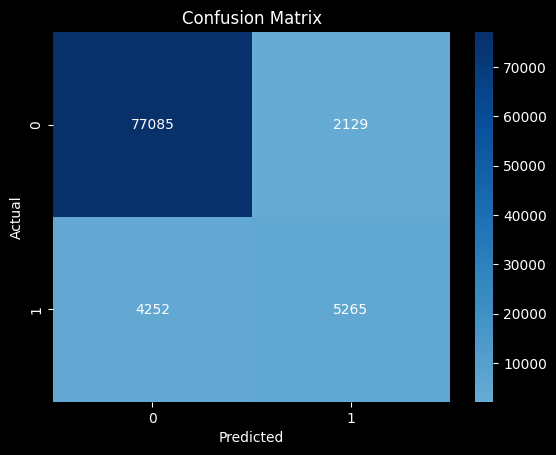

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     79214
           1       0.71      0.55      0.62      9517

    accuracy                           0.93     88731
   macro avg       0.83      0.76      0.79     88731
weighted avg       0.92      0.93      0.92     88731

Evaluating on SMOTE-Tomek Resampled Data
Training score: 0.9999969606895588
Testing score: 0.7502563929179205
Confusion matrix:
 [[62670 16544]
 [ 5616  3901]]


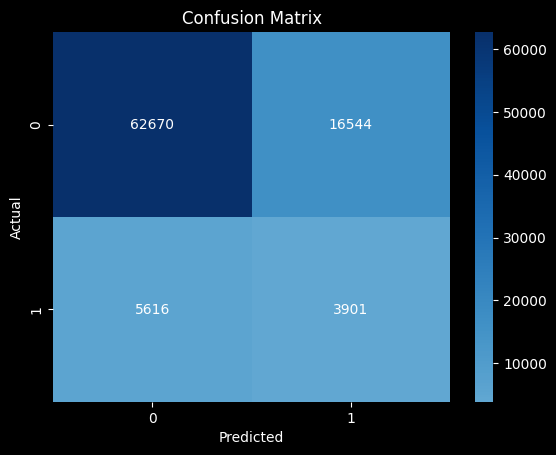

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     79214
           1       0.19      0.41      0.26      9517

    accuracy                           0.75     88731
   macro avg       0.55      0.60      0.56     88731
weighted avg       0.84      0.75      0.79     88731

Evaluating on Random Oversampling Resampled Data
Training score: 0.999977946365561
Testing score: 0.6805400592802966
Confusion matrix:
 [[51655 27559]
 [  787  8730]]


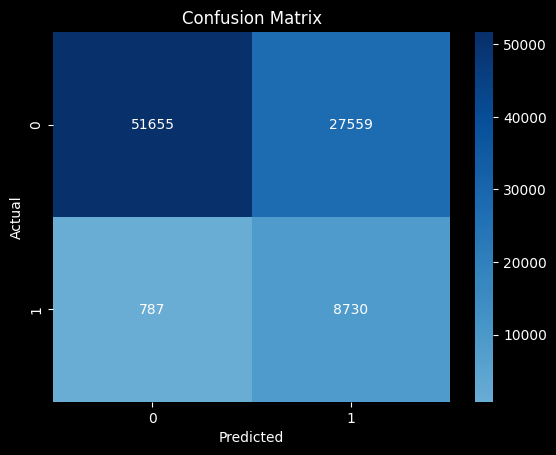

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     79214
           1       0.24      0.92      0.38      9517

    accuracy                           0.68     88731
   macro avg       0.61      0.78      0.58     88731
weighted avg       0.91      0.68      0.74     88731



In [74]:

def RandomForest_Default(X_train, y_train, X_test, y_test):
    # Create and train the Random Forest model with default parameters
    model = RandomForestClassifier(class_weight='balanced',random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training score:', train_score)
    print('Testing score:', test_score)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)
    
    # Visualize the confusion matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print('Classification Report:\n', classification_report(y_test, y_pred))

    return y_pred, y_test, model

print("Evaluating on Original Data")
y_pred_original_RF, y_test_original_RF, model_original_RF = RandomForest_Default(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)


print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_RF, y_test_smote_tomek_RF, model_smote_tomek_RF = RandomForest_Default(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)

print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_RF, y_test_random_oversampling_RF, model_random_oversampling_RF = RandomForest_Default(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)

* **Learning Curves**

Learning Curve for Original Data


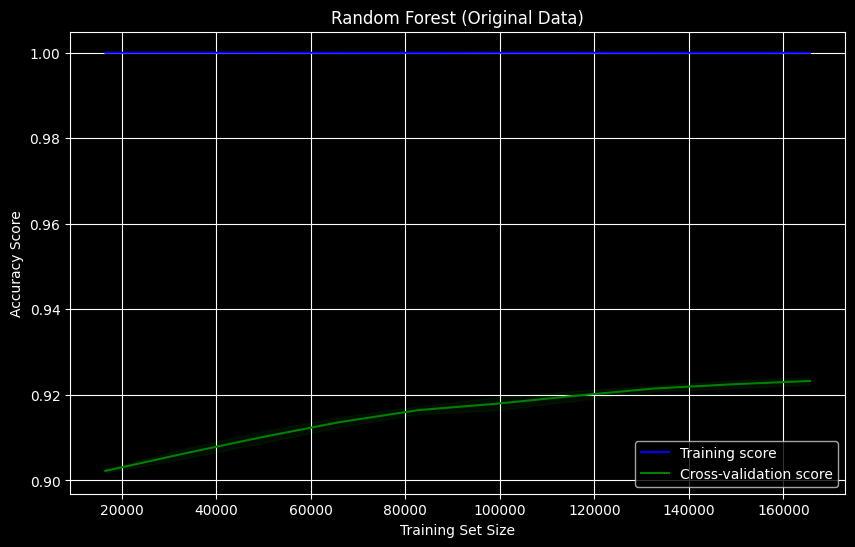

Learning Curve for SMOTE-Tomek Resampled Data


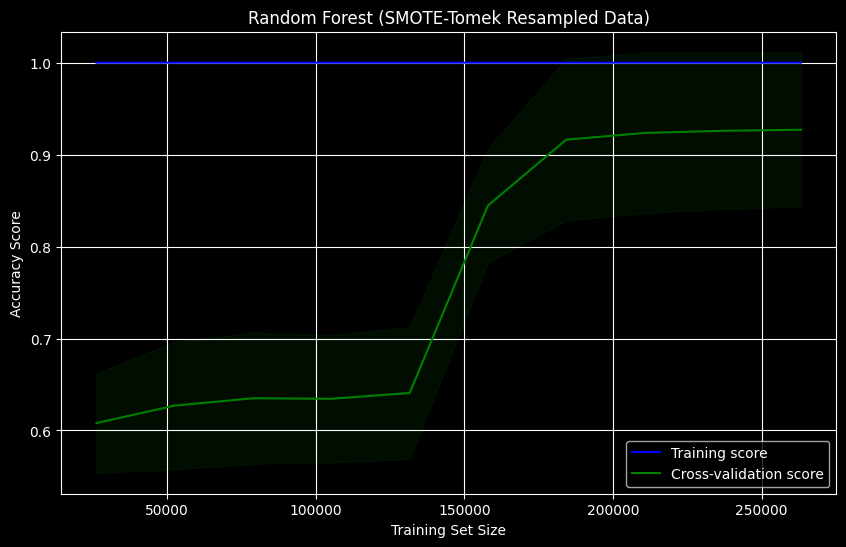

Learning Curve for Random Oversampling Resampled Data


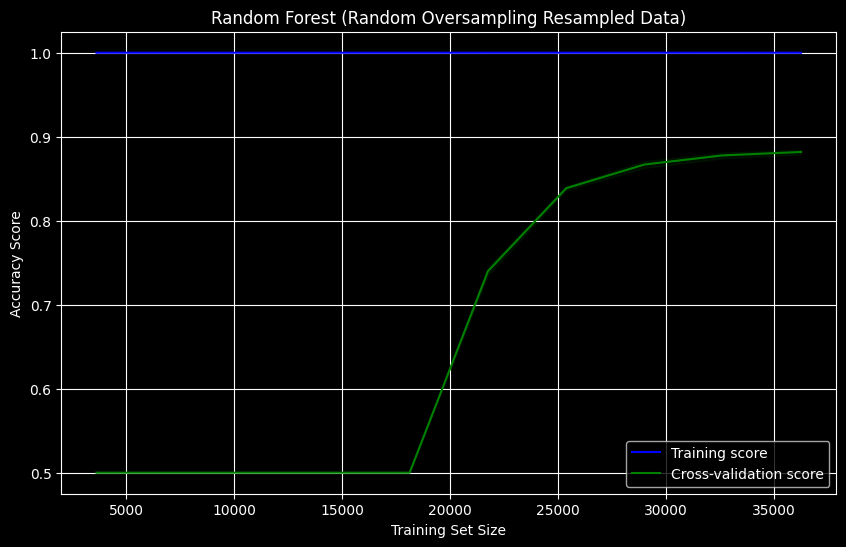

In [75]:
print("Learning Curve for Original Data")
plot_learning_curve(model_original_RF, X_train_scaled_df, y_train_original, "Random Forest (Original Data)")

print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(model_smote_tomek_RF, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "Random Forest (SMOTE-Tomek Resampled Data)")

print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(model_random_oversampling_RF, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "Random Forest (Random Oversampling Resampled Data)")

* **Plotting Scores**

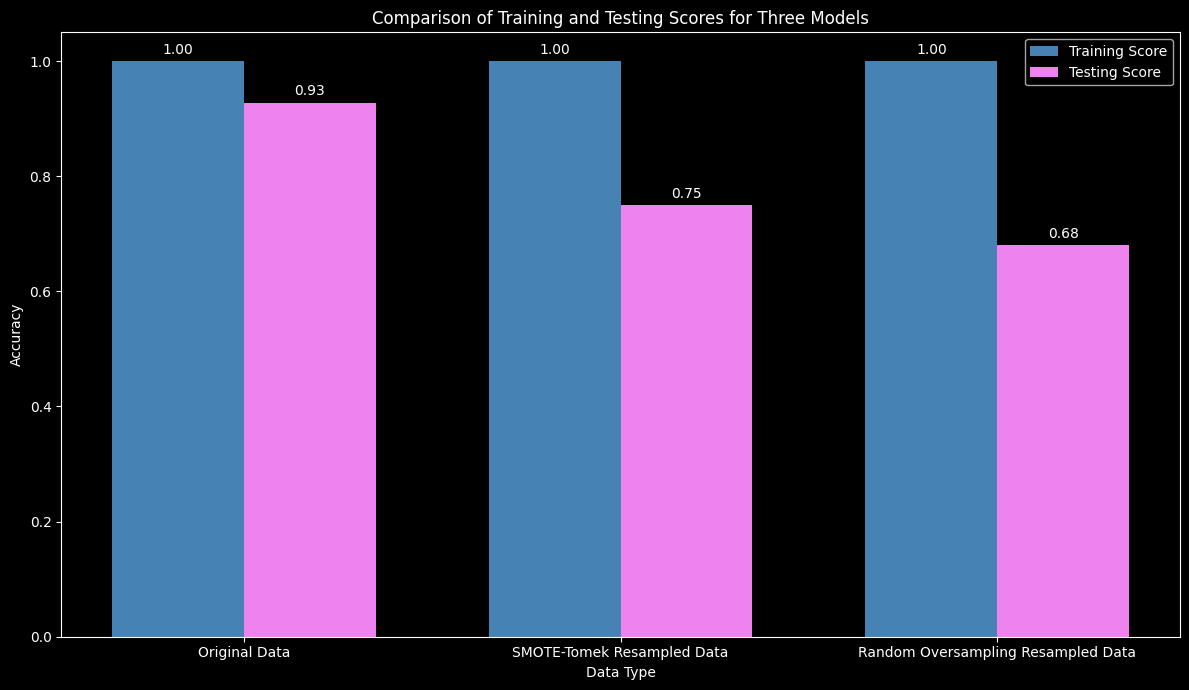

In [76]:
plot_scores_comparison(
    model_original_RF, model_smote_tomek_RF, model_random_oversampling_RF,
    X_train_scaled_df, y_train_original,  # Original data
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC Scores**

In [77]:
y_pred_prob_original = model_original_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = model_smote_tomek_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = model_random_oversampling_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.9555620170497295
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.7490911665928295
AUC-ROC Score for Random Oversampling Resampled Data: 0.8242481971638025


**____________________________________________________________________Take Break______________________________________________________________________________________________________________**

* **With HyperParameter**

[I 2024-09-08 12:02:57,105] A new study created in memory with name: no-name-f99cf9cc-92bd-4a87-bf1c-c02010ed4eb5


Evaluating on Original Data


[I 2024-09-08 12:03:22,074] Trial 0 finished with value: 0.7833564368709921 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7833564368709921.
[I 2024-09-08 12:04:24,810] Trial 1 finished with value: 0.7857118707103492 and parameters: {'n_estimators': 350, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 19, 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7857118707103492.
[I 2024-09-08 12:05:16,010] Trial 2 finished with value: 0.9033934025312461 and parameters: {'n_estimators': 350, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': None}. Best is trial 2 with value: 0.9033934025312461.
[I 2024-09-08 12:06:11,295] Trial 3 finished with value: 0.8103143208123429 and parameters: {'n_estimators': 10

Best Parameters: {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False, 'class_weight': None}
Best Training score: 0.929935228968735
Best Testing score: 0.9133110186969605
Confusion matrix:
 [[77592  1622]
 [ 6070  3447]]


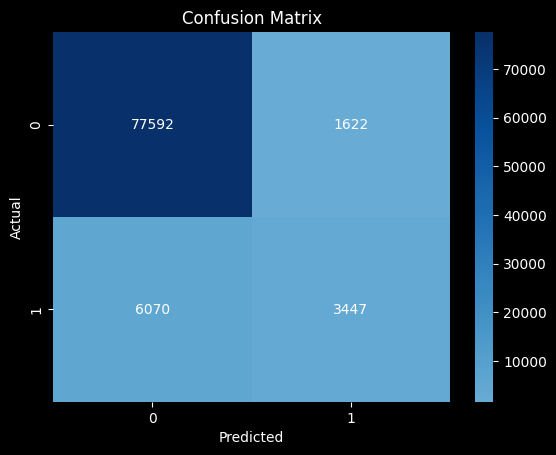

[I 2024-09-08 12:32:12,476] A new study created in memory with name: no-name-7ec79224-8406-4cdd-9a46-7b7b4d93ec7b


Evaluating on SMOTE-Tomek Resampled Data


[I 2024-09-08 12:36:16,720] Trial 0 finished with value: 0.800779885271213 and parameters: {'n_estimators': 250, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.800779885271213.
[I 2024-09-08 12:37:17,859] Trial 1 finished with value: 0.7918427607037 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.800779885271213.
[I 2024-09-08 12:38:34,049] Trial 2 finished with value: 0.782916906154557 and parameters: {'n_estimators': 450, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.800779885271213.
[I 2024-09-08 12:39:41,655] Trial 3 finished with value: 0.9071350486301293 and parameters: {'n_estimators': 1

Best Parameters: {'n_estimators': 150, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_features': None, 'bootstrap': True, 'class_weight': None}
Best Training score: 0.9561640255058932
Best Testing score: 0.6898378244356538
Confusion matrix:
 [[54080 25134]
 [ 2387  7130]]


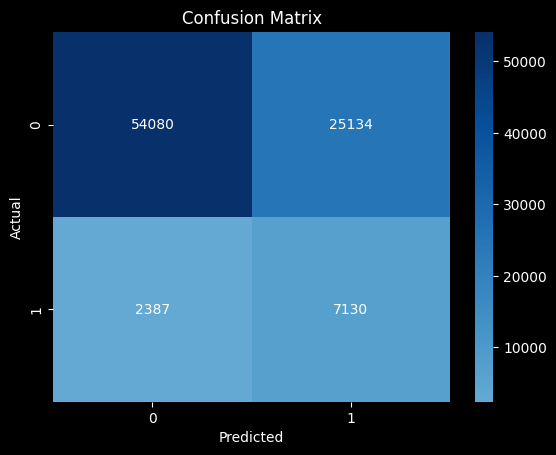

[I 2024-09-08 12:43:16,069] A new study created in memory with name: no-name-c12eb713-282f-4f4e-af1a-c92777d0a1e2


Evaluating on Random Oversampling Resampled Data


[I 2024-09-08 12:44:48,616] Trial 0 finished with value: 0.9032807023475449 and parameters: {'n_estimators': 300, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 12, 'max_features': None, 'bootstrap': True, 'class_weight': None}. Best is trial 0 with value: 0.9032807023475449.
[I 2024-09-08 12:45:45,114] Trial 1 finished with value: 0.8265318772469599 and parameters: {'n_estimators': 150, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 12, 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9032807023475449.
[I 2024-09-08 12:50:07,877] Trial 2 finished with value: 0.7951674161228883 and parameters: {'n_estimators': 450, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9032807023475449.
[I 2024-09-08 12:52:16,950] Trial 3 finished with value: 0.9118233762721033 and parameters: {'n_estimators': 25

Best Parameters: {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 16, 'max_features': None, 'bootstrap': True, 'class_weight': None}
Best Training score: 0.9997794636556104
Best Testing score: 0.7465936369476283
Confusion matrix:
 [[59768 19446]
 [ 3039  6478]]


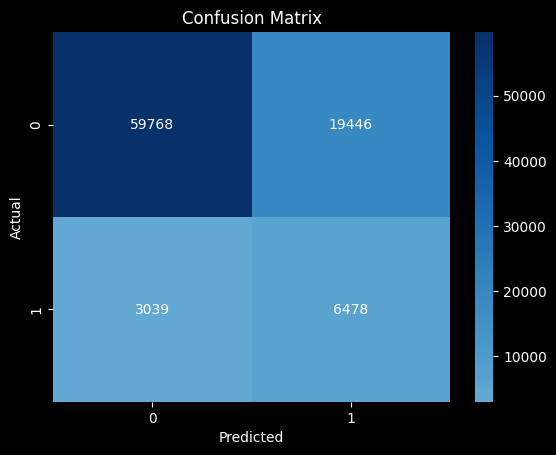

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     79214
           1       0.68      0.36      0.47      9517

    accuracy                           0.91     88731
   macro avg       0.80      0.67      0.71     88731
weighted avg       0.90      0.91      0.90     88731

Classification Report for SMOTE-Tomek Resampled Data:
               precision    recall  f1-score   support

           0       0.96      0.68      0.80     79214
           1       0.22      0.75      0.34      9517

    accuracy                           0.69     88731
   macro avg       0.59      0.72      0.57     88731
weighted avg       0.88      0.69      0.75     88731

Classification Report for Random Oversampling Resampled Data:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84     79214
           1       0.25      0.68      0.37      9517

    accuracy          

In [78]:
def objective(trial):
    # Define hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }

    # Create and train the model
    rf = RandomForestClassifier(random_state=42, **param)
    rf.fit(X_train, y_train)

    # Evaluate the model
    score = rf.score(X_test, y_test)
    return score

def RandomForest_Optuna(X_train, y_train, X_test, y_test):
    # Create an Optuna study object
    study = optuna.create_study(direction='maximize')
    
    # Optimize the hyperparameters
    study.optimize(objective, n_trials=5)

    # Get the best parameters and model
    best_params = study.best_params
    best_model = RandomForestClassifier(random_state=42, **best_params)
    best_model.fit(X_train, y_train)
    
    # Evaluate the model
    test_score = best_model.score(X_test, y_test)
    print('Best Training score:', best_model.score(X_train, y_train))
    print('Best Testing score:', test_score)
    print('Best Parameters:', best_params)

    # Predictions and Confusion Matrix
    y_pred = best_model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)

    # Plot Confusion Matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred, y_test, best_params, best_model

# Evaluate on Original Data
print("Evaluating on Original Data")
y_pred_original_RF, y_test_original_RF, best_params_original_RF, best_model_original_RF = XGBoost_Optuna(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)

# Evaluate on SMOTE-Tomek Resampled Data
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_RF, y_test_smote_tomek_RF, best_params_smote_tomek_RF, best_model_smote_tomek_RF = XGBoost_Optuna(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)

# Evaluate on Random Oversampling Resampled Data
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_RF, y_test_random_oversampling_RF, best_params_random_oversampling_RF, best_model_random_oversampling_RF = XGBoost_Optuna(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)

# Print classification reports
print('Classification Report for Original Data:\n', classification_report(y_test_original_RF, y_pred_original_RF))
print('Classification Report for SMOTE-Tomek Resampled Data:\n', classification_report(y_test_smote_tomek_RF, y_pred_smote_tomek_RF))
print('Classification Report for Random Oversampling Resampled Data:\n', classification_report(y_test_random_oversampling_RF, y_pred_random_oversampling_RF))



* **Learning Curves**

In [79]:
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost.core')

Learning Curve for Original Data


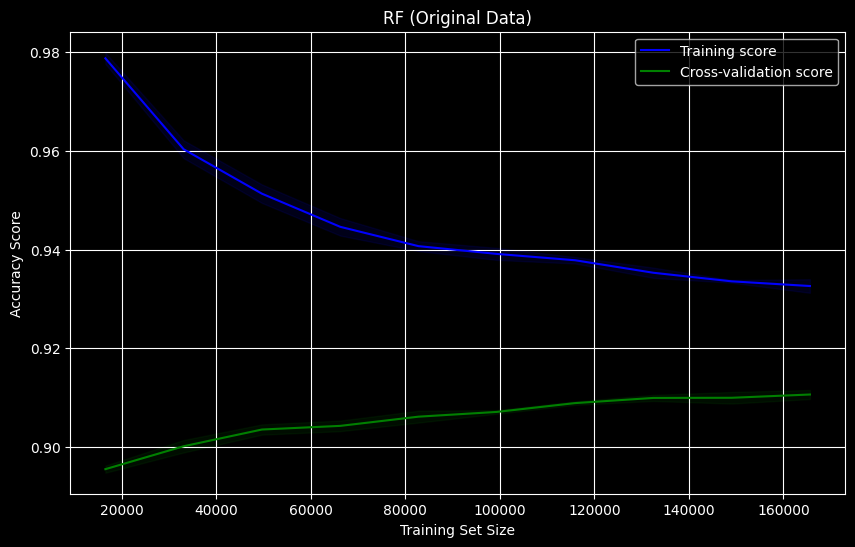

Learning Curve for SMOTE-Tomek Resampled Data


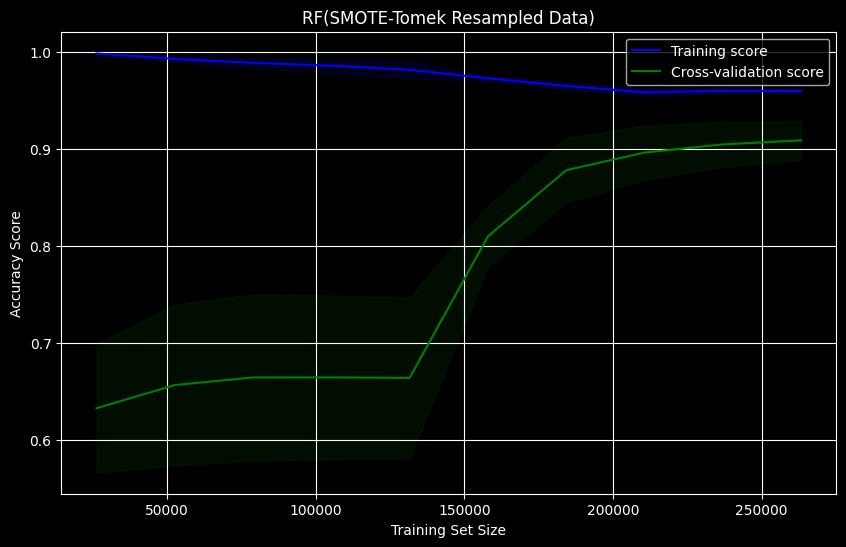

Learning Curve for Random Oversampling Resampled Data


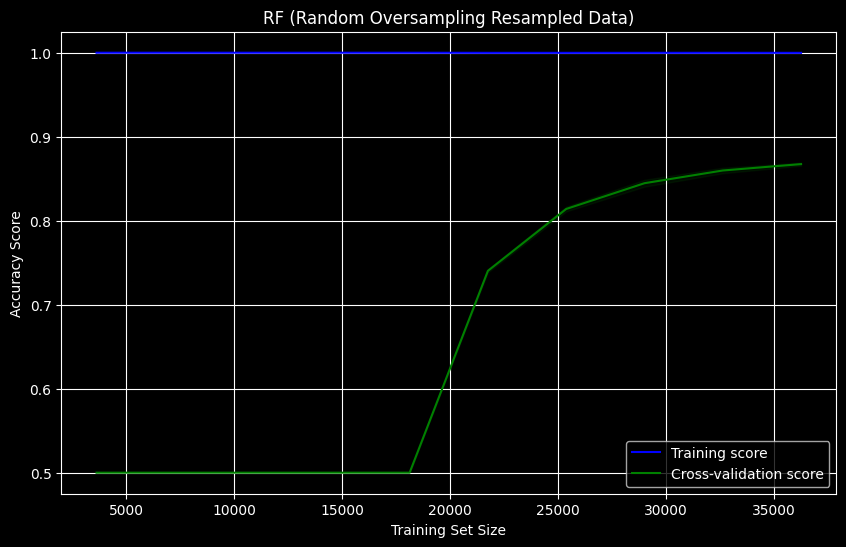

In [80]:
print("Learning Curve for Original Data")
plot_learning_curve(best_model_original_RF, X_train_scaled_df, y_train_original, "RF (Original Data)")
print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(best_model_smote_tomek_RF, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "RF(SMOTE-Tomek Resampled Data)")
# 
print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(best_model_random_oversampling_RF, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "RF (Random Oversampling Resampled Data)")

* **Plotting Scores**

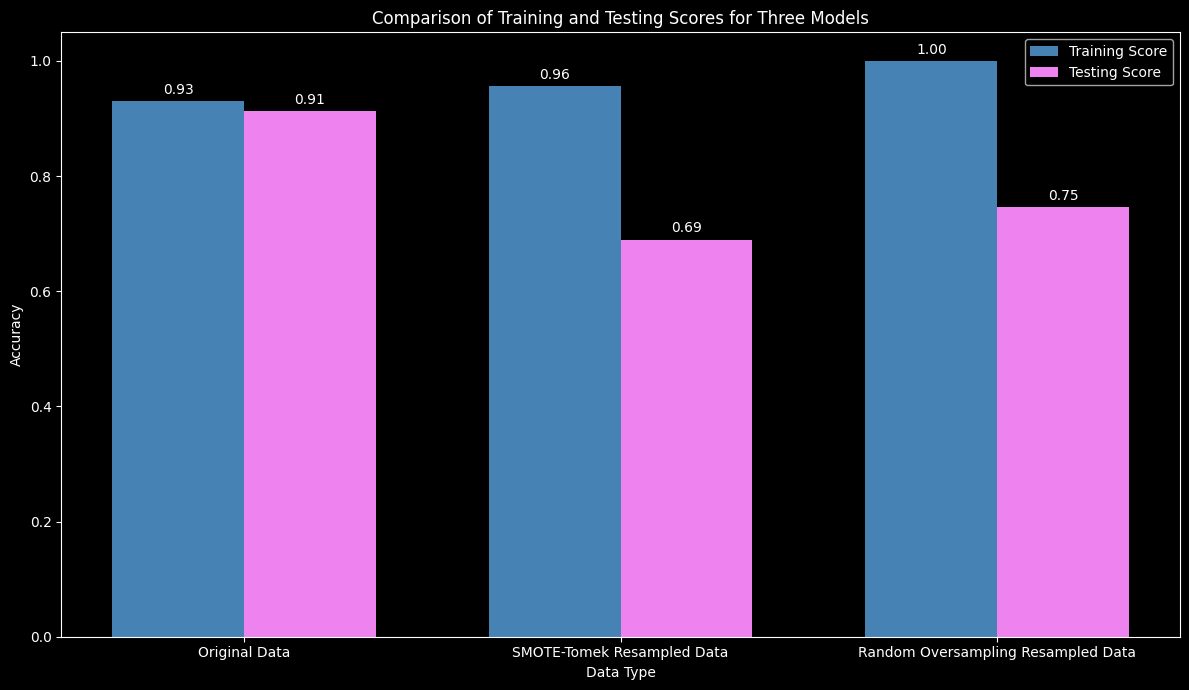

In [81]:
plot_scores_comparison(
    best_model_original_RF, best_model_smote_tomek_RF, best_model_random_oversampling_RF,
    X_train_scaled_df, y_train_original,  # Original data
    
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC Scores**

In [82]:
y_pred_prob_original = best_model_original_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = best_model_smote_tomek_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = best_model_random_oversampling_RF.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.9393154547569834
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.776864927740627
AUC-ROC Score for Random Oversampling Resampled Data: 0.8241824413090196


*****************************************************************************************************************************************************

# **_KNN_**

Evaluating on Original Data
Training score: 0.9323164458526737
Testing score: 0.9028411716311098
Confusion matrix:
 [[75931  3283]
 [ 5338  4179]]


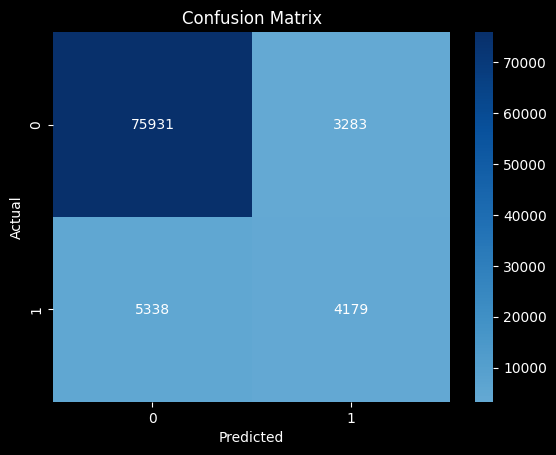

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     79214
           1       0.56      0.44      0.49      9517

    accuracy                           0.90     88731
   macro avg       0.75      0.70      0.72     88731
weighted avg       0.89      0.90      0.90     88731

Evaluating on SMOTE-Tomek Resampled Data
Training score: 0.9159174766428992
Testing score: 0.7301844902007191
Confusion matrix:
 [[58038 21176]
 [ 2765  6752]]


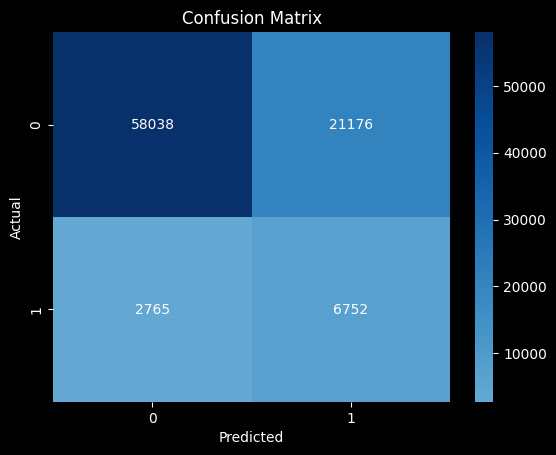

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     79214
           1       0.24      0.71      0.36      9517

    accuracy                           0.73     88731
   macro avg       0.60      0.72      0.59     88731
weighted avg       0.88      0.73      0.78     88731

Evaluating on Random Oversampling Resampled Data
Training score: 0.893326570218772
Testing score: 0.6743077391216148
Confusion matrix:
 [[51411 27803]
 [ 1096  8421]]


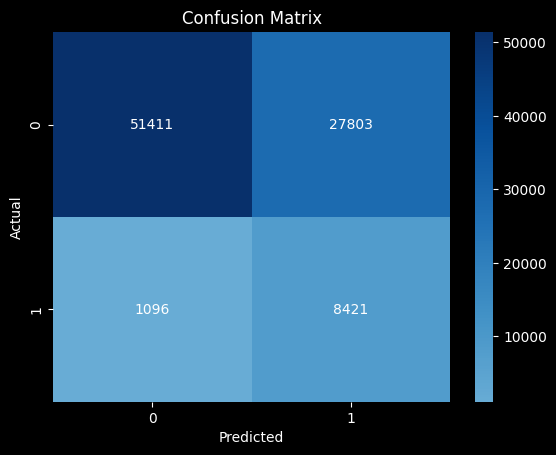

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     79214
           1       0.23      0.88      0.37      9517

    accuracy                           0.67     88731
   macro avg       0.61      0.77      0.57     88731
weighted avg       0.90      0.67      0.74     88731



In [83]:
def KNN_Default(X_train, y_train, X_test, y_test, n_neighbors=5):
    # Create and train the KNN model with default parameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    # Evaluate the model
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training score:', train_score)
    print('Testing score:', test_score)

    # Generate predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)
    
    # Visualize the confusion matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print('Classification Report:\n', classification_report(y_test, y_pred))

    return y_pred, y_test, model

# Evaluate on Original Data
print("Evaluating on Original Data")
y_pred_original_KNN, y_test_original_KNN, model_original_KNN = KNN_Default(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)

# Evaluate on SMOTE-Tomek Resampled Data
print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_KNN, y_test_smote_tomek_KNN, model_smote_tomek_KNN = KNN_Default(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)

# Evaluate on Random Oversampling Resampled Data
print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_KNN, y_test_random_oversampling_KNN, model_random_oversampling_KNN = KNN_Default(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)

* **Learning Curves**

Learning Curve for Original Data


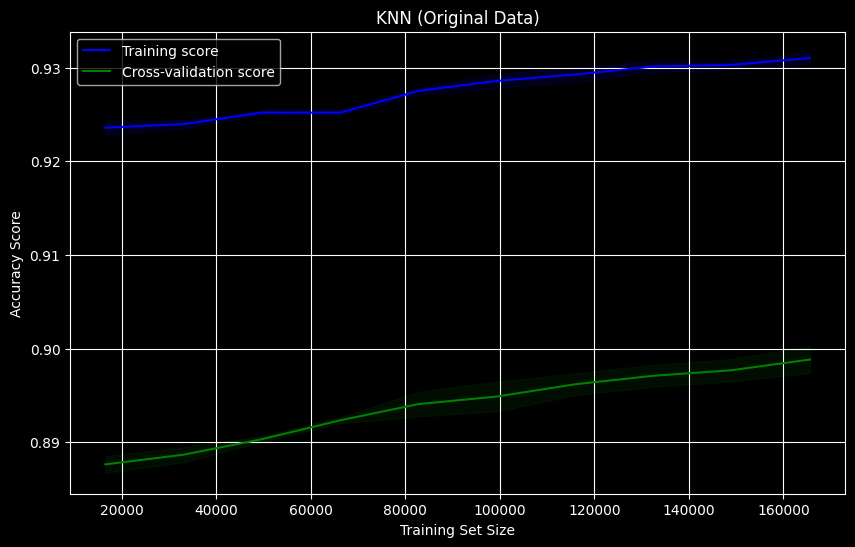

Learning Curve for SMOTE-Tomek Resampled Data


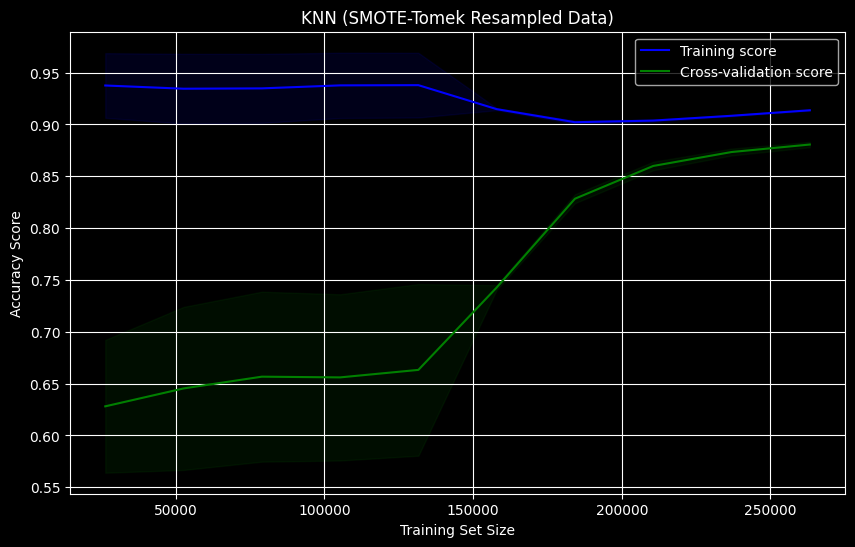

Learning Curve for Random Oversampling Resampled Data


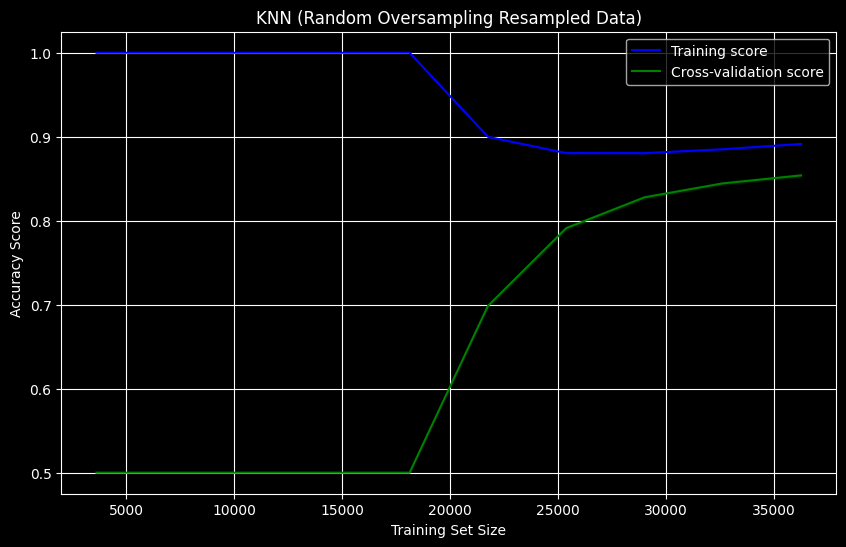

In [84]:
print("Learning Curve for Original Data")
plot_learning_curve(model_original_KNN, X_train_scaled_df, y_train_original, "KNN (Original Data)")

print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(model_smote_tomek_KNN, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "KNN (SMOTE-Tomek Resampled Data)")

print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(model_random_oversampling_KNN, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "KNN (Random Oversampling Resampled Data)")

* **Plotting Scores**

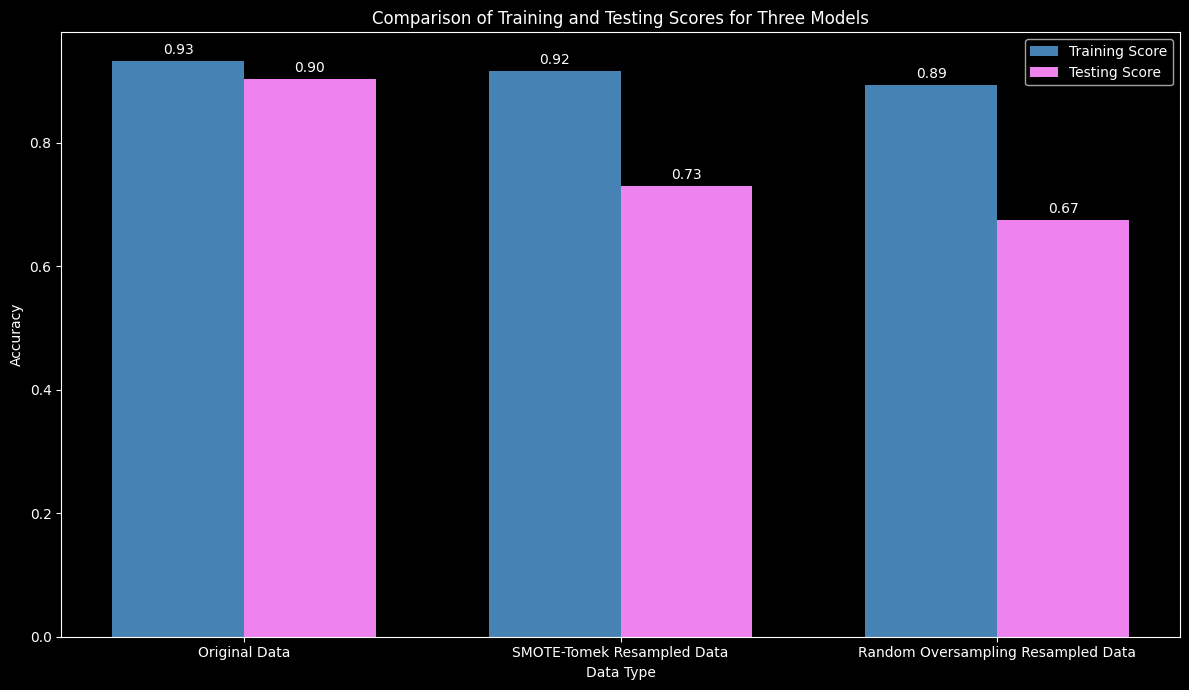

In [85]:
plot_scores_comparison(
    model_original_KNN, model_smote_tomek_KNN, model_random_oversampling_KNN,
    X_train_scaled_df, y_train_original,  # Original data
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **Roc Scores**

In [86]:
y_pred_prob_original = model_original_KNN.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = model_smote_tomek_KNN.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = model_random_oversampling_KNN.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.8814354261681226
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.7985552078274861
AUC-ROC Score for Random Oversampling Resampled Data: 0.8116513421470073


_________________________________________________________________________________________________Take Break________________________________________________________________________________________________________

* **_With HyperParameters Tuninig_**

[I 2024-09-08 13:04:34,443] A new study created in memory with name: no-name-8ae933a1-ef24-4ae5-b9fa-2ce7b1e2a8da


Evaluating on Original Data


[I 2024-09-08 13:04:35,468] Trial 0 finished with value: 0.8940618273207785 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 2}. Best is trial 0 with value: 0.8940618273207785.
[I 2024-09-08 13:04:38,244] Trial 1 finished with value: 0.8813830566543823 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 2}. Best is trial 0 with value: 0.8940618273207785.
[I 2024-09-08 13:04:41,424] Trial 2 finished with value: 0.8927657752082135 and parameters: {'n_neighbors': 28, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 2}. Best is trial 0 with value: 0.8940618273207785.
[I 2024-09-08 13:04:42,575] Trial 3 finished with value: 0.8962820209396941 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'algorithm': 'ball_tree', 'p': 2}. Best is trial 3 with value: 0.8962820209396941.
[I 2024-09-08 13:04:43,470] Trial 4 finished with value: 0.8956058198374863 and parameters: {'n_neighbors': 20, 'weights': 'distance'

Best Training score: 1.0
Best Testing score: 0.9162863035466747
Best Parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'brute', 'p': 1}
Confusion matrix:
 [[77626  1588]
 [ 5840  3677]]


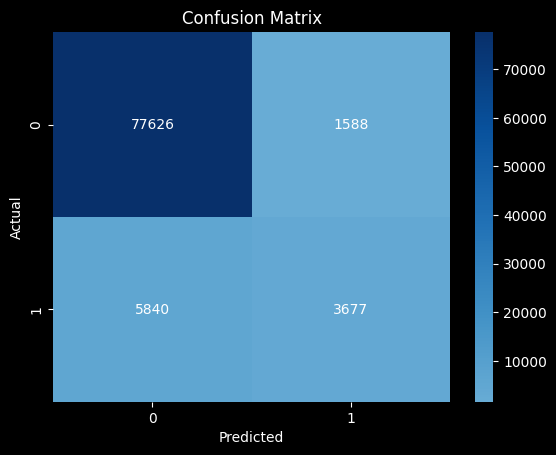

[I 2024-09-08 13:09:11,005] A new study created in memory with name: no-name-6bddc2db-5f99-46f7-86ec-96b275691c79


Evaluating on SMOTE-Tomek Resampled Data


[I 2024-09-08 13:09:13,419] Trial 0 finished with value: 0.8925854549142915 and parameters: {'n_neighbors': 18, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1}. Best is trial 0 with value: 0.8925854549142915.
[I 2024-09-08 13:09:15,423] Trial 1 finished with value: 0.8661234517812264 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'auto', 'p': 2}. Best is trial 0 with value: 0.8925854549142915.
[I 2024-09-08 13:09:16,039] Trial 2 finished with value: 0.864793589613551 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'algorithm': 'auto', 'p': 1}. Best is trial 0 with value: 0.8925854549142915.
[I 2024-09-08 13:09:18,157] Trial 3 finished with value: 0.8873223563354409 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 2}. Best is trial 0 with value: 0.8925854549142915.
[I 2024-09-08 13:09:19,063] Trial 4 finished with value: 0.8967102816377591 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'algorithm

Best Training score: 1.0
Best Testing score: 0.6947515524450305
Best Parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'auto', 'p': 2}
Confusion matrix:
 [[53453 25761]
 [ 1324  8193]]


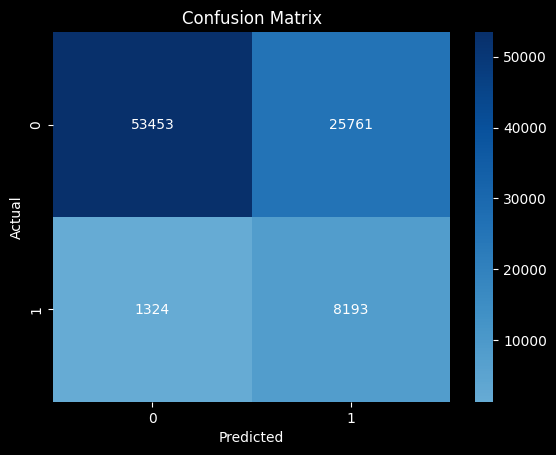

[I 2024-09-08 13:11:01,991] A new study created in memory with name: no-name-93283856-3b35-46f0-8eda-eff4a60d860d


Evaluating on Random Oversampling Resampled Data


[I 2024-09-08 13:11:29,654] Trial 0 finished with value: 0.8927432351714734 and parameters: {'n_neighbors': 27, 'weights': 'uniform', 'algorithm': 'brute', 'p': 1}. Best is trial 0 with value: 0.8927432351714734.
[I 2024-09-08 13:11:57,543] Trial 1 finished with value: 0.8905005015158175 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'brute', 'p': 1}. Best is trial 0 with value: 0.8927432351714734.
[I 2024-09-08 13:11:58,394] Trial 2 finished with value: 0.8892495294767331 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'algorithm': 'auto', 'p': 1}. Best is trial 0 with value: 0.8927432351714734.
[I 2024-09-08 13:11:59,301] Trial 3 finished with value: 0.8940618273207785 and parameters: {'n_neighbors': 16, 'weights': 'distance', 'algorithm': 'auto', 'p': 2}. Best is trial 3 with value: 0.8940618273207785.
[I 2024-09-08 13:12:00,724] Trial 4 finished with value: 0.8971948924276747 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'algorithm':

Best Training score: 1.0
Best Testing score: 0.6492206782297055
Best Parameters: {'n_neighbors': 30, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1}
Confusion matrix:
 [[48328 30886]
 [  239  9278]]


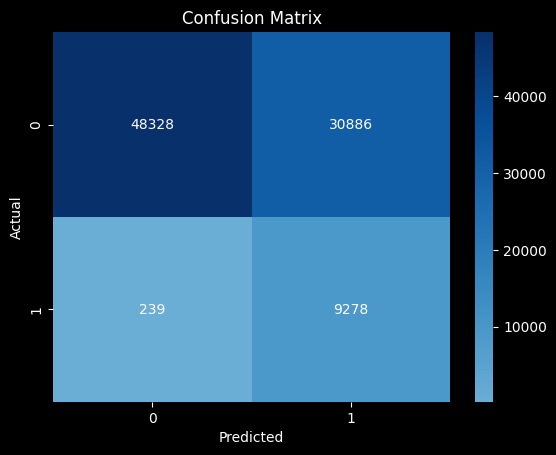

Classification Report for Original Data:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     79214
           1       0.70      0.39      0.50      9517

    accuracy                           0.92     88731
   macro avg       0.81      0.68      0.73     88731
weighted avg       0.91      0.92      0.91     88731

Classification Report for SMOTE-Tomek Resampled Data:
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     79214
           1       0.24      0.86      0.38      9517

    accuracy                           0.69     88731
   macro avg       0.61      0.77      0.59     88731
weighted avg       0.90      0.69      0.75     88731

Classification Report for Random Oversampling Resampled Data:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76     79214
           1       0.23      0.97      0.37      9517

    accuracy          

In [87]:
def objective_knn(trial):
    # Define hyperparameters to tune
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'p': trial.suggest_int('p', 1, 2)  # p=1 for Manhattan distance, p=2 for Euclidean distance
    }

 
    knn = KNeighborsClassifier(**param)
    knn.fit(X_train, y_train)

 
    score = knn.score(X_test, y_test)
    return score

def KNN_Optuna(X_train, y_train, X_test, y_test):
   
    study = optuna.create_study(direction='maximize')
  
    study.optimize(objective_knn, n_trials=15)

  
    best_params = study.best_params
    best_model = KNeighborsClassifier(**best_params)
    best_model.fit(X_train, y_train)
    
    # Evaluate the model
    test_score = best_model.score(X_test, y_test)
    print('Best Training score:', best_model.score(X_train, y_train))
    print('Best Testing score:', test_score)
    print('Best Parameters:', best_params)

    # Predictions and Confusion Matrix
    y_pred = best_model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", CM)

    # Plot Confusion Matrix
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return y_pred, y_test, best_params, best_model

print("Evaluating on Original Data")
y_pred_original_knn, y_test_original_knn, best_params_original_knn, best_model_original_knn = KNN_Optuna(
    X_train_scaled_df, y_train_original, X_test_scaled_df, y_test
)


print("Evaluating on SMOTE-Tomek Resampled Data")
y_pred_smote_tomek_knn, y_test_smote_tomek_knn, best_params_smote_tomek_knn, best_model_smote_tomek_knn = KNN_Optuna(
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, X_test_scaled_df, y_test
)


print("Evaluating on Random Oversampling Resampled Data")
y_pred_random_oversampling_knn, y_test_random_oversampling_knn, best_params_random_oversampling_knn, best_model_random_oversampling_knn = KNN_Optuna(
    X_train_resampled_rus_scaled_df, y_train_resampled_rus, X_test_scaled_df, y_test
)


print('Classification Report for Original Data:\n', classification_report(y_test_original_knn, y_pred_original_knn))
print('Classification Report for SMOTE-Tomek Resampled Data:\n', classification_report(y_test_smote_tomek_knn, y_pred_smote_tomek_knn))
print('Classification Report for Random Oversampling Resampled Data:\n', classification_report(y_test_random_oversampling_knn, y_pred_random_oversampling_knn))

* **Learning Curves**

Learning Curve for Original Data


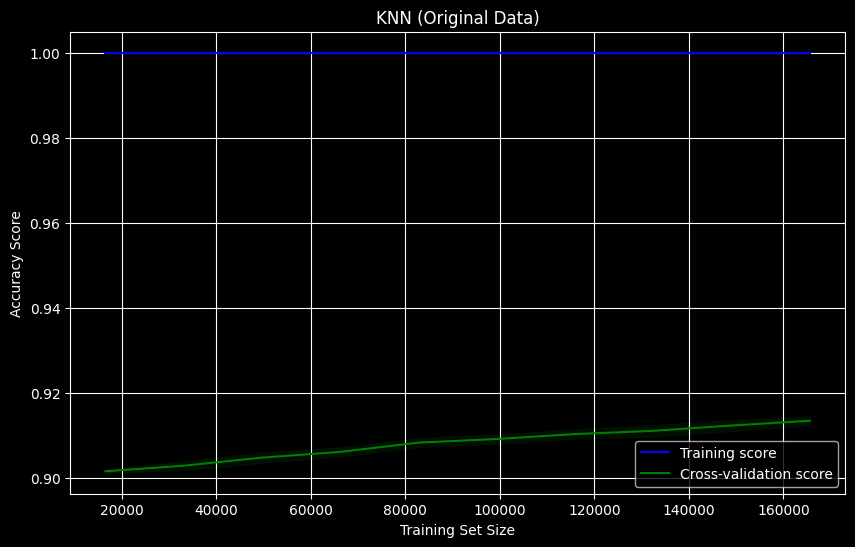

Learning Curve for SMOTE-Tomek Resampled Data


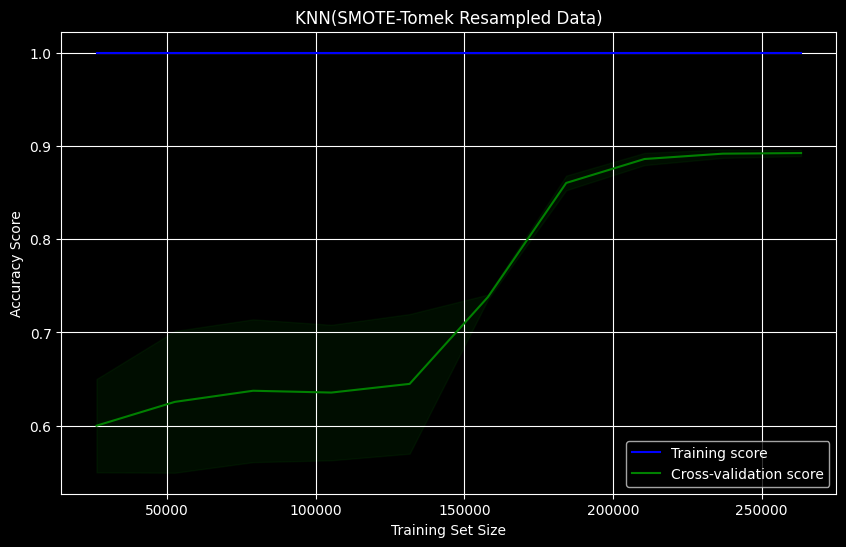

Learning Curve for Random Oversampling Resampled Data


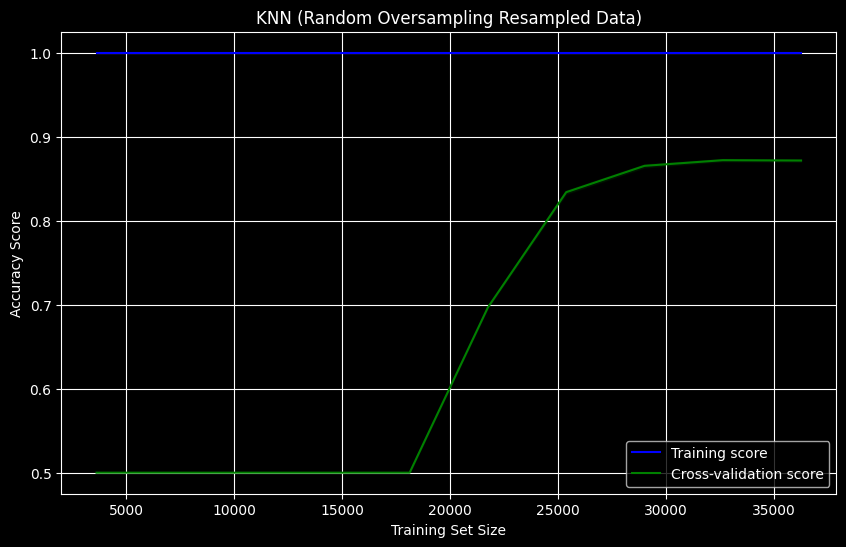

In [88]:

print("Learning Curve for Original Data")
plot_learning_curve(best_model_original_knn, X_train_scaled_df, y_train_original, "KNN (Original Data)")
print("Learning Curve for SMOTE-Tomek Resampled Data")
plot_learning_curve(best_model_smote_tomek_knn, X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek, "KNN(SMOTE-Tomek Resampled Data)")
# 
print("Learning Curve for Random Oversampling Resampled Data")
plot_learning_curve(best_model_random_oversampling_knn, X_train_resampled_rus_scaled_df, y_train_resampled_rus, "KNN (Random Oversampling Resampled Data)")

* **Plotting Scores**

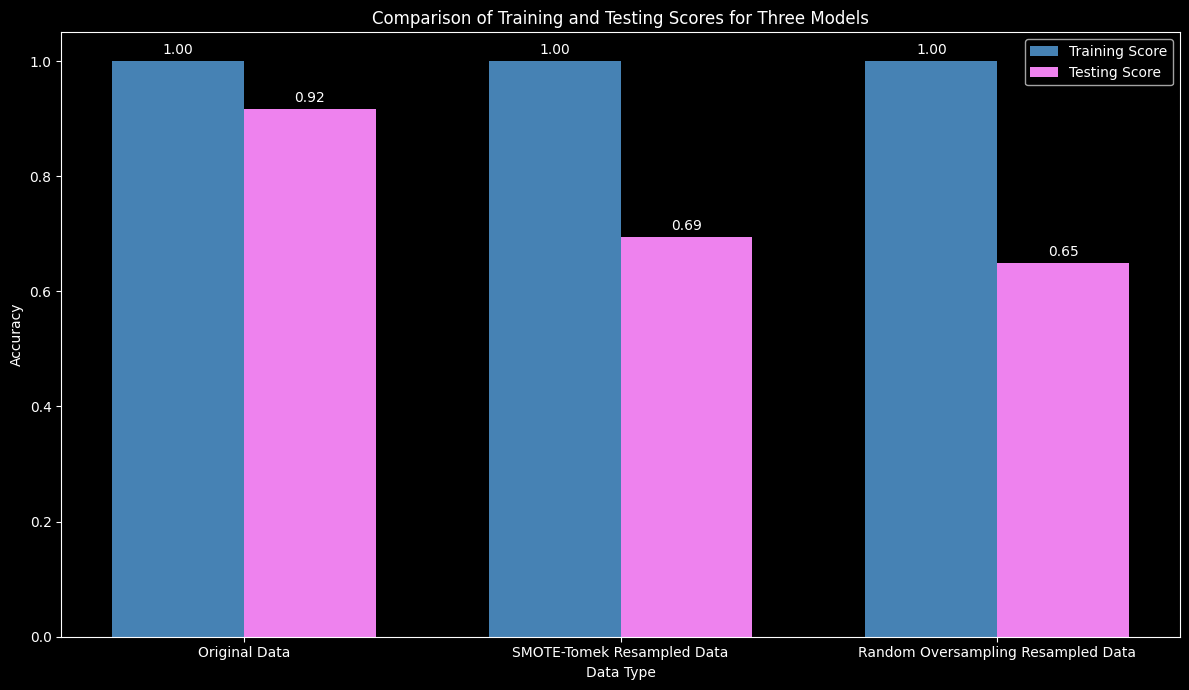

In [89]:
plot_scores_comparison(
    best_model_original_knn, best_model_smote_tomek_knn, best_model_random_oversampling_knn,
    X_train_scaled_df, y_train_original,  # Original data
    
    X_train_resampled_smote_tomek_scaled_df, y_train_resampled_smote_tomek,  # SMOTE-Tomek resampled data
    X_train_resampled_rus_scaled_df, y_train_resampled_rus,  # Random oversampling resampled data
    X_test_scaled_df, y_test  # Common test data
)


* **ROC Scores**

In [90]:
y_pred_prob_original = best_model_original_knn.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_original = roc_auc_score(y_test_original, y_pred_prob_original)
print("AUC-ROC Score for Original Data:", roc_auc_original)

y_pred_prob_smote_tomek = best_model_smote_tomek_knn.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_smote_tomek = roc_auc_score(y_test_smote_tomek, y_pred_prob_smote_tomek)
print("AUC-ROC Score for SMOTE-Tomek Resampled Data:", roc_auc_smote_tomek)


y_pred_prob_random_oversampling = best_model_random_oversampling_knn.predict_proba(X_test_scaled_df)[:, 1]
roc_auc_random_oversampling = roc_auc_score(y_test_random_oversampling, y_pred_prob_random_oversampling)
print("AUC-ROC Score for Random Oversampling Resampled Data:", roc_auc_random_oversampling)

AUC-ROC Score for Original Data: 0.9406531808994156
AUC-ROC Score for SMOTE-Tomek Resampled Data: 0.825383254349151
AUC-ROC Score for Random Oversampling Resampled Data: 0.8207644838923213


# Final Evalutation

**_A) Orginial Data but with Class Weight adjustment_**

* **_Trending Scores_**

In [8]:
Models=['Descion Tree','Logistic Regression','Default XGB','Tuned XGB','Default RF','Tuned RF','Default KNN','Tuned KNN']

In [9]:
Training_List=[0.9320652830170453,0.7779092625955747,0.8216840468128885,0.969135951544893,0.9999903398909373,0.929935228968735,0.9323164458526737,1.0]


In [10]:
Testing_List=[0.8799179542662654,0.7782961986228037,0.814923758325726,0.9038892833395319,0.9280860127802009,0.9133110186969605,0.9028411716311098,0.9162863035466747]

In [11]:
Auc_List=[0.8435959945637901,0.89108003471503753,0.9345877889329596,0.936218891483046,0.9555620170497295,0.9393154547569834,0.8814354261681226,0.9406531808994156]

In [12]:
f1_score=[[0.93,0.57],[0.86 ,0.48],[0.88,0.53],[0.95,0.42],[0.96,0.62],[0.95,0.47],[0.95,0.49],[0.95,0.50]]

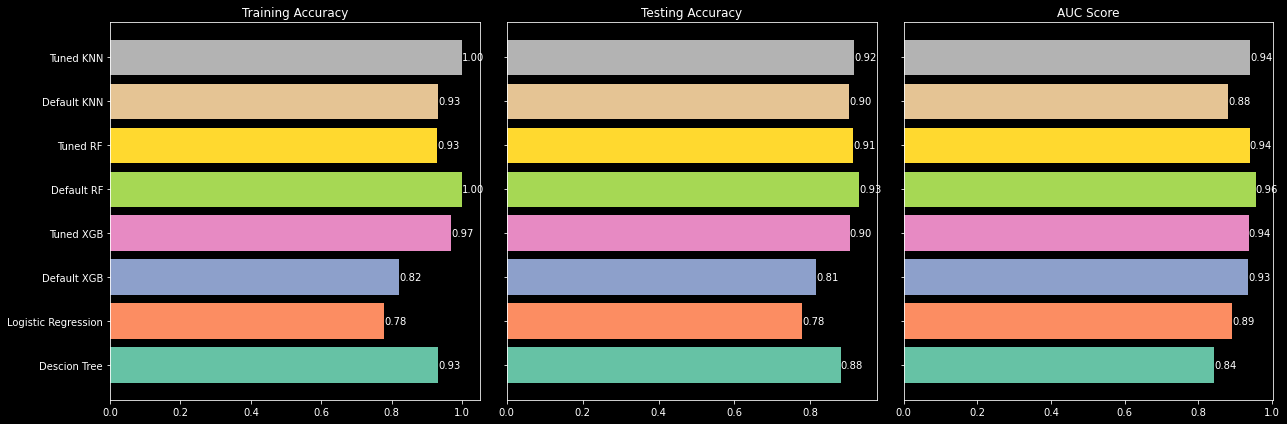

In [13]:
def plot_model_performance(Models, Training_List, Testing_List, Auc_List):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    colors = sns.color_palette('Set2', len(Models))

 
    axes[0].barh(Models, Training_List, color=colors)
    axes[0].set_title('Training Accuracy')
    for index, value in enumerate(Training_List):
        axes[0].text(value, index, f'{value:.2f}', va='center')

    axes[1].barh(Models, Testing_List, color=colors)
    axes[1].set_title('Testing Accuracy')
    for index, value in enumerate(Testing_List):
        axes[1].text(value, index, f'{value:.2f}', va='center')

    axes[2].barh(Models, Auc_List, color=colors)
    axes[2].set_title('AUC Score')
    for index, value in enumerate(Auc_List):
        axes[2].text(value, index, f'{value:.2f}', va='center')

    plt.tight_layout()
    plt.show()
plot_model_performance(Models, Training_List, Testing_List, Auc_List)   
    

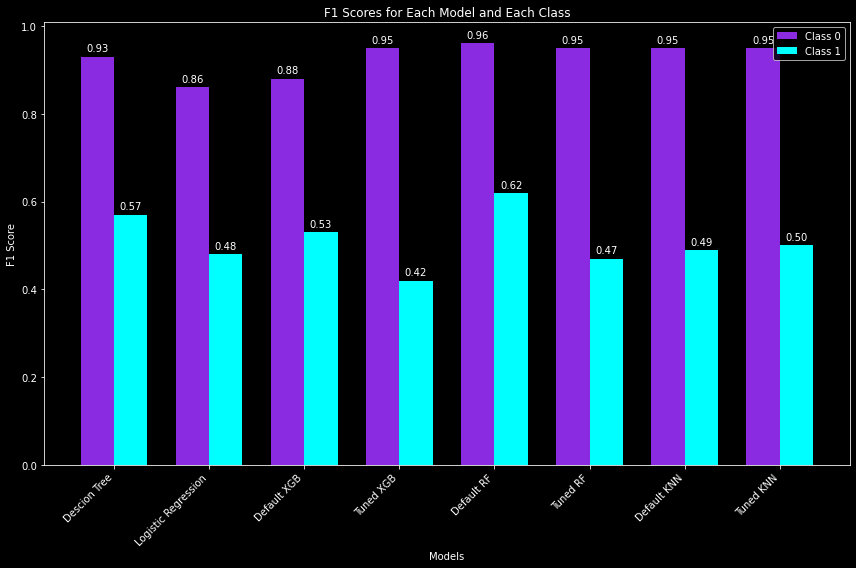

In [14]:
f1_scores = np.array(f1_score)

x = np.arange(len(Models))
width = 0.35  


fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, f1_scores[:, 0], width, label='Class 0',color='#8a2be2')
bars2 = ax.bar(x + width/2, f1_scores[:, 1], width, label='Class 1',color='#00ffff')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Each Model and Each Class')
ax.set_xticks(x)
ax.set_xticklabels(Models, rotation=45, ha='right')
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)


plt.tight_layout()
plt.show()

 Based on the learning curve analysis and superior performance metrics (AUC score, F1 score, and accuracy), Random Forest, particularly after hyperparameter tuning, proves to be the most suitable model for this problem. Its ability to generalize well and deliver strong performance across multiple metrics supports its selection as the preferred model.

**_B) Smotke Method_** 

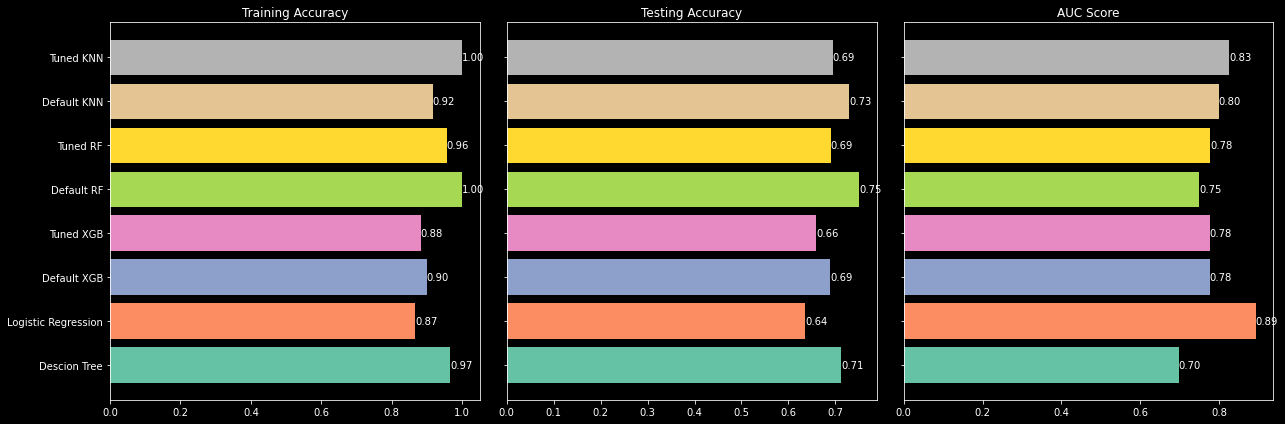

In [15]:
Training_List=[0.9656679492556729,0.8662885764477756, 0.8990401857626542,0.882013968670788, 0.9999969606895588,0.9561640255058932, 0.9159174766428992,1.0]
Testing_List=[0.7128173918923488,0.6358995165162119, 0.6893870237008486,0.6597919554608874, 0.7502563929179205,0.6898378244356538,  0.7301844902007191,0.6947515524450305]
Auc_List=[0.6975325310484112,0.8922266050114489, 0.7760163512998344,0.7760163512998344, 0.7490911665928295,0.776864927740627, 0.7985552078274861,0.825383254349151]
f1_score=[[0.82,0.27],[0.74 , 0.37], [0.80,0.34],[0.77,0.37], [0.85 ,0.26],[0.80,0.34], [0.83,0.36],[0.80,0.38]]
plot_model_performance(Models, Training_List, Testing_List, Auc_List) 


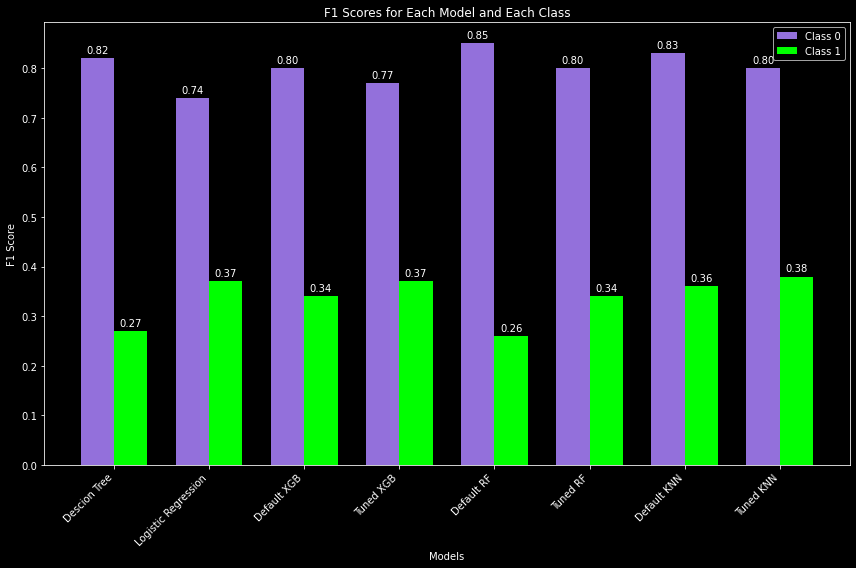

In [16]:
f1_scores = np.array(f1_score)

x = np.arange(len(Models))
width = 0.35  


fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, f1_scores[:, 0], width, label='Class 0',color='#9370db')
bars2 = ax.bar(x + width/2, f1_scores[:, 1], width, label='Class 1',color='#00ff00')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Each Model and Each Class')
ax.set_xticks(x)
ax.set_xticklabels(Models, rotation=45, ha='right')
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)


plt.tight_layout()
plt.show()

Note: According to these scores and learning curves, none of the models here show improvement over adjusting class weights.

**_C) Random Sampling_**

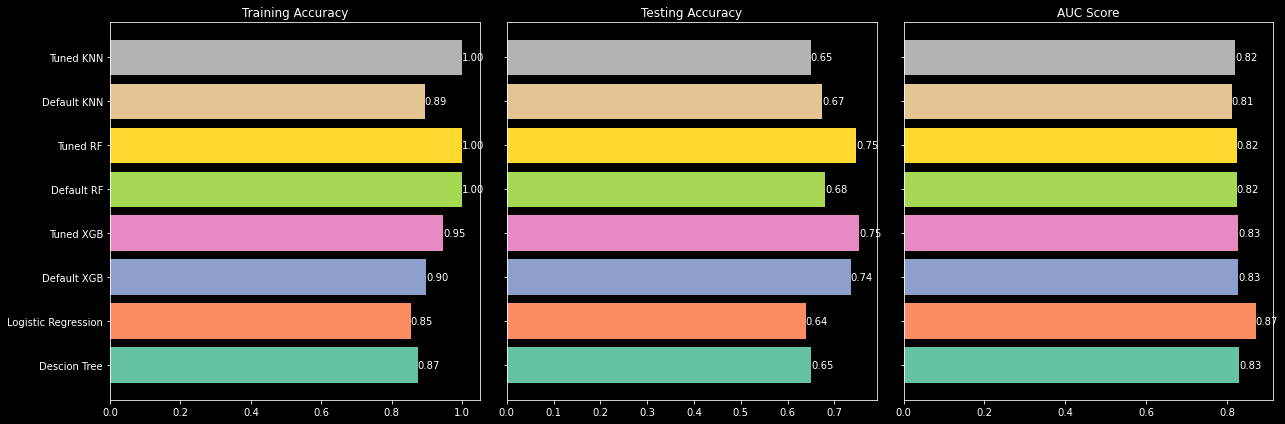

In [17]:
Training_List=[0.8737429428369795,0.8537402964008468, 0.8979137261820748,0.9470492237120678, 0.999977946365561,0.9997794636556104,0.893326570218772,1.0]
Testing_List=[0.6507759407647834,0.6391114717516989, 0.7352785385040178,0.7525667466837971, 0.6805400592802966,0.7465936369476283, 0.6743077391216148,0.6492206782297055]
Auc_List=[0.8293889428540315,0.8708512405796003, 0.8270301107403035, 0.8270301107403035, 0.8242481971638025,0.8241824413090196,0.8116513421470073,0.8207644838923213]
f1_score=[[0.76,0.37],[0.75,0.37], [0.83,0.37],[0.85,0.36], [0.78,0.38],[0.84,0.37],[0.78,0.37],[0.76,0.37]]
plot_model_performance(Models, Training_List, Testing_List, Auc_List) 


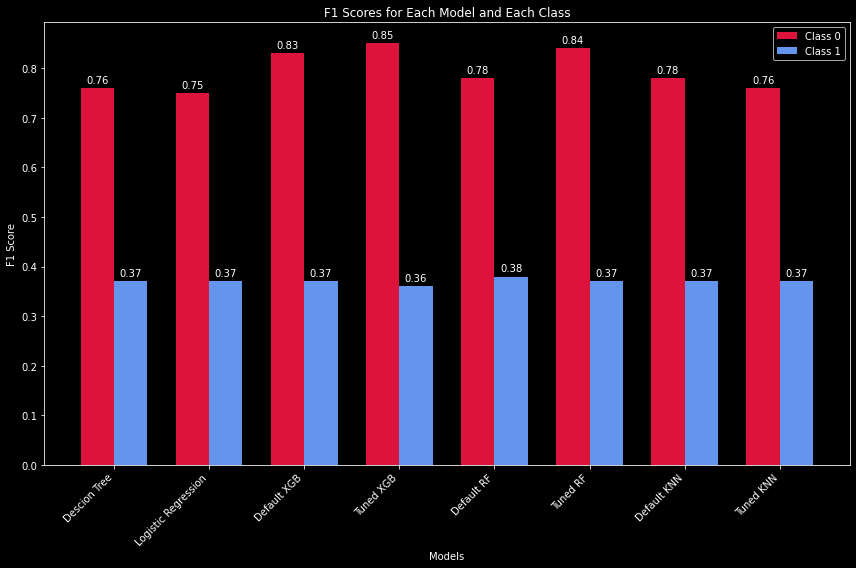

In [18]:
f1_scores = np.array(f1_score)

x = np.arange(len(Models))
width = 0.35  


fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(x - width/2, f1_scores[:, 0], width, label='Class 0',color='#dc143c')
bars2 = ax.bar(x + width/2, f1_scores[:, 1], width, label='Class 1',color='#6495ed')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Each Model and Each Class')
ax.set_xticks(x)
ax.set_xticklabels(Models, rotation=45, ha='right')
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)


plt.tight_layout()
plt.show()

Note: According to these scores and learning curves, none of the models here show improvement over adjusting class weights.

Finally, the Tuned Random Forest model showed impressive results: a learning score of 93, a testing score of 91, an AUC of 94, an F1 score of 95 for class 0, and 47 for class 1, along with a suitable learning curve. 🌟📈